In [1]:
card_type = "Spades"
model = "lstm"

In [2]:
# Parameters
card_type = "Hearts"
model = "lstm"


In [3]:
import pandas as pd
import numpy as np
from chance_utils import compute_statistics
from matplotlib import pyplot as plt

In [4]:
possible_result = ["7","8","9","10","J","Q","K","A"]
n_outputs = 8
n_features = 8
sample_length = 240*5

In [5]:
dummies = pd.get_dummies(possible_result).T
dummies = dummies.reindex(index=possible_result,fill_value=0)
dummies = dummies.reset_index()
dummies

,index,0,1,2,3,4,5,6,7
0,7,1,0,0,0,0,0,0,0
1,8,0,1,0,0,0,0,0,0
2,9,0,0,1,0,0,0,0,0
3,10,0,0,0,1,0,0,0,0
4,J,0,0,0,0,1,0,0,0
5,Q,0,0,0,0,0,1,0,0
6,K,0,0,0,0,0,0,1,0
7,A,0,0,0,0,0,0,0,1


In [6]:
test_chance = pd.read_csv("test_chance.csv",index_col=[0])
test_chance.Date = pd.to_datetime(test_chance.Date)

train_chance = pd.read_csv('train_chance.csv',index_col=[0])
train_chance.Date = pd.to_datetime(train_chance.Date)

In [7]:
spades_test_chance = test_chance[['Date',card_type]]
spades_test_chance = pd.merge(dummies,spades_test_chance,left_on='index',right_on=card_type,how="right").drop(columns="index")

spades_train_chance = train_chance[['Date',card_type]]
spades_train_chance = pd.merge(dummies,spades_train_chance,left_on='index',right_on=card_type,how="right").drop(columns="index")
spades_train_chance.head()

,0,1,2,3,4,5,6,7,Date,Hearts
0,0,1,0,0,0,0,0,0,2001-01-01 00:00:00.006820,8
1,1,0,0,0,0,0,0,0,2001-01-01 00:00:00.006821,7
2,0,0,0,0,1,0,0,0,2001-01-01 00:00:00.006822,J
3,0,0,0,0,0,1,0,0,2001-01-01 00:00:00.006823,Q
4,0,0,1,0,0,0,0,0,2001-02-01 00:00:00.006824,9


In [8]:
# make the samples ready to tsfresh
spades_test_chance = spades_test_chance.sort_values(by="Date").reset_index(drop=True)
spades_test_chance['id'] = 1

spades_train_chance = spades_train_chance.sort_values(by="Date").reset_index(drop=True)
spades_train_chance['id'] = 1

spades_train_chance.tail()

,0,1,2,3,4,5,6,7,Date,Hearts,id
29119,0,0,0,0,0,1,0,0,2017-12-07 00:00:00.035924,Q,1
29120,0,0,0,1,0,0,0,0,2017-12-07 00:00:00.035925,10,1
29121,0,0,0,0,0,0,0,1,2017-12-07 00:00:00.035926,A,1
29122,0,0,0,0,0,0,0,1,2017-12-07 00:00:00.035927,A,1
29123,0,0,0,0,0,1,0,0,2017-12-07 00:00:00.035928,Q,1


In [9]:
from tsfresh.utilities.dataframe_functions import roll_time_series

df_test_rolled = roll_time_series(spades_test_chance, column_id="id",column_sort="Date",max_timeshift=sample_length-1,min_timeshift=sample_length-1)
df_train_rolled = roll_time_series(spades_train_chance, column_id="id",column_sort="Date",max_timeshift=sample_length-1,min_timeshift=sample_length-1)
df_train_rolled.tail()

/Users/serlich/Documents/Notebooks/env/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:520: UserWarning: Your time stamps are not uniformly sampled, which makes rolling nonsensical in some domains.
  warnings.warn(


Rolling:   0%|          | 0/40 [00:00<?, ?it/s]

Rolling:   2%|▎         | 1/40 [00:02<01:53,  2.91s/it]

Rolling:   8%|▊         | 3/40 [00:03<00:29,  1.26it/s]

Rolling:  15%|█▌        | 6/40 [00:04<00:18,  1.83it/s]

Rolling:  18%|█▊        | 7/40 [00:04<00:16,  1.99it/s]

Rolling:  20%|██        | 8/40 [00:04<00:14,  2.22it/s]

Rolling:  22%|██▎       | 9/40 [00:05<00:12,  2.42it/s]

Rolling:  25%|██▌       | 10/40 [00:05<00:11,  2.56it/s]

Rolling:  28%|██▊       | 11/40 [00:05<00:11,  2.62it/s]

Rolling:  30%|███       | 12/40 [00:06<00:10,  2.62it/s]

Rolling:  32%|███▎      | 13/40 [00:06<00:08,  3.08it/s]

Rolling:  35%|███▌      | 14/40 [00:06<00:09,  2.88it/s]

Rolling:  38%|███▊      | 15/40 [00:06<00:07,  3.31it/s]

Rolling:  40%|████      | 16/40 [00:07<00:06,  3.76it/s]

Rolling:  42%|████▎     | 17/40 [00:07<00:07,  3.08it/s]

Rolling:  45%|████▌     | 18/40 [00:07<00:06,  3.51it/s]

Rolling:  48%|████▊     | 19/40 [00:08<00:05,  3.90it/s]

Rolling:  50%|█████     | 20/40 [00:08<00:06,  2.98it/s]

Rolling:  52%|█████▎    | 21/40 [00:08<00:05,  3.45it/s]

Rolling:  55%|█████▌    | 22/40 [00:08<00:04,  3.88it/s]

Rolling:  57%|█████▊    | 23/40 [00:09<00:06,  2.80it/s]

Rolling:  60%|██████    | 24/40 [00:09<00:04,  3.32it/s]

Rolling:  62%|██████▎   | 25/40 [00:09<00:03,  3.77it/s]

Rolling:  65%|██████▌   | 26/40 [00:10<00:03,  3.95it/s]

Rolling:  68%|██████▊   | 27/40 [00:10<00:03,  4.27it/s]

Rolling:  70%|███████   | 28/40 [00:10<00:04,  2.64it/s]

Rolling:  72%|███████▎  | 29/40 [00:11<00:03,  3.13it/s]

Rolling:  75%|███████▌  | 30/40 [00:11<00:02,  3.64it/s]

Rolling:  78%|███████▊  | 31/40 [00:11<00:02,  4.12it/s]

Rolling:  80%|████████  | 32/40 [00:11<00:01,  4.46it/s]

Rolling:  82%|████████▎ | 33/40 [00:11<00:01,  4.74it/s]

Rolling:  85%|████████▌ | 34/40 [00:12<00:02,  2.66it/s]

Rolling:  88%|████████▊ | 35/40 [00:12<00:01,  3.24it/s]

Rolling:  90%|█████████ | 36/40 [00:12<00:01,  3.80it/s]

Rolling:  92%|█████████▎| 37/40 [00:13<00:00,  4.35it/s]

Rolling:  95%|█████████▌| 38/40 [00:13<00:00,  4.83it/s]

Rolling:  98%|█████████▊| 39/40 [00:13<00:00,  5.24it/s]

Rolling: 100%|██████████| 40/40 [00:13<00:00,  5.83it/s]

Rolling: 100%|██████████| 40/40 [00:13<00:00,  2.96it/s]

/Users/serlich/Documents/Notebooks/env/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:520: UserWarning: Your time stamps are not uniformly sampled, which makes rolling nonsensical in some domains.
  warnings.warn(


Rolling:   0%|          | 0/40 [00:00<?, ?it/s]

Rolling:   2%|▎         | 1/40 [00:04<03:14,  4.98s/it]

Rolling:   5%|▌         | 2/40 [00:06<01:42,  2.70s/it]

Rolling:   8%|▊         | 3/40 [00:07<01:25,  2.32s/it]

Rolling:  10%|█         | 4/40 [00:08<00:59,  1.65s/it]

Rolling:  12%|█▎        | 5/40 [00:10<00:58,  1.67s/it]

Rolling:  15%|█▌        | 6/40 [00:10<00:44,  1.30s/it]

Rolling:  18%|█▊        | 7/40 [00:11<00:35,  1.08s/it]

Rolling:  20%|██        | 8/40 [00:13<00:40,  1.25s/it]

Rolling:  22%|██▎       | 9/40 [00:13<00:32,  1.05s/it]

Rolling:  25%|██▌       | 10/40 [00:14<00:27,  1.10it/s]

Rolling:  28%|██▊       | 11/40 [00:14<00:23,  1.21it/s]

Rolling:  30%|███       | 12/40 [00:15<00:21,  1.31it/s]

Rolling:  32%|███▎      | 13/40 [00:17<00:31,  1.16s/it]

Rolling:  35%|███▌      | 14/40 [00:18<00:25,  1.01it/s]

Rolling:  38%|███▊      | 15/40 [00:18<00:21,  1.14it/s]

Rolling:  40%|████      | 16/40 [00:19<00:19,  1.26it/s]

Rolling:  42%|████▎     | 17/40 [00:20<00:17,  1.32it/s]

Rolling:  45%|████▌     | 18/40 [00:22<00:27,  1.27s/it]

Rolling:  48%|████▊     | 19/40 [00:23<00:22,  1.06s/it]

Rolling:  50%|█████     | 20/40 [00:23<00:18,  1.10it/s]

Rolling:  52%|█████▎    | 21/40 [00:24<00:15,  1.24it/s]

Rolling:  55%|█████▌    | 22/40 [00:24<00:13,  1.35it/s]

Rolling:  57%|█████▊    | 23/40 [00:25<00:11,  1.43it/s]

Rolling:  60%|██████    | 24/40 [00:26<00:10,  1.48it/s]

Rolling:  62%|██████▎   | 25/40 [00:29<00:20,  1.39s/it]

Rolling:  65%|██████▌   | 26/40 [00:29<00:16,  1.16s/it]

Rolling:  68%|██████▊   | 27/40 [00:30<00:13,  1.01s/it]

Rolling:  70%|███████   | 28/40 [00:31<00:10,  1.10it/s]

Rolling:  72%|███████▎  | 29/40 [00:31<00:09,  1.17it/s]

Rolling:  75%|███████▌  | 30/40 [00:32<00:07,  1.27it/s]

Rolling:  78%|███████▊  | 31/40 [00:33<00:06,  1.30it/s]

Rolling:  80%|████████  | 32/40 [00:33<00:06,  1.30it/s]

Rolling:  82%|████████▎ | 33/40 [00:37<00:11,  1.57s/it]

Rolling:  85%|████████▌ | 34/40 [00:38<00:07,  1.29s/it]

Rolling:  88%|████████▊ | 35/40 [00:38<00:05,  1.09s/it]

Rolling:  90%|█████████ | 36/40 [00:39<00:03,  1.06it/s]

Rolling:  92%|█████████▎| 37/40 [00:39<00:02,  1.20it/s]

Rolling:  95%|█████████▌| 38/40 [00:40<00:01,  1.32it/s]

Rolling:  98%|█████████▊| 39/40 [00:40<00:00,  1.42it/s]

Rolling: 100%|██████████| 40/40 [00:41<00:00,  1.57it/s]

Rolling: 100%|██████████| 40/40 [00:41<00:00,  1.04s/it]

,0,1,2,3,4,5,6,7,Date,Hearts,id
33509995,0,0,0,0,0,1,0,0,2017-12-07 00:00:00.035924,Q,"(1, 2017-12-07 00:00:00.035928)"
33509996,0,0,0,1,0,0,0,0,2017-12-07 00:00:00.035925,10,"(1, 2017-12-07 00:00:00.035928)"
33509997,0,0,0,0,0,0,0,1,2017-12-07 00:00:00.035926,A,"(1, 2017-12-07 00:00:00.035928)"
33509998,0,0,0,0,0,0,0,1,2017-12-07 00:00:00.035927,A,"(1, 2017-12-07 00:00:00.035928)"
33509999,0,0,0,0,0,1,0,0,2017-12-07 00:00:00.035928,Q,"(1, 2017-12-07 00:00:00.035928)"


In [10]:
test_labeling_df = test_chance[['lottoryNumber',card_type]]
train_labeling_df = train_chance[['lottoryNumber',card_type]]

labeling_df = pd.concat([test_labeling_df,train_labeling_df])
labeling_df.head()

,lottoryNumber,Hearts
29124,35944,Q
29125,35945,Q
29126,35946,9
29127,35947,Q
29128,35948,Q


In [11]:
def make_a_sample(current_sample,labeling_df):
    
    current_id = current_sample['id'].values[0]
    final_label = None
    
    assert current_sample.shape[0] == sample_length, f"{current_id} is not shape of {sample_length}"

    lottey_num_predicting = (current_id[1].microsecond + 1)
    label = labeling_df[labeling_df.lottoryNumber == lottey_num_predicting][card_type]
    
    if len(label) == 1:
        final_label = label.values[0]

    sample = current_sample.drop(columns=['id','Date',card_type]).values

    return lottey_num_predicting,final_label,sample

In [12]:
train = df_train_rolled.groupby("id").apply(lambda x:make_a_sample(x,labeling_df))

train = sorted(train.values,key=lambda x:x[0])
_,train_y,train_x = map(list, zip(*train))

In [13]:
test = df_test_rolled.groupby("id").apply(lambda x:make_a_sample(x,labeling_df))

test = sorted(test.values,key=lambda x:x[0])
_,test_y,test_x = map(list, zip(*test))

In [14]:
test_x = np.stack(test_x)
test_y = pd.merge(dummies,pd.Series(test_y,name='label'),left_on='index',right_on="label",how="right").drop(columns=["index","label"]).values

train_x = np.stack(train_x)
train_y = pd.merge(dummies,pd.Series(train_y,name='label'),left_on='index',right_on="label",how="right").drop(columns=["index","label"]).values

In [15]:
assert test_x.shape[0] == test_y.shape[0] and train_x.shape[0] == train_y.shape[0]

In [16]:
last_sample = test_x[-1]
test_x = test_x[:-1]
test_y = test_y[:-1]

In [17]:
print(f"Test shape {test_x.shape}")
print(f"Train shape {train_x.shape}")

Test shape (8509, 1200, 8)
Train shape (27925, 1200, 8)


In [18]:
import tensorflow as tf

if model == "lstm":
    #
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(100, input_shape=(sample_length,n_features)))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
elif model == "nn":
    #
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(sample_length,8)))
    model.add(tf.keras.layers.Dense(350, activation='relu'))
    model.add(tf.keras.layers.Dense(250, activation='relu'))
    model.add(tf.keras.layers.Dense(150, activation='relu'))
    model.add(tf.keras.layers.Dense(8, activation='softmax'))
    model.compile(optimizer="adam",loss='categorical_crossentropy', metrics=['accuracy'])
    
model.summary()

Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 lstm (LSTM)                 (None, 100)               43600     


 dropout (Dropout)           (None, 100)               0         


 dense (Dense)               (None, 100)               10100     


 dense_1 (Dense)             (None, 8)                 808       


Total params: 54,508


2022-08-12 21:02:15.644036: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Trainable params: 54,508


Non-trainable params: 0


_________________________________________________________________


In [19]:
assert not np.isnan(train_x).any()
assert not np.isnan(train_y).any()
assert not np.isnan(test_x).any()
assert not np.isnan(test_y).any()

In [20]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=3)
# 
history = model.fit(train_x,train_y,validation_data=(test_x,test_y),batch_size=64,epochs=300,callbacks=[es])

Epoch 1/300


  1/437 [..............................] - ETA: 14:05 - loss: 2.0825 - accuracy: 0.1094

  2/437 [..............................] - ETA: 3:39 - loss: 2.0773 - accuracy: 0.1562 

  3/437 [..............................] - ETA: 3:34 - loss: 2.0777 - accuracy: 0.1406

  4/437 [..............................] - ETA: 3:35 - loss: 2.0788 - accuracy: 0.1328

  5/437 [..............................] - ETA: 3:33 - loss: 2.0783 - accuracy: 0.1250

  6/437 [..............................] - ETA: 3:31 - loss: 2.0791 - accuracy: 0.1302

  7/437 [..............................] - ETA: 3:30 - loss: 2.0811 - accuracy: 0.1250

  8/437 [..............................] - ETA: 3:29 - loss: 2.0818 - accuracy: 0.1270

  9/437 [..............................] - ETA: 3:29 - loss: 2.0802 - accuracy: 0.1285

 10/437 [..............................] - ETA: 3:29 - loss: 2.0803 - accuracy: 0.1266

 11/437 [..............................] - ETA: 3:28 - loss: 2.0794 - accuracy: 0.1264

 12/437 [..............................] - ETA: 3:27 - loss: 2.0790 - accuracy: 0.1276

 13/437 [..............................] - ETA: 3:27 - loss: 2.0787 - accuracy: 0.1286

 14/437 [..............................] - ETA: 3:26 - loss: 2.0785 - accuracy: 0.1306

 15/437 [>.............................] - ETA: 3:26 - loss: 2.0782 - accuracy: 0.1312

 16/437 [>.............................] - ETA: 3:25 - loss: 2.0786 - accuracy: 0.1289

 17/437 [>.............................] - ETA: 3:24 - loss: 2.0787 - accuracy: 0.1296

 18/437 [>.............................] - ETA: 3:24 - loss: 2.0794 - accuracy: 0.1302

 19/437 [>.............................] - ETA: 3:23 - loss: 2.0792 - accuracy: 0.1299

 20/437 [>.............................] - ETA: 3:26 - loss: 2.0796 - accuracy: 0.1305

 21/437 [>.............................] - ETA: 3:27 - loss: 2.0799 - accuracy: 0.1295

 22/437 [>.............................] - ETA: 3:27 - loss: 2.0805 - accuracy: 0.1300

 23/437 [>.............................] - ETA: 3:26 - loss: 2.0805 - accuracy: 0.1311

 24/437 [>.............................] - ETA: 3:27 - loss: 2.0807 - accuracy: 0.1289

 25/437 [>.............................] - ETA: 3:27 - loss: 2.0808 - accuracy: 0.1300

 26/437 [>.............................] - ETA: 3:26 - loss: 2.0807 - accuracy: 0.1316

 27/437 [>.............................] - ETA: 3:26 - loss: 2.0807 - accuracy: 0.1308

 28/437 [>.............................] - ETA: 3:25 - loss: 2.0804 - accuracy: 0.1339

 29/437 [>.............................] - ETA: 3:24 - loss: 2.0802 - accuracy: 0.1342

 30/437 [=>............................] - ETA: 3:24 - loss: 2.0807 - accuracy: 0.1333

 31/437 [=>............................] - ETA: 3:23 - loss: 2.0804 - accuracy: 0.1326

 32/437 [=>............................] - ETA: 3:22 - loss: 2.0807 - accuracy: 0.1313

 33/437 [=>............................] - ETA: 3:22 - loss: 2.0804 - accuracy: 0.1345

 34/437 [=>............................] - ETA: 3:21 - loss: 2.0799 - accuracy: 0.1365

 35/437 [=>............................] - ETA: 3:20 - loss: 2.0800 - accuracy: 0.1362

 36/437 [=>............................] - ETA: 3:20 - loss: 2.0802 - accuracy: 0.1363

 37/437 [=>............................] - ETA: 3:19 - loss: 2.0803 - accuracy: 0.1360

 38/437 [=>............................] - ETA: 3:18 - loss: 2.0805 - accuracy: 0.1357

 39/437 [=>............................] - ETA: 3:18 - loss: 2.0809 - accuracy: 0.1350

 40/437 [=>............................] - ETA: 3:18 - loss: 2.0810 - accuracy: 0.1344

 41/437 [=>............................] - ETA: 3:17 - loss: 2.0809 - accuracy: 0.1349

 42/437 [=>............................] - ETA: 3:17 - loss: 2.0809 - accuracy: 0.1362

 43/437 [=>............................] - ETA: 3:16 - loss: 2.0808 - accuracy: 0.1366

 44/437 [==>...........................] - ETA: 3:16 - loss: 2.0806 - accuracy: 0.1357

 45/437 [==>...........................] - ETA: 3:15 - loss: 2.0807 - accuracy: 0.1361

 46/437 [==>...........................] - ETA: 3:15 - loss: 2.0808 - accuracy: 0.1355

 47/437 [==>...........................] - ETA: 3:14 - loss: 2.0812 - accuracy: 0.1346

 48/437 [==>...........................] - ETA: 3:14 - loss: 2.0811 - accuracy: 0.1344

 49/437 [==>...........................] - ETA: 3:14 - loss: 2.0809 - accuracy: 0.1352

 50/437 [==>...........................] - ETA: 3:13 - loss: 2.0809 - accuracy: 0.1353

 51/437 [==>...........................] - ETA: 3:13 - loss: 2.0807 - accuracy: 0.1357

 52/437 [==>...........................] - ETA: 3:12 - loss: 2.0803 - accuracy: 0.1361

 53/437 [==>...........................] - ETA: 3:12 - loss: 2.0803 - accuracy: 0.1359

 54/437 [==>...........................] - ETA: 3:11 - loss: 2.0802 - accuracy: 0.1366

 55/437 [==>...........................] - ETA: 3:11 - loss: 2.0804 - accuracy: 0.1352

 56/437 [==>...........................] - ETA: 3:10 - loss: 2.0805 - accuracy: 0.1350

 57/437 [==>...........................] - ETA: 3:10 - loss: 2.0804 - accuracy: 0.1362

 58/437 [==>...........................] - ETA: 3:09 - loss: 2.0805 - accuracy: 0.1347

 59/437 [===>..........................] - ETA: 3:09 - loss: 2.0807 - accuracy: 0.1340

 60/437 [===>..........................] - ETA: 3:08 - loss: 2.0808 - accuracy: 0.1336

 61/437 [===>..........................] - ETA: 3:08 - loss: 2.0809 - accuracy: 0.1327

 62/437 [===>..........................] - ETA: 3:07 - loss: 2.0810 - accuracy: 0.1331

 63/437 [===>..........................] - ETA: 3:07 - loss: 2.0808 - accuracy: 0.1334

 64/437 [===>..........................] - ETA: 3:06 - loss: 2.0807 - accuracy: 0.1350

 65/437 [===>..........................] - ETA: 3:06 - loss: 2.0804 - accuracy: 0.1363

 66/437 [===>..........................] - ETA: 3:06 - loss: 2.0805 - accuracy: 0.1352

 67/437 [===>..........................] - ETA: 3:06 - loss: 2.0805 - accuracy: 0.1360

 68/437 [===>..........................] - ETA: 3:05 - loss: 2.0805 - accuracy: 0.1356

 69/437 [===>..........................] - ETA: 3:05 - loss: 2.0805 - accuracy: 0.1354

 70/437 [===>..........................] - ETA: 3:04 - loss: 2.0805 - accuracy: 0.1355

 71/437 [===>..........................] - ETA: 3:04 - loss: 2.0805 - accuracy: 0.1358

 72/437 [===>..........................] - ETA: 3:03 - loss: 2.0805 - accuracy: 0.1361

 73/437 [====>.........................] - ETA: 3:03 - loss: 2.0806 - accuracy: 0.1355

 74/437 [====>.........................] - ETA: 3:02 - loss: 2.0806 - accuracy: 0.1353

 75/437 [====>.........................] - ETA: 3:02 - loss: 2.0805 - accuracy: 0.1358

 76/437 [====>.........................] - ETA: 3:01 - loss: 2.0805 - accuracy: 0.1359

 77/437 [====>.........................] - ETA: 3:01 - loss: 2.0805 - accuracy: 0.1372

 78/437 [====>.........................] - ETA: 3:01 - loss: 2.0803 - accuracy: 0.1372

 79/437 [====>.........................] - ETA: 3:01 - loss: 2.0803 - accuracy: 0.1375

 80/437 [====>.........................] - ETA: 3:01 - loss: 2.0804 - accuracy: 0.1363

 81/437 [====>.........................] - ETA: 3:00 - loss: 2.0804 - accuracy: 0.1364

 82/437 [====>.........................] - ETA: 3:00 - loss: 2.0804 - accuracy: 0.1361

 83/437 [====>.........................] - ETA: 3:00 - loss: 2.0805 - accuracy: 0.1350

 84/437 [====>.........................] - ETA: 3:00 - loss: 2.0805 - accuracy: 0.1350

 85/437 [====>.........................] - ETA: 3:00 - loss: 2.0806 - accuracy: 0.1342

 86/437 [====>.........................] - ETA: 3:00 - loss: 2.0806 - accuracy: 0.1348

 87/437 [====>.........................] - ETA: 3:00 - loss: 2.0804 - accuracy: 0.1345

 88/437 [=====>........................] - ETA: 2:59 - loss: 2.0804 - accuracy: 0.1344

 89/437 [=====>........................] - ETA: 3:00 - loss: 2.0805 - accuracy: 0.1340

 90/437 [=====>........................] - ETA: 3:00 - loss: 2.0807 - accuracy: 0.1344

 91/437 [=====>........................] - ETA: 2:59 - loss: 2.0808 - accuracy: 0.1332

 92/437 [=====>........................] - ETA: 2:59 - loss: 2.0808 - accuracy: 0.1335

 93/437 [=====>........................] - ETA: 2:59 - loss: 2.0807 - accuracy: 0.1329

 94/437 [=====>........................] - ETA: 2:59 - loss: 2.0808 - accuracy: 0.1323

 95/437 [=====>........................] - ETA: 2:59 - loss: 2.0808 - accuracy: 0.1322

 96/437 [=====>........................] - ETA: 2:59 - loss: 2.0808 - accuracy: 0.1317

 97/437 [=====>........................] - ETA: 2:59 - loss: 2.0808 - accuracy: 0.1318

 98/437 [=====>........................] - ETA: 2:59 - loss: 2.0807 - accuracy: 0.1314

 99/437 [=====>........................] - ETA: 2:59 - loss: 2.0809 - accuracy: 0.1315

100/437 [=====>........................] - ETA: 2:58 - loss: 2.0809 - accuracy: 0.1317

101/437 [=====>........................] - ETA: 2:58 - loss: 2.0808 - accuracy: 0.1313

102/437 [======>.......................] - ETA: 2:58 - loss: 2.0808 - accuracy: 0.1313

103/437 [======>.......................] - ETA: 2:58 - loss: 2.0808 - accuracy: 0.1315

104/437 [======>.......................] - ETA: 2:58 - loss: 2.0809 - accuracy: 0.1309

105/437 [======>.......................] - ETA: 2:58 - loss: 2.0808 - accuracy: 0.1307

106/437 [======>.......................] - ETA: 2:57 - loss: 2.0809 - accuracy: 0.1306

107/437 [======>.......................] - ETA: 2:57 - loss: 2.0808 - accuracy: 0.1307

108/437 [======>.......................] - ETA: 2:57 - loss: 2.0809 - accuracy: 0.1306

109/437 [======>.......................] - ETA: 2:57 - loss: 2.0808 - accuracy: 0.1313

110/437 [======>.......................] - ETA: 2:57 - loss: 2.0808 - accuracy: 0.1312

111/437 [======>.......................] - ETA: 2:57 - loss: 2.0807 - accuracy: 0.1322

112/437 [======>.......................] - ETA: 2:56 - loss: 2.0807 - accuracy: 0.1317

113/437 [======>.......................] - ETA: 2:56 - loss: 2.0807 - accuracy: 0.1315

114/437 [======>.......................] - ETA: 2:56 - loss: 2.0806 - accuracy: 0.1320

115/437 [======>.......................] - ETA: 2:56 - loss: 2.0806 - accuracy: 0.1325

116/437 [======>.......................] - ETA: 2:55 - loss: 2.0807 - accuracy: 0.1328

117/437 [=======>......................] - ETA: 2:55 - loss: 2.0807 - accuracy: 0.1322

118/437 [=======>......................] - ETA: 2:55 - loss: 2.0807 - accuracy: 0.1319

119/437 [=======>......................] - ETA: 2:55 - loss: 2.0807 - accuracy: 0.1321

120/437 [=======>......................] - ETA: 2:54 - loss: 2.0807 - accuracy: 0.1320

121/437 [=======>......................] - ETA: 2:54 - loss: 2.0807 - accuracy: 0.1316

122/437 [=======>......................] - ETA: 2:54 - loss: 2.0806 - accuracy: 0.1323

123/437 [=======>......................] - ETA: 2:53 - loss: 2.0807 - accuracy: 0.1325

124/437 [=======>......................] - ETA: 2:53 - loss: 2.0807 - accuracy: 0.1324

125/437 [=======>......................] - ETA: 2:53 - loss: 2.0807 - accuracy: 0.1322

126/437 [=======>......................] - ETA: 2:52 - loss: 2.0808 - accuracy: 0.1318

127/437 [=======>......................] - ETA: 2:52 - loss: 2.0808 - accuracy: 0.1320

128/437 [=======>......................] - ETA: 2:51 - loss: 2.0810 - accuracy: 0.1322

129/437 [=======>......................] - ETA: 2:51 - loss: 2.0810 - accuracy: 0.1323

130/437 [=======>......................] - ETA: 2:51 - loss: 2.0810 - accuracy: 0.1322

131/437 [=======>......................] - ETA: 2:51 - loss: 2.0811 - accuracy: 0.1317

132/437 [========>.....................] - ETA: 2:50 - loss: 2.0811 - accuracy: 0.1315

133/437 [========>.....................] - ETA: 2:50 - loss: 2.0811 - accuracy: 0.1313

134/437 [========>.....................] - ETA: 2:49 - loss: 2.0811 - accuracy: 0.1313

135/437 [========>.....................] - ETA: 2:49 - loss: 2.0811 - accuracy: 0.1312

136/437 [========>.....................] - ETA: 2:48 - loss: 2.0811 - accuracy: 0.1313

137/437 [========>.....................] - ETA: 2:48 - loss: 2.0810 - accuracy: 0.1314

138/437 [========>.....................] - ETA: 2:48 - loss: 2.0810 - accuracy: 0.1315

139/437 [========>.....................] - ETA: 2:47 - loss: 2.0810 - accuracy: 0.1307

140/437 [========>.....................] - ETA: 2:47 - loss: 2.0811 - accuracy: 0.1307

141/437 [========>.....................] - ETA: 2:46 - loss: 2.0810 - accuracy: 0.1310

142/437 [========>.....................] - ETA: 2:46 - loss: 2.0811 - accuracy: 0.1311

143/437 [========>.....................] - ETA: 2:45 - loss: 2.0811 - accuracy: 0.1308

144/437 [========>.....................] - ETA: 2:45 - loss: 2.0811 - accuracy: 0.1305

145/437 [========>.....................] - ETA: 2:44 - loss: 2.0811 - accuracy: 0.1304

146/437 [=========>....................] - ETA: 2:44 - loss: 2.0811 - accuracy: 0.1302

147/437 [=========>....................] - ETA: 2:44 - loss: 2.0811 - accuracy: 0.1303

148/437 [=========>....................] - ETA: 2:43 - loss: 2.0811 - accuracy: 0.1308

149/437 [=========>....................] - ETA: 2:43 - loss: 2.0811 - accuracy: 0.1309

150/437 [=========>....................] - ETA: 2:42 - loss: 2.0811 - accuracy: 0.1309

151/437 [=========>....................] - ETA: 2:42 - loss: 2.0811 - accuracy: 0.1307

152/437 [=========>....................] - ETA: 2:41 - loss: 2.0811 - accuracy: 0.1304

153/437 [=========>....................] - ETA: 2:41 - loss: 2.0812 - accuracy: 0.1305

154/437 [=========>....................] - ETA: 2:40 - loss: 2.0813 - accuracy: 0.1300

155/437 [=========>....................] - ETA: 2:40 - loss: 2.0813 - accuracy: 0.1297

156/437 [=========>....................] - ETA: 2:39 - loss: 2.0812 - accuracy: 0.1300

157/437 [=========>....................] - ETA: 2:39 - loss: 2.0812 - accuracy: 0.1301

158/437 [=========>....................] - ETA: 2:38 - loss: 2.0812 - accuracy: 0.1301

159/437 [=========>....................] - ETA: 2:38 - loss: 2.0812 - accuracy: 0.1302

160/437 [=========>....................] - ETA: 2:37 - loss: 2.0812 - accuracy: 0.1304

161/437 [==========>...................] - ETA: 2:37 - loss: 2.0812 - accuracy: 0.1302

162/437 [==========>...................] - ETA: 2:36 - loss: 2.0812 - accuracy: 0.1304

163/437 [==========>...................] - ETA: 2:35 - loss: 2.0812 - accuracy: 0.1306

164/437 [==========>...................] - ETA: 2:35 - loss: 2.0812 - accuracy: 0.1300

165/437 [==========>...................] - ETA: 2:34 - loss: 2.0812 - accuracy: 0.1303

166/437 [==========>...................] - ETA: 2:34 - loss: 2.0812 - accuracy: 0.1303

167/437 [==========>...................] - ETA: 2:33 - loss: 2.0811 - accuracy: 0.1304

168/437 [==========>...................] - ETA: 2:33 - loss: 2.0812 - accuracy: 0.1299

169/437 [==========>...................] - ETA: 2:32 - loss: 2.0812 - accuracy: 0.1300

170/437 [==========>...................] - ETA: 2:32 - loss: 2.0812 - accuracy: 0.1295

171/437 [==========>...................] - ETA: 2:31 - loss: 2.0812 - accuracy: 0.1294

172/437 [==========>...................] - ETA: 2:31 - loss: 2.0811 - accuracy: 0.1296

173/437 [==========>...................] - ETA: 2:30 - loss: 2.0811 - accuracy: 0.1301

174/437 [==========>...................] - ETA: 2:29 - loss: 2.0811 - accuracy: 0.1298

175/437 [===========>..................] - ETA: 2:29 - loss: 2.0811 - accuracy: 0.1300

176/437 [===========>..................] - ETA: 2:28 - loss: 2.0811 - accuracy: 0.1299

177/437 [===========>..................] - ETA: 2:28 - loss: 2.0811 - accuracy: 0.1300

178/437 [===========>..................] - ETA: 2:27 - loss: 2.0810 - accuracy: 0.1306

179/437 [===========>..................] - ETA: 2:27 - loss: 2.0811 - accuracy: 0.1307

180/437 [===========>..................] - ETA: 2:26 - loss: 2.0811 - accuracy: 0.1305

181/437 [===========>..................] - ETA: 2:25 - loss: 2.0811 - accuracy: 0.1304

182/437 [===========>..................] - ETA: 2:25 - loss: 2.0811 - accuracy: 0.1301

183/437 [===========>..................] - ETA: 2:24 - loss: 2.0811 - accuracy: 0.1298

184/437 [===========>..................] - ETA: 2:24 - loss: 2.0812 - accuracy: 0.1297

185/437 [===========>..................] - ETA: 2:23 - loss: 2.0812 - accuracy: 0.1295

186/437 [===========>..................] - ETA: 2:23 - loss: 2.0812 - accuracy: 0.1291

187/437 [===========>..................] - ETA: 2:22 - loss: 2.0812 - accuracy: 0.1294

188/437 [===========>..................] - ETA: 2:21 - loss: 2.0811 - accuracy: 0.1299

189/437 [===========>..................] - ETA: 2:21 - loss: 2.0811 - accuracy: 0.1297

190/437 [============>.................] - ETA: 2:20 - loss: 2.0811 - accuracy: 0.1295

191/437 [============>.................] - ETA: 2:20 - loss: 2.0811 - accuracy: 0.1300

192/437 [============>.................] - ETA: 2:19 - loss: 2.0811 - accuracy: 0.1296

193/437 [============>.................] - ETA: 2:19 - loss: 2.0811 - accuracy: 0.1296

194/437 [============>.................] - ETA: 2:18 - loss: 2.0810 - accuracy: 0.1295

195/437 [============>.................] - ETA: 2:17 - loss: 2.0811 - accuracy: 0.1296

196/437 [============>.................] - ETA: 2:17 - loss: 2.0811 - accuracy: 0.1295

197/437 [============>.................] - ETA: 2:16 - loss: 2.0811 - accuracy: 0.1293

198/437 [============>.................] - ETA: 2:16 - loss: 2.0811 - accuracy: 0.1289

199/437 [============>.................] - ETA: 2:15 - loss: 2.0811 - accuracy: 0.1290

200/437 [============>.................] - ETA: 2:14 - loss: 2.0810 - accuracy: 0.1288

201/437 [============>.................] - ETA: 2:14 - loss: 2.0810 - accuracy: 0.1293

202/437 [============>.................] - ETA: 2:13 - loss: 2.0810 - accuracy: 0.1290

203/437 [============>.................] - ETA: 2:13 - loss: 2.0810 - accuracy: 0.1290

204/437 [=============>................] - ETA: 2:12 - loss: 2.0810 - accuracy: 0.1290

205/437 [=============>................] - ETA: 2:12 - loss: 2.0810 - accuracy: 0.1291

206/437 [=============>................] - ETA: 2:11 - loss: 2.0810 - accuracy: 0.1294

207/437 [=============>................] - ETA: 2:10 - loss: 2.0811 - accuracy: 0.1293

208/437 [=============>................] - ETA: 2:10 - loss: 2.0811 - accuracy: 0.1294

209/437 [=============>................] - ETA: 2:09 - loss: 2.0811 - accuracy: 0.1290

210/437 [=============>................] - ETA: 2:09 - loss: 2.0811 - accuracy: 0.1292

211/437 [=============>................] - ETA: 2:08 - loss: 2.0811 - accuracy: 0.1294

212/437 [=============>................] - ETA: 2:08 - loss: 2.0811 - accuracy: 0.1298

213/437 [=============>................] - ETA: 2:07 - loss: 2.0811 - accuracy: 0.1298

214/437 [=============>................] - ETA: 2:07 - loss: 2.0811 - accuracy: 0.1301

215/437 [=============>................] - ETA: 2:06 - loss: 2.0810 - accuracy: 0.1299

216/437 [=============>................] - ETA: 2:06 - loss: 2.0811 - accuracy: 0.1298

217/437 [=============>................] - ETA: 2:05 - loss: 2.0810 - accuracy: 0.1300

218/437 [=============>................] - ETA: 2:04 - loss: 2.0811 - accuracy: 0.1299

219/437 [==============>...............] - ETA: 2:04 - loss: 2.0811 - accuracy: 0.1297

220/437 [==============>...............] - ETA: 2:03 - loss: 2.0811 - accuracy: 0.1298

221/437 [==============>...............] - ETA: 2:03 - loss: 2.0811 - accuracy: 0.1299

222/437 [==============>...............] - ETA: 2:02 - loss: 2.0811 - accuracy: 0.1301

223/437 [==============>...............] - ETA: 2:02 - loss: 2.0811 - accuracy: 0.1303

224/437 [==============>...............] - ETA: 2:01 - loss: 2.0811 - accuracy: 0.1305

225/437 [==============>...............] - ETA: 2:01 - loss: 2.0810 - accuracy: 0.1305

226/437 [==============>...............] - ETA: 2:00 - loss: 2.0811 - accuracy: 0.1304

227/437 [==============>...............] - ETA: 1:59 - loss: 2.0810 - accuracy: 0.1306

228/437 [==============>...............] - ETA: 1:59 - loss: 2.0810 - accuracy: 0.1304

229/437 [==============>...............] - ETA: 1:58 - loss: 2.0810 - accuracy: 0.1309

230/437 [==============>...............] - ETA: 1:58 - loss: 2.0810 - accuracy: 0.1308

231/437 [==============>...............] - ETA: 1:57 - loss: 2.0810 - accuracy: 0.1309

232/437 [==============>...............] - ETA: 1:57 - loss: 2.0810 - accuracy: 0.1310

233/437 [==============>...............] - ETA: 1:56 - loss: 2.0809 - accuracy: 0.1311

234/437 [===============>..............] - ETA: 1:56 - loss: 2.0809 - accuracy: 0.1315

235/437 [===============>..............] - ETA: 1:55 - loss: 2.0809 - accuracy: 0.1316

236/437 [===============>..............] - ETA: 1:54 - loss: 2.0809 - accuracy: 0.1313

237/437 [===============>..............] - ETA: 1:54 - loss: 2.0809 - accuracy: 0.1314

238/437 [===============>..............] - ETA: 1:53 - loss: 2.0809 - accuracy: 0.1314

239/437 [===============>..............] - ETA: 1:53 - loss: 2.0809 - accuracy: 0.1315

240/437 [===============>..............] - ETA: 1:52 - loss: 2.0809 - accuracy: 0.1312

241/437 [===============>..............] - ETA: 1:52 - loss: 2.0809 - accuracy: 0.1314

242/437 [===============>..............] - ETA: 1:51 - loss: 2.0808 - accuracy: 0.1316

243/437 [===============>..............] - ETA: 1:51 - loss: 2.0809 - accuracy: 0.1316

244/437 [===============>..............] - ETA: 1:50 - loss: 2.0809 - accuracy: 0.1315

245/437 [===============>..............] - ETA: 1:49 - loss: 2.0810 - accuracy: 0.1312

246/437 [===============>..............] - ETA: 1:49 - loss: 2.0810 - accuracy: 0.1313

247/437 [===============>..............] - ETA: 1:48 - loss: 2.0810 - accuracy: 0.1310

248/437 [================>.............] - ETA: 1:48 - loss: 2.0811 - accuracy: 0.1308

249/437 [================>.............] - ETA: 1:47 - loss: 2.0811 - accuracy: 0.1312

250/437 [================>.............] - ETA: 1:47 - loss: 2.0811 - accuracy: 0.1314

251/437 [================>.............] - ETA: 1:46 - loss: 2.0811 - accuracy: 0.1314

252/437 [================>.............] - ETA: 1:46 - loss: 2.0811 - accuracy: 0.1314

253/437 [================>.............] - ETA: 1:45 - loss: 2.0811 - accuracy: 0.1314

254/437 [================>.............] - ETA: 1:44 - loss: 2.0811 - accuracy: 0.1313

255/437 [================>.............] - ETA: 1:44 - loss: 2.0811 - accuracy: 0.1315

256/437 [================>.............] - ETA: 1:43 - loss: 2.0810 - accuracy: 0.1315

257/437 [================>.............] - ETA: 1:43 - loss: 2.0810 - accuracy: 0.1318

258/437 [================>.............] - ETA: 1:42 - loss: 2.0810 - accuracy: 0.1320

259/437 [================>.............] - ETA: 1:42 - loss: 2.0809 - accuracy: 0.1321

260/437 [================>.............] - ETA: 1:41 - loss: 2.0809 - accuracy: 0.1322

261/437 [================>.............] - ETA: 1:40 - loss: 2.0809 - accuracy: 0.1325

262/437 [================>.............] - ETA: 1:40 - loss: 2.0809 - accuracy: 0.1325

263/437 [=================>............] - ETA: 1:39 - loss: 2.0809 - accuracy: 0.1324

264/437 [=================>............] - ETA: 1:39 - loss: 2.0809 - accuracy: 0.1324

265/437 [=================>............] - ETA: 1:38 - loss: 2.0809 - accuracy: 0.1323

266/437 [=================>............] - ETA: 1:38 - loss: 2.0809 - accuracy: 0.1323

267/437 [=================>............] - ETA: 1:37 - loss: 2.0809 - accuracy: 0.1323

268/437 [=================>............] - ETA: 1:37 - loss: 2.0808 - accuracy: 0.1323

269/437 [=================>............] - ETA: 1:36 - loss: 2.0809 - accuracy: 0.1321

270/437 [=================>............] - ETA: 1:35 - loss: 2.0809 - accuracy: 0.1321

271/437 [=================>............] - ETA: 1:35 - loss: 2.0809 - accuracy: 0.1321

272/437 [=================>............] - ETA: 1:34 - loss: 2.0809 - accuracy: 0.1321

273/437 [=================>............] - ETA: 1:34 - loss: 2.0808 - accuracy: 0.1322

274/437 [=================>............] - ETA: 1:33 - loss: 2.0808 - accuracy: 0.1322

275/437 [=================>............] - ETA: 1:33 - loss: 2.0809 - accuracy: 0.1322

276/437 [=================>............] - ETA: 1:32 - loss: 2.0809 - accuracy: 0.1324

277/437 [==================>...........] - ETA: 1:31 - loss: 2.0809 - accuracy: 0.1324

278/437 [==================>...........] - ETA: 1:31 - loss: 2.0808 - accuracy: 0.1324

279/437 [==================>...........] - ETA: 1:30 - loss: 2.0808 - accuracy: 0.1324

280/437 [==================>...........] - ETA: 1:30 - loss: 2.0808 - accuracy: 0.1324

281/437 [==================>...........] - ETA: 1:29 - loss: 2.0808 - accuracy: 0.1323

282/437 [==================>...........] - ETA: 1:29 - loss: 2.0809 - accuracy: 0.1323

283/437 [==================>...........] - ETA: 1:28 - loss: 2.0809 - accuracy: 0.1322

284/437 [==================>...........] - ETA: 1:28 - loss: 2.0809 - accuracy: 0.1323

285/437 [==================>...........] - ETA: 1:27 - loss: 2.0809 - accuracy: 0.1321

286/437 [==================>...........] - ETA: 1:26 - loss: 2.0809 - accuracy: 0.1320

287/437 [==================>...........] - ETA: 1:26 - loss: 2.0809 - accuracy: 0.1318

288/437 [==================>...........] - ETA: 1:25 - loss: 2.0809 - accuracy: 0.1319

289/437 [==================>...........] - ETA: 1:25 - loss: 2.0809 - accuracy: 0.1317

290/437 [==================>...........] - ETA: 1:24 - loss: 2.0809 - accuracy: 0.1316

291/437 [==================>...........] - ETA: 1:24 - loss: 2.0809 - accuracy: 0.1315

292/437 [===================>..........] - ETA: 1:23 - loss: 2.0809 - accuracy: 0.1315

293/437 [===================>..........] - ETA: 1:22 - loss: 2.0809 - accuracy: 0.1314

294/437 [===================>..........] - ETA: 1:22 - loss: 2.0809 - accuracy: 0.1313

295/437 [===================>..........] - ETA: 1:21 - loss: 2.0810 - accuracy: 0.1313

296/437 [===================>..........] - ETA: 1:21 - loss: 2.0809 - accuracy: 0.1314

297/437 [===================>..........] - ETA: 1:20 - loss: 2.0810 - accuracy: 0.1315

298/437 [===================>..........] - ETA: 1:20 - loss: 2.0809 - accuracy: 0.1315

299/437 [===================>..........] - ETA: 1:19 - loss: 2.0810 - accuracy: 0.1315

300/437 [===================>..........] - ETA: 1:18 - loss: 2.0809 - accuracy: 0.1317

301/437 [===================>..........] - ETA: 1:18 - loss: 2.0810 - accuracy: 0.1319

302/437 [===================>..........] - ETA: 1:17 - loss: 2.0810 - accuracy: 0.1318

303/437 [===================>..........] - ETA: 1:17 - loss: 2.0810 - accuracy: 0.1316

304/437 [===================>..........] - ETA: 1:16 - loss: 2.0810 - accuracy: 0.1317

305/437 [===================>..........] - ETA: 1:16 - loss: 2.0810 - accuracy: 0.1316

306/437 [====================>.........] - ETA: 1:15 - loss: 2.0810 - accuracy: 0.1313

307/437 [====================>.........] - ETA: 1:14 - loss: 2.0810 - accuracy: 0.1313

308/437 [====================>.........] - ETA: 1:14 - loss: 2.0810 - accuracy: 0.1312

309/437 [====================>.........] - ETA: 1:13 - loss: 2.0810 - accuracy: 0.1313

310/437 [====================>.........] - ETA: 1:13 - loss: 2.0810 - accuracy: 0.1311

311/437 [====================>.........] - ETA: 1:12 - loss: 2.0810 - accuracy: 0.1310

312/437 [====================>.........] - ETA: 1:12 - loss: 2.0809 - accuracy: 0.1313

313/437 [====================>.........] - ETA: 1:11 - loss: 2.0809 - accuracy: 0.1315

314/437 [====================>.........] - ETA: 1:10 - loss: 2.0809 - accuracy: 0.1317

315/437 [====================>.........] - ETA: 1:10 - loss: 2.0809 - accuracy: 0.1315

316/437 [====================>.........] - ETA: 1:09 - loss: 2.0809 - accuracy: 0.1318

317/437 [====================>.........] - ETA: 1:09 - loss: 2.0809 - accuracy: 0.1318

318/437 [====================>.........] - ETA: 1:08 - loss: 2.0809 - accuracy: 0.1314

319/437 [====================>.........] - ETA: 1:08 - loss: 2.0809 - accuracy: 0.1314

320/437 [====================>.........] - ETA: 1:07 - loss: 2.0809 - accuracy: 0.1313

321/437 [=====================>........] - ETA: 1:06 - loss: 2.0809 - accuracy: 0.1311

322/437 [=====================>........] - ETA: 1:06 - loss: 2.0809 - accuracy: 0.1311

323/437 [=====================>........] - ETA: 1:05 - loss: 2.0809 - accuracy: 0.1312

324/437 [=====================>........] - ETA: 1:05 - loss: 2.0809 - accuracy: 0.1313

325/437 [=====================>........] - ETA: 1:04 - loss: 2.0809 - accuracy: 0.1312

326/437 [=====================>........] - ETA: 1:04 - loss: 2.0808 - accuracy: 0.1314

327/437 [=====================>........] - ETA: 1:03 - loss: 2.0808 - accuracy: 0.1313

328/437 [=====================>........] - ETA: 1:03 - loss: 2.0808 - accuracy: 0.1314

329/437 [=====================>........] - ETA: 1:02 - loss: 2.0808 - accuracy: 0.1316

330/437 [=====================>........] - ETA: 1:01 - loss: 2.0808 - accuracy: 0.1317

331/437 [=====================>........] - ETA: 1:01 - loss: 2.0808 - accuracy: 0.1317

332/437 [=====================>........] - ETA: 1:00 - loss: 2.0808 - accuracy: 0.1317

333/437 [=====================>........] - ETA: 1:00 - loss: 2.0808 - accuracy: 0.1317

334/437 [=====================>........] - ETA: 59s - loss: 2.0808 - accuracy: 0.1317 

335/437 [=====================>........] - ETA: 58s - loss: 2.0808 - accuracy: 0.1317

336/437 [======================>.......] - ETA: 58s - loss: 2.0808 - accuracy: 0.1316

337/437 [======================>.......] - ETA: 57s - loss: 2.0809 - accuracy: 0.1314

338/437 [======================>.......] - ETA: 57s - loss: 2.0809 - accuracy: 0.1315

339/437 [======================>.......] - ETA: 56s - loss: 2.0809 - accuracy: 0.1313

340/437 [======================>.......] - ETA: 56s - loss: 2.0809 - accuracy: 0.1313

341/437 [======================>.......] - ETA: 55s - loss: 2.0809 - accuracy: 0.1313

342/437 [======================>.......] - ETA: 55s - loss: 2.0810 - accuracy: 0.1313

343/437 [======================>.......] - ETA: 54s - loss: 2.0810 - accuracy: 0.1311

344/437 [======================>.......] - ETA: 53s - loss: 2.0810 - accuracy: 0.1313

345/437 [======================>.......] - ETA: 53s - loss: 2.0810 - accuracy: 0.1312

346/437 [======================>.......] - ETA: 52s - loss: 2.0810 - accuracy: 0.1313

347/437 [======================>.......] - ETA: 52s - loss: 2.0810 - accuracy: 0.1314

348/437 [======================>.......] - ETA: 51s - loss: 2.0810 - accuracy: 0.1315

349/437 [======================>.......] - ETA: 50s - loss: 2.0809 - accuracy: 0.1316

350/437 [=======================>......] - ETA: 50s - loss: 2.0809 - accuracy: 0.1314

351/437 [=======================>......] - ETA: 49s - loss: 2.0810 - accuracy: 0.1311

352/437 [=======================>......] - ETA: 49s - loss: 2.0809 - accuracy: 0.1311

353/437 [=======================>......] - ETA: 48s - loss: 2.0809 - accuracy: 0.1312

354/437 [=======================>......] - ETA: 48s - loss: 2.0809 - accuracy: 0.1311

355/437 [=======================>......] - ETA: 47s - loss: 2.0809 - accuracy: 0.1310

356/437 [=======================>......] - ETA: 46s - loss: 2.0810 - accuracy: 0.1310

357/437 [=======================>......] - ETA: 46s - loss: 2.0809 - accuracy: 0.1312

358/437 [=======================>......] - ETA: 45s - loss: 2.0809 - accuracy: 0.1312

359/437 [=======================>......] - ETA: 45s - loss: 2.0809 - accuracy: 0.1313

360/437 [=======================>......] - ETA: 44s - loss: 2.0809 - accuracy: 0.1314

361/437 [=======================>......] - ETA: 44s - loss: 2.0809 - accuracy: 0.1316

362/437 [=======================>......] - ETA: 43s - loss: 2.0809 - accuracy: 0.1315

363/437 [=======================>......] - ETA: 42s - loss: 2.0809 - accuracy: 0.1318

364/437 [=======================>......] - ETA: 42s - loss: 2.0809 - accuracy: 0.1316

365/437 [========================>.....] - ETA: 41s - loss: 2.0809 - accuracy: 0.1315

366/437 [========================>.....] - ETA: 41s - loss: 2.0809 - accuracy: 0.1314

367/437 [========================>.....] - ETA: 40s - loss: 2.0809 - accuracy: 0.1313

368/437 [========================>.....] - ETA: 39s - loss: 2.0809 - accuracy: 0.1312

369/437 [========================>.....] - ETA: 39s - loss: 2.0809 - accuracy: 0.1312

370/437 [========================>.....] - ETA: 38s - loss: 2.0809 - accuracy: 0.1313

371/437 [========================>.....] - ETA: 38s - loss: 2.0809 - accuracy: 0.1313

372/437 [========================>.....] - ETA: 37s - loss: 2.0809 - accuracy: 0.1315

373/437 [========================>.....] - ETA: 37s - loss: 2.0809 - accuracy: 0.1316

374/437 [========================>.....] - ETA: 36s - loss: 2.0809 - accuracy: 0.1316

375/437 [========================>.....] - ETA: 35s - loss: 2.0809 - accuracy: 0.1315

376/437 [========================>.....] - ETA: 35s - loss: 2.0809 - accuracy: 0.1317

377/437 [========================>.....] - ETA: 34s - loss: 2.0809 - accuracy: 0.1315

378/437 [========================>.....] - ETA: 34s - loss: 2.0809 - accuracy: 0.1314

379/437 [=========================>....] - ETA: 33s - loss: 2.0809 - accuracy: 0.1313

380/437 [=========================>....] - ETA: 33s - loss: 2.0809 - accuracy: 0.1312

381/437 [=========================>....] - ETA: 32s - loss: 2.0808 - accuracy: 0.1313

382/437 [=========================>....] - ETA: 31s - loss: 2.0808 - accuracy: 0.1312

383/437 [=========================>....] - ETA: 31s - loss: 2.0808 - accuracy: 0.1311

384/437 [=========================>....] - ETA: 30s - loss: 2.0808 - accuracy: 0.1311

385/437 [=========================>....] - ETA: 30s - loss: 2.0809 - accuracy: 0.1310

386/437 [=========================>....] - ETA: 29s - loss: 2.0809 - accuracy: 0.1310

387/437 [=========================>....] - ETA: 28s - loss: 2.0808 - accuracy: 0.1311

388/437 [=========================>....] - ETA: 28s - loss: 2.0808 - accuracy: 0.1312

389/437 [=========================>....] - ETA: 27s - loss: 2.0809 - accuracy: 0.1311

390/437 [=========================>....] - ETA: 27s - loss: 2.0809 - accuracy: 0.1310

391/437 [=========================>....] - ETA: 26s - loss: 2.0809 - accuracy: 0.1310

392/437 [=========================>....] - ETA: 26s - loss: 2.0809 - accuracy: 0.1310

393/437 [=========================>....] - ETA: 25s - loss: 2.0808 - accuracy: 0.1310

394/437 [==========================>...] - ETA: 24s - loss: 2.0808 - accuracy: 0.1308

395/437 [==========================>...] - ETA: 24s - loss: 2.0809 - accuracy: 0.1307

396/437 [==========================>...] - ETA: 23s - loss: 2.0809 - accuracy: 0.1306

397/437 [==========================>...] - ETA: 23s - loss: 2.0808 - accuracy: 0.1306

398/437 [==========================>...] - ETA: 22s - loss: 2.0808 - accuracy: 0.1306

399/437 [==========================>...] - ETA: 21s - loss: 2.0808 - accuracy: 0.1306

400/437 [==========================>...] - ETA: 21s - loss: 2.0808 - accuracy: 0.1306

401/437 [==========================>...] - ETA: 20s - loss: 2.0808 - accuracy: 0.1306

402/437 [==========================>...] - ETA: 20s - loss: 2.0808 - accuracy: 0.1306

403/437 [==========================>...] - ETA: 19s - loss: 2.0808 - accuracy: 0.1307

404/437 [==========================>...] - ETA: 19s - loss: 2.0808 - accuracy: 0.1306

405/437 [==========================>...] - ETA: 18s - loss: 2.0808 - accuracy: 0.1306

406/437 [==========================>...] - ETA: 17s - loss: 2.0808 - accuracy: 0.1308

407/437 [==========================>...] - ETA: 17s - loss: 2.0808 - accuracy: 0.1308

408/437 [===========================>..] - ETA: 16s - loss: 2.0808 - accuracy: 0.1307

409/437 [===========================>..] - ETA: 16s - loss: 2.0808 - accuracy: 0.1308

410/437 [===========================>..] - ETA: 15s - loss: 2.0808 - accuracy: 0.1306

411/437 [===========================>..] - ETA: 15s - loss: 2.0808 - accuracy: 0.1306

412/437 [===========================>..] - ETA: 14s - loss: 2.0808 - accuracy: 0.1306

413/437 [===========================>..] - ETA: 13s - loss: 2.0808 - accuracy: 0.1305

414/437 [===========================>..] - ETA: 13s - loss: 2.0808 - accuracy: 0.1305

415/437 [===========================>..] - ETA: 12s - loss: 2.0808 - accuracy: 0.1304

416/437 [===========================>..] - ETA: 12s - loss: 2.0808 - accuracy: 0.1304

417/437 [===========================>..] - ETA: 11s - loss: 2.0808 - accuracy: 0.1305

418/437 [===========================>..] - ETA: 10s - loss: 2.0808 - accuracy: 0.1306

419/437 [===========================>..] - ETA: 10s - loss: 2.0808 - accuracy: 0.1307

420/437 [===========================>..] - ETA: 9s - loss: 2.0807 - accuracy: 0.1308 

421/437 [===========================>..] - ETA: 9s - loss: 2.0807 - accuracy: 0.1308

422/437 [===========================>..] - ETA: 8s - loss: 2.0807 - accuracy: 0.1307

423/437 [============================>.] - ETA: 8s - loss: 2.0807 - accuracy: 0.1307

424/437 [============================>.] - ETA: 7s - loss: 2.0807 - accuracy: 0.1306

425/437 [============================>.] - ETA: 6s - loss: 2.0807 - accuracy: 0.1304

426/437 [============================>.] - ETA: 6s - loss: 2.0807 - accuracy: 0.1305

427/437 [============================>.] - ETA: 5s - loss: 2.0807 - accuracy: 0.1305

428/437 [============================>.] - ETA: 5s - loss: 2.0807 - accuracy: 0.1304

429/437 [============================>.] - ETA: 4s - loss: 2.0807 - accuracy: 0.1304

430/437 [============================>.] - ETA: 4s - loss: 2.0807 - accuracy: 0.1303

431/437 [============================>.] - ETA: 3s - loss: 2.0807 - accuracy: 0.1301

432/437 [============================>.] - ETA: 2s - loss: 2.0807 - accuracy: 0.1302

433/437 [============================>.] - ETA: 2s - loss: 2.0807 - accuracy: 0.1302

434/437 [============================>.] - ETA: 1s - loss: 2.0807 - accuracy: 0.1301

435/437 [============================>.] - ETA: 1s - loss: 2.0807 - accuracy: 0.1301

436/437 [============================>.] - ETA: 0s - loss: 2.0807 - accuracy: 0.1300

437/437 [==============================] - ETA: 0s - loss: 2.0807 - accuracy: 0.1300

437/437 [==============================] - 283s 646ms/step - loss: 2.0807 - accuracy: 0.1300 - val_loss: 2.0811 - val_accuracy: 0.1241


Epoch 2/300


  1/437 [..............................] - ETA: 4:22 - loss: 2.0810 - accuracy: 0.1250

  2/437 [..............................] - ETA: 4:22 - loss: 2.0803 - accuracy: 0.1406

  3/437 [..............................] - ETA: 4:14 - loss: 2.0797 - accuracy: 0.1458

  4/437 [..............................] - ETA: 4:11 - loss: 2.0781 - accuracy: 0.1484

  5/437 [..............................] - ETA: 4:08 - loss: 2.0776 - accuracy: 0.1656

  6/437 [..............................] - ETA: 4:09 - loss: 2.0788 - accuracy: 0.1615

  7/437 [..............................] - ETA: 4:08 - loss: 2.0807 - accuracy: 0.1585

  8/437 [..............................] - ETA: 4:07 - loss: 2.0815 - accuracy: 0.1465

  9/437 [..............................] - ETA: 4:06 - loss: 2.0817 - accuracy: 0.1493

 10/437 [..............................] - ETA: 4:05 - loss: 2.0817 - accuracy: 0.1469

 11/437 [..............................] - ETA: 4:04 - loss: 2.0823 - accuracy: 0.1392

 12/437 [..............................] - ETA: 4:03 - loss: 2.0826 - accuracy: 0.1393

 13/437 [..............................] - ETA: 4:03 - loss: 2.0833 - accuracy: 0.1346

 14/437 [..............................] - ETA: 4:02 - loss: 2.0828 - accuracy: 0.1384

 15/437 [>.............................] - ETA: 4:02 - loss: 2.0823 - accuracy: 0.1417

 16/437 [>.............................] - ETA: 4:00 - loss: 2.0819 - accuracy: 0.1416

 17/437 [>.............................] - ETA: 4:01 - loss: 2.0815 - accuracy: 0.1425

 18/437 [>.............................] - ETA: 4:00 - loss: 2.0816 - accuracy: 0.1415

 19/437 [>.............................] - ETA: 3:59 - loss: 2.0813 - accuracy: 0.1464

 20/437 [>.............................] - ETA: 3:59 - loss: 2.0816 - accuracy: 0.1422

 21/437 [>.............................] - ETA: 3:58 - loss: 2.0812 - accuracy: 0.1443

 22/437 [>.............................] - ETA: 3:57 - loss: 2.0811 - accuracy: 0.1399

 23/437 [>.............................] - ETA: 3:56 - loss: 2.0810 - accuracy: 0.1393

 24/437 [>.............................] - ETA: 3:56 - loss: 2.0809 - accuracy: 0.1380

 25/437 [>.............................] - ETA: 3:55 - loss: 2.0806 - accuracy: 0.1381

 26/437 [>.............................] - ETA: 3:54 - loss: 2.0804 - accuracy: 0.1370

 27/437 [>.............................] - ETA: 3:53 - loss: 2.0803 - accuracy: 0.1372

 28/437 [>.............................] - ETA: 3:53 - loss: 2.0802 - accuracy: 0.1378

 29/437 [>.............................] - ETA: 3:53 - loss: 2.0801 - accuracy: 0.1390

 30/437 [=>............................] - ETA: 3:52 - loss: 2.0802 - accuracy: 0.1385

 31/437 [=>............................] - ETA: 3:52 - loss: 2.0798 - accuracy: 0.1396

 32/437 [=>............................] - ETA: 3:51 - loss: 2.0798 - accuracy: 0.1401

 33/437 [=>............................] - ETA: 3:51 - loss: 2.0802 - accuracy: 0.1387

 34/437 [=>............................] - ETA: 3:51 - loss: 2.0800 - accuracy: 0.1397

 35/437 [=>............................] - ETA: 3:50 - loss: 2.0799 - accuracy: 0.1397

 36/437 [=>............................] - ETA: 3:50 - loss: 2.0799 - accuracy: 0.1398

 37/437 [=>............................] - ETA: 3:49 - loss: 2.0799 - accuracy: 0.1389

 38/437 [=>............................] - ETA: 3:49 - loss: 2.0799 - accuracy: 0.1398

 39/437 [=>............................] - ETA: 3:48 - loss: 2.0797 - accuracy: 0.1382

 40/437 [=>............................] - ETA: 3:48 - loss: 2.0799 - accuracy: 0.1363

 41/437 [=>............................] - ETA: 3:47 - loss: 2.0800 - accuracy: 0.1364

 42/437 [=>............................] - ETA: 3:46 - loss: 2.0801 - accuracy: 0.1358

 43/437 [=>............................] - ETA: 3:46 - loss: 2.0802 - accuracy: 0.1363

 44/437 [==>...........................] - ETA: 3:45 - loss: 2.0801 - accuracy: 0.1367

 45/437 [==>...........................] - ETA: 3:44 - loss: 2.0798 - accuracy: 0.1378

 46/437 [==>...........................] - ETA: 3:44 - loss: 2.0799 - accuracy: 0.1379

 47/437 [==>...........................] - ETA: 3:43 - loss: 2.0800 - accuracy: 0.1363

 48/437 [==>...........................] - ETA: 3:42 - loss: 2.0800 - accuracy: 0.1357

 49/437 [==>...........................] - ETA: 3:42 - loss: 2.0800 - accuracy: 0.1362

 50/437 [==>...........................] - ETA: 3:41 - loss: 2.0800 - accuracy: 0.1375

 51/437 [==>...........................] - ETA: 3:40 - loss: 2.0799 - accuracy: 0.1376

 52/437 [==>...........................] - ETA: 3:40 - loss: 2.0800 - accuracy: 0.1379

 53/437 [==>...........................] - ETA: 3:39 - loss: 2.0800 - accuracy: 0.1371

 54/437 [==>...........................] - ETA: 3:38 - loss: 2.0799 - accuracy: 0.1372

 55/437 [==>...........................] - ETA: 3:37 - loss: 2.0801 - accuracy: 0.1361

 56/437 [==>...........................] - ETA: 3:37 - loss: 2.0800 - accuracy: 0.1364

 57/437 [==>...........................] - ETA: 3:37 - loss: 2.0799 - accuracy: 0.1365

 58/437 [==>...........................] - ETA: 3:36 - loss: 2.0800 - accuracy: 0.1360

 59/437 [===>..........................] - ETA: 3:35 - loss: 2.0799 - accuracy: 0.1351

 60/437 [===>..........................] - ETA: 3:34 - loss: 2.0797 - accuracy: 0.1362

 61/437 [===>..........................] - ETA: 3:34 - loss: 2.0797 - accuracy: 0.1355

 62/437 [===>..........................] - ETA: 3:33 - loss: 2.0797 - accuracy: 0.1348

 63/437 [===>..........................] - ETA: 3:33 - loss: 2.0797 - accuracy: 0.1342

 64/437 [===>..........................] - ETA: 3:33 - loss: 2.0799 - accuracy: 0.1333

 65/437 [===>..........................] - ETA: 3:32 - loss: 2.0799 - accuracy: 0.1334

 66/437 [===>..........................] - ETA: 3:32 - loss: 2.0801 - accuracy: 0.1326

 67/437 [===>..........................] - ETA: 3:32 - loss: 2.0802 - accuracy: 0.1332

 68/437 [===>..........................] - ETA: 3:31 - loss: 2.0803 - accuracy: 0.1326

 69/437 [===>..........................] - ETA: 3:31 - loss: 2.0803 - accuracy: 0.1325

 70/437 [===>..........................] - ETA: 3:31 - loss: 2.0803 - accuracy: 0.1328

 71/437 [===>..........................] - ETA: 3:30 - loss: 2.0805 - accuracy: 0.1316

 72/437 [===>..........................] - ETA: 3:30 - loss: 2.0804 - accuracy: 0.1328

 73/437 [====>.........................] - ETA: 3:30 - loss: 2.0805 - accuracy: 0.1321

 74/437 [====>.........................] - ETA: 3:29 - loss: 2.0805 - accuracy: 0.1313

 75/437 [====>.........................] - ETA: 3:29 - loss: 2.0805 - accuracy: 0.1312

 76/437 [====>.........................] - ETA: 3:29 - loss: 2.0805 - accuracy: 0.1306

 77/437 [====>.........................] - ETA: 3:28 - loss: 2.0805 - accuracy: 0.1305

 78/437 [====>.........................] - ETA: 3:28 - loss: 2.0805 - accuracy: 0.1302

 79/437 [====>.........................] - ETA: 3:28 - loss: 2.0806 - accuracy: 0.1301

 80/437 [====>.........................] - ETA: 3:27 - loss: 2.0805 - accuracy: 0.1295

 81/437 [====>.........................] - ETA: 3:27 - loss: 2.0806 - accuracy: 0.1287

 82/437 [====>.........................] - ETA: 3:27 - loss: 2.0805 - accuracy: 0.1286

 83/437 [====>.........................] - ETA: 3:26 - loss: 2.0805 - accuracy: 0.1282

 84/437 [====>.........................] - ETA: 3:26 - loss: 2.0805 - accuracy: 0.1280

 85/437 [====>.........................] - ETA: 3:25 - loss: 2.0806 - accuracy: 0.1274

 86/437 [====>.........................] - ETA: 3:25 - loss: 2.0805 - accuracy: 0.1285

 87/437 [====>.........................] - ETA: 3:25 - loss: 2.0805 - accuracy: 0.1288

 88/437 [=====>........................] - ETA: 3:24 - loss: 2.0805 - accuracy: 0.1284

 89/437 [=====>........................] - ETA: 3:24 - loss: 2.0805 - accuracy: 0.1280

 90/437 [=====>........................] - ETA: 3:24 - loss: 2.0806 - accuracy: 0.1286

 91/437 [=====>........................] - ETA: 3:23 - loss: 2.0806 - accuracy: 0.1279

 92/437 [=====>........................] - ETA: 3:23 - loss: 2.0805 - accuracy: 0.1281

 93/437 [=====>........................] - ETA: 3:23 - loss: 2.0805 - accuracy: 0.1282

 94/437 [=====>........................] - ETA: 3:22 - loss: 2.0805 - accuracy: 0.1280

 95/437 [=====>........................] - ETA: 3:22 - loss: 2.0806 - accuracy: 0.1273

 96/437 [=====>........................] - ETA: 3:22 - loss: 2.0804 - accuracy: 0.1279

 97/437 [=====>........................] - ETA: 3:22 - loss: 2.0805 - accuracy: 0.1273

 98/437 [=====>........................] - ETA: 3:22 - loss: 2.0806 - accuracy: 0.1269

 99/437 [=====>........................] - ETA: 3:22 - loss: 2.0806 - accuracy: 0.1267

100/437 [=====>........................] - ETA: 3:22 - loss: 2.0806 - accuracy: 0.1273

101/437 [=====>........................] - ETA: 3:22 - loss: 2.0807 - accuracy: 0.1270

102/437 [======>.......................] - ETA: 3:22 - loss: 2.0807 - accuracy: 0.1267

103/437 [======>.......................] - ETA: 3:22 - loss: 2.0806 - accuracy: 0.1268

104/437 [======>.......................] - ETA: 3:22 - loss: 2.0806 - accuracy: 0.1268

105/437 [======>.......................] - ETA: 3:22 - loss: 2.0806 - accuracy: 0.1269

106/437 [======>.......................] - ETA: 3:22 - loss: 2.0806 - accuracy: 0.1268

107/437 [======>.......................] - ETA: 3:22 - loss: 2.0806 - accuracy: 0.1262

108/437 [======>.......................] - ETA: 3:22 - loss: 2.0807 - accuracy: 0.1264

109/437 [======>.......................] - ETA: 3:22 - loss: 2.0807 - accuracy: 0.1269

110/437 [======>.......................] - ETA: 3:22 - loss: 2.0807 - accuracy: 0.1270

111/437 [======>.......................] - ETA: 3:22 - loss: 2.0807 - accuracy: 0.1270

112/437 [======>.......................] - ETA: 3:22 - loss: 2.0806 - accuracy: 0.1272

113/437 [======>.......................] - ETA: 3:22 - loss: 2.0806 - accuracy: 0.1276

114/437 [======>.......................] - ETA: 3:22 - loss: 2.0806 - accuracy: 0.1284

115/437 [======>.......................] - ETA: 3:21 - loss: 2.0805 - accuracy: 0.1289

116/437 [======>.......................] - ETA: 3:20 - loss: 2.0805 - accuracy: 0.1288

117/437 [=======>......................] - ETA: 3:20 - loss: 2.0805 - accuracy: 0.1287

118/437 [=======>......................] - ETA: 3:19 - loss: 2.0805 - accuracy: 0.1284

119/437 [=======>......................] - ETA: 3:19 - loss: 2.0804 - accuracy: 0.1288

120/437 [=======>......................] - ETA: 3:18 - loss: 2.0804 - accuracy: 0.1284

121/437 [=======>......................] - ETA: 3:18 - loss: 2.0804 - accuracy: 0.1287

122/437 [=======>......................] - ETA: 3:17 - loss: 2.0804 - accuracy: 0.1288

123/437 [=======>......................] - ETA: 3:16 - loss: 2.0804 - accuracy: 0.1288

124/437 [=======>......................] - ETA: 3:16 - loss: 2.0803 - accuracy: 0.1288

125/437 [=======>......................] - ETA: 3:15 - loss: 2.0803 - accuracy: 0.1287

126/437 [=======>......................] - ETA: 3:15 - loss: 2.0802 - accuracy: 0.1287

127/437 [=======>......................] - ETA: 3:14 - loss: 2.0802 - accuracy: 0.1287

128/437 [=======>......................] - ETA: 3:14 - loss: 2.0802 - accuracy: 0.1282

129/437 [=======>......................] - ETA: 3:13 - loss: 2.0802 - accuracy: 0.1280

130/437 [=======>......................] - ETA: 3:12 - loss: 2.0802 - accuracy: 0.1278

131/437 [=======>......................] - ETA: 3:12 - loss: 2.0802 - accuracy: 0.1282

132/437 [========>.....................] - ETA: 3:11 - loss: 2.0802 - accuracy: 0.1286

133/437 [========>.....................] - ETA: 3:11 - loss: 2.0801 - accuracy: 0.1289

134/437 [========>.....................] - ETA: 3:10 - loss: 2.0802 - accuracy: 0.1287

135/437 [========>.....................] - ETA: 3:09 - loss: 2.0802 - accuracy: 0.1284

136/437 [========>.....................] - ETA: 3:09 - loss: 2.0803 - accuracy: 0.1283

137/437 [========>.....................] - ETA: 3:08 - loss: 2.0803 - accuracy: 0.1280

138/437 [========>.....................] - ETA: 3:07 - loss: 2.0802 - accuracy: 0.1276

139/437 [========>.....................] - ETA: 3:07 - loss: 2.0802 - accuracy: 0.1274

140/437 [========>.....................] - ETA: 3:06 - loss: 2.0803 - accuracy: 0.1275

141/437 [========>.....................] - ETA: 3:06 - loss: 2.0803 - accuracy: 0.1271

142/437 [========>.....................] - ETA: 3:05 - loss: 2.0803 - accuracy: 0.1270

143/437 [========>.....................] - ETA: 3:04 - loss: 2.0802 - accuracy: 0.1272

144/437 [========>.....................] - ETA: 3:04 - loss: 2.0803 - accuracy: 0.1271

145/437 [========>.....................] - ETA: 3:03 - loss: 2.0803 - accuracy: 0.1273

146/437 [=========>....................] - ETA: 3:02 - loss: 2.0803 - accuracy: 0.1269

147/437 [=========>....................] - ETA: 3:02 - loss: 2.0803 - accuracy: 0.1271

148/437 [=========>....................] - ETA: 3:01 - loss: 2.0803 - accuracy: 0.1272

149/437 [=========>....................] - ETA: 3:00 - loss: 2.0804 - accuracy: 0.1270

150/437 [=========>....................] - ETA: 3:00 - loss: 2.0804 - accuracy: 0.1264

151/437 [=========>....................] - ETA: 2:59 - loss: 2.0803 - accuracy: 0.1269

152/437 [=========>....................] - ETA: 2:58 - loss: 2.0804 - accuracy: 0.1264

153/437 [=========>....................] - ETA: 2:58 - loss: 2.0803 - accuracy: 0.1260

154/437 [=========>....................] - ETA: 2:57 - loss: 2.0803 - accuracy: 0.1261

155/437 [=========>....................] - ETA: 2:56 - loss: 2.0804 - accuracy: 0.1257

156/437 [=========>....................] - ETA: 2:56 - loss: 2.0804 - accuracy: 0.1260

157/437 [=========>....................] - ETA: 2:55 - loss: 2.0803 - accuracy: 0.1266

158/437 [=========>....................] - ETA: 2:55 - loss: 2.0803 - accuracy: 0.1266

159/437 [=========>....................] - ETA: 2:54 - loss: 2.0803 - accuracy: 0.1269

160/437 [=========>....................] - ETA: 2:53 - loss: 2.0803 - accuracy: 0.1268

161/437 [==========>...................] - ETA: 2:53 - loss: 2.0803 - accuracy: 0.1266

162/437 [==========>...................] - ETA: 2:52 - loss: 2.0802 - accuracy: 0.1268

163/437 [==========>...................] - ETA: 2:51 - loss: 2.0802 - accuracy: 0.1269

164/437 [==========>...................] - ETA: 2:51 - loss: 2.0802 - accuracy: 0.1266

165/437 [==========>...................] - ETA: 2:50 - loss: 2.0802 - accuracy: 0.1264

166/437 [==========>...................] - ETA: 2:49 - loss: 2.0803 - accuracy: 0.1262

167/437 [==========>...................] - ETA: 2:49 - loss: 2.0803 - accuracy: 0.1261

168/437 [==========>...................] - ETA: 2:48 - loss: 2.0803 - accuracy: 0.1266

169/437 [==========>...................] - ETA: 2:47 - loss: 2.0802 - accuracy: 0.1268

170/437 [==========>...................] - ETA: 2:47 - loss: 2.0802 - accuracy: 0.1267

171/437 [==========>...................] - ETA: 2:46 - loss: 2.0802 - accuracy: 0.1266

172/437 [==========>...................] - ETA: 2:46 - loss: 2.0803 - accuracy: 0.1263

173/437 [==========>...................] - ETA: 2:45 - loss: 2.0803 - accuracy: 0.1264

174/437 [==========>...................] - ETA: 2:44 - loss: 2.0803 - accuracy: 0.1263

175/437 [===========>..................] - ETA: 2:43 - loss: 2.0803 - accuracy: 0.1263

176/437 [===========>..................] - ETA: 2:43 - loss: 2.0803 - accuracy: 0.1265

177/437 [===========>..................] - ETA: 2:42 - loss: 2.0803 - accuracy: 0.1265

178/437 [===========>..................] - ETA: 2:41 - loss: 2.0803 - accuracy: 0.1264

179/437 [===========>..................] - ETA: 2:41 - loss: 2.0803 - accuracy: 0.1266

180/437 [===========>..................] - ETA: 2:40 - loss: 2.0803 - accuracy: 0.1266

181/437 [===========>..................] - ETA: 2:39 - loss: 2.0803 - accuracy: 0.1268

182/437 [===========>..................] - ETA: 2:39 - loss: 2.0803 - accuracy: 0.1265

183/437 [===========>..................] - ETA: 2:38 - loss: 2.0803 - accuracy: 0.1265

184/437 [===========>..................] - ETA: 2:37 - loss: 2.0803 - accuracy: 0.1265

185/437 [===========>..................] - ETA: 2:36 - loss: 2.0803 - accuracy: 0.1265

186/437 [===========>..................] - ETA: 2:36 - loss: 2.0804 - accuracy: 0.1265

187/437 [===========>..................] - ETA: 2:35 - loss: 2.0804 - accuracy: 0.1263

188/437 [===========>..................] - ETA: 2:34 - loss: 2.0804 - accuracy: 0.1263

189/437 [===========>..................] - ETA: 2:34 - loss: 2.0803 - accuracy: 0.1262

190/437 [============>.................] - ETA: 2:33 - loss: 2.0803 - accuracy: 0.1262

191/437 [============>.................] - ETA: 2:32 - loss: 2.0803 - accuracy: 0.1261

192/437 [============>.................] - ETA: 2:32 - loss: 2.0803 - accuracy: 0.1263

193/437 [============>.................] - ETA: 2:31 - loss: 2.0803 - accuracy: 0.1264

194/437 [============>.................] - ETA: 2:30 - loss: 2.0803 - accuracy: 0.1264

195/437 [============>.................] - ETA: 2:30 - loss: 2.0803 - accuracy: 0.1264

196/437 [============>.................] - ETA: 2:29 - loss: 2.0802 - accuracy: 0.1268

197/437 [============>.................] - ETA: 2:28 - loss: 2.0802 - accuracy: 0.1268

198/437 [============>.................] - ETA: 2:28 - loss: 2.0802 - accuracy: 0.1267

199/437 [============>.................] - ETA: 2:27 - loss: 2.0802 - accuracy: 0.1270

200/437 [============>.................] - ETA: 2:26 - loss: 2.0803 - accuracy: 0.1267

201/437 [============>.................] - ETA: 2:26 - loss: 2.0803 - accuracy: 0.1267

202/437 [============>.................] - ETA: 2:25 - loss: 2.0802 - accuracy: 0.1272

203/437 [============>.................] - ETA: 2:24 - loss: 2.0802 - accuracy: 0.1276

204/437 [=============>................] - ETA: 2:23 - loss: 2.0802 - accuracy: 0.1275

205/437 [=============>................] - ETA: 2:23 - loss: 2.0803 - accuracy: 0.1272

206/437 [=============>................] - ETA: 2:22 - loss: 2.0803 - accuracy: 0.1271

207/437 [=============>................] - ETA: 2:21 - loss: 2.0803 - accuracy: 0.1269

208/437 [=============>................] - ETA: 2:21 - loss: 2.0804 - accuracy: 0.1267

209/437 [=============>................] - ETA: 2:20 - loss: 2.0804 - accuracy: 0.1264

210/437 [=============>................] - ETA: 2:19 - loss: 2.0804 - accuracy: 0.1261

211/437 [=============>................] - ETA: 2:19 - loss: 2.0803 - accuracy: 0.1262

212/437 [=============>................] - ETA: 2:18 - loss: 2.0803 - accuracy: 0.1264

213/437 [=============>................] - ETA: 2:17 - loss: 2.0803 - accuracy: 0.1267

214/437 [=============>................] - ETA: 2:17 - loss: 2.0803 - accuracy: 0.1264

215/437 [=============>................] - ETA: 2:16 - loss: 2.0803 - accuracy: 0.1261

216/437 [=============>................] - ETA: 2:15 - loss: 2.0803 - accuracy: 0.1259

217/437 [=============>................] - ETA: 2:15 - loss: 2.0803 - accuracy: 0.1255

218/437 [=============>................] - ETA: 2:14 - loss: 2.0803 - accuracy: 0.1254

219/437 [==============>...............] - ETA: 2:13 - loss: 2.0803 - accuracy: 0.1255

220/437 [==============>...............] - ETA: 2:12 - loss: 2.0803 - accuracy: 0.1255

221/437 [==============>...............] - ETA: 2:12 - loss: 2.0803 - accuracy: 0.1255

222/437 [==============>...............] - ETA: 2:11 - loss: 2.0803 - accuracy: 0.1254

223/437 [==============>...............] - ETA: 2:10 - loss: 2.0802 - accuracy: 0.1255

224/437 [==============>...............] - ETA: 2:10 - loss: 2.0803 - accuracy: 0.1253

225/437 [==============>...............] - ETA: 2:09 - loss: 2.0803 - accuracy: 0.1258

226/437 [==============>...............] - ETA: 2:09 - loss: 2.0802 - accuracy: 0.1258

227/437 [==============>...............] - ETA: 2:08 - loss: 2.0802 - accuracy: 0.1255

228/437 [==============>...............] - ETA: 2:07 - loss: 2.0803 - accuracy: 0.1259

229/437 [==============>...............] - ETA: 2:07 - loss: 2.0803 - accuracy: 0.1260

230/437 [==============>...............] - ETA: 2:06 - loss: 2.0803 - accuracy: 0.1258

231/437 [==============>...............] - ETA: 2:05 - loss: 2.0803 - accuracy: 0.1257

232/437 [==============>...............] - ETA: 2:05 - loss: 2.0803 - accuracy: 0.1258

233/437 [==============>...............] - ETA: 2:04 - loss: 2.0803 - accuracy: 0.1258

234/437 [===============>..............] - ETA: 2:03 - loss: 2.0803 - accuracy: 0.1261

235/437 [===============>..............] - ETA: 2:03 - loss: 2.0802 - accuracy: 0.1261

236/437 [===============>..............] - ETA: 2:02 - loss: 2.0803 - accuracy: 0.1261

237/437 [===============>..............] - ETA: 2:01 - loss: 2.0802 - accuracy: 0.1260

238/437 [===============>..............] - ETA: 2:01 - loss: 2.0803 - accuracy: 0.1262

239/437 [===============>..............] - ETA: 2:00 - loss: 2.0802 - accuracy: 0.1266

240/437 [===============>..............] - ETA: 1:59 - loss: 2.0802 - accuracy: 0.1266

241/437 [===============>..............] - ETA: 1:59 - loss: 2.0802 - accuracy: 0.1264

242/437 [===============>..............] - ETA: 1:58 - loss: 2.0802 - accuracy: 0.1264

243/437 [===============>..............] - ETA: 1:58 - loss: 2.0803 - accuracy: 0.1262

244/437 [===============>..............] - ETA: 1:57 - loss: 2.0802 - accuracy: 0.1263

245/437 [===============>..............] - ETA: 1:56 - loss: 2.0802 - accuracy: 0.1264

246/437 [===============>..............] - ETA: 1:56 - loss: 2.0802 - accuracy: 0.1263

247/437 [===============>..............] - ETA: 1:55 - loss: 2.0802 - accuracy: 0.1266

248/437 [================>.............] - ETA: 1:54 - loss: 2.0802 - accuracy: 0.1268

249/437 [================>.............] - ETA: 1:54 - loss: 2.0802 - accuracy: 0.1266

250/437 [================>.............] - ETA: 1:53 - loss: 2.0802 - accuracy: 0.1264

251/437 [================>.............] - ETA: 1:53 - loss: 2.0802 - accuracy: 0.1267

252/437 [================>.............] - ETA: 1:52 - loss: 2.0802 - accuracy: 0.1264

253/437 [================>.............] - ETA: 1:51 - loss: 2.0802 - accuracy: 0.1264

254/437 [================>.............] - ETA: 1:51 - loss: 2.0802 - accuracy: 0.1264

255/437 [================>.............] - ETA: 1:50 - loss: 2.0802 - accuracy: 0.1262

256/437 [================>.............] - ETA: 1:49 - loss: 2.0802 - accuracy: 0.1260

257/437 [================>.............] - ETA: 1:49 - loss: 2.0802 - accuracy: 0.1262

258/437 [================>.............] - ETA: 1:48 - loss: 2.0802 - accuracy: 0.1262

259/437 [================>.............] - ETA: 1:47 - loss: 2.0802 - accuracy: 0.1260

260/437 [================>.............] - ETA: 1:47 - loss: 2.0802 - accuracy: 0.1260

261/437 [================>.............] - ETA: 1:46 - loss: 2.0802 - accuracy: 0.1259

262/437 [================>.............] - ETA: 1:46 - loss: 2.0802 - accuracy: 0.1258

263/437 [=================>............] - ETA: 1:45 - loss: 2.0802 - accuracy: 0.1258

264/437 [=================>............] - ETA: 1:44 - loss: 2.0802 - accuracy: 0.1258

265/437 [=================>............] - ETA: 1:44 - loss: 2.0802 - accuracy: 0.1260

266/437 [=================>............] - ETA: 1:43 - loss: 2.0801 - accuracy: 0.1262

267/437 [=================>............] - ETA: 1:43 - loss: 2.0801 - accuracy: 0.1265

268/437 [=================>............] - ETA: 1:42 - loss: 2.0801 - accuracy: 0.1266

269/437 [=================>............] - ETA: 1:41 - loss: 2.0801 - accuracy: 0.1267

270/437 [=================>............] - ETA: 1:41 - loss: 2.0801 - accuracy: 0.1266

271/437 [=================>............] - ETA: 1:40 - loss: 2.0801 - accuracy: 0.1266

272/437 [=================>............] - ETA: 1:39 - loss: 2.0801 - accuracy: 0.1266

273/437 [=================>............] - ETA: 1:39 - loss: 2.0801 - accuracy: 0.1266

274/437 [=================>............] - ETA: 1:38 - loss: 2.0801 - accuracy: 0.1268

275/437 [=================>............] - ETA: 1:38 - loss: 2.0801 - accuracy: 0.1270

276/437 [=================>............] - ETA: 1:37 - loss: 2.0801 - accuracy: 0.1269

277/437 [==================>...........] - ETA: 1:36 - loss: 2.0801 - accuracy: 0.1268

278/437 [==================>...........] - ETA: 1:36 - loss: 2.0801 - accuracy: 0.1267

279/437 [==================>...........] - ETA: 1:35 - loss: 2.0801 - accuracy: 0.1266

280/437 [==================>...........] - ETA: 1:34 - loss: 2.0801 - accuracy: 0.1265

281/437 [==================>...........] - ETA: 1:34 - loss: 2.0802 - accuracy: 0.1264

282/437 [==================>...........] - ETA: 1:33 - loss: 2.0802 - accuracy: 0.1264

283/437 [==================>...........] - ETA: 1:33 - loss: 2.0802 - accuracy: 0.1265

284/437 [==================>...........] - ETA: 1:32 - loss: 2.0802 - accuracy: 0.1266

285/437 [==================>...........] - ETA: 1:31 - loss: 2.0802 - accuracy: 0.1264

286/437 [==================>...........] - ETA: 1:31 - loss: 2.0802 - accuracy: 0.1263

287/437 [==================>...........] - ETA: 1:30 - loss: 2.0802 - accuracy: 0.1261

288/437 [==================>...........] - ETA: 1:30 - loss: 2.0802 - accuracy: 0.1262

289/437 [==================>...........] - ETA: 1:29 - loss: 2.0802 - accuracy: 0.1260

290/437 [==================>...........] - ETA: 1:28 - loss: 2.0802 - accuracy: 0.1259

291/437 [==================>...........] - ETA: 1:28 - loss: 2.0802 - accuracy: 0.1261

292/437 [===================>..........] - ETA: 1:27 - loss: 2.0802 - accuracy: 0.1261

293/437 [===================>..........] - ETA: 1:26 - loss: 2.0802 - accuracy: 0.1261

294/437 [===================>..........] - ETA: 1:26 - loss: 2.0802 - accuracy: 0.1261

295/437 [===================>..........] - ETA: 1:25 - loss: 2.0802 - accuracy: 0.1258

296/437 [===================>..........] - ETA: 1:25 - loss: 2.0802 - accuracy: 0.1260

297/437 [===================>..........] - ETA: 1:24 - loss: 2.0802 - accuracy: 0.1261

298/437 [===================>..........] - ETA: 1:23 - loss: 2.0802 - accuracy: 0.1261

299/437 [===================>..........] - ETA: 1:23 - loss: 2.0802 - accuracy: 0.1259

300/437 [===================>..........] - ETA: 1:22 - loss: 2.0801 - accuracy: 0.1260

301/437 [===================>..........] - ETA: 1:22 - loss: 2.0802 - accuracy: 0.1258

302/437 [===================>..........] - ETA: 1:21 - loss: 2.0802 - accuracy: 0.1258

303/437 [===================>..........] - ETA: 1:20 - loss: 2.0802 - accuracy: 0.1259

304/437 [===================>..........] - ETA: 1:20 - loss: 2.0802 - accuracy: 0.1260

305/437 [===================>..........] - ETA: 1:19 - loss: 2.0802 - accuracy: 0.1258

306/437 [====================>.........] - ETA: 1:19 - loss: 2.0802 - accuracy: 0.1257

307/437 [====================>.........] - ETA: 1:18 - loss: 2.0802 - accuracy: 0.1257

308/437 [====================>.........] - ETA: 1:17 - loss: 2.0802 - accuracy: 0.1260

309/437 [====================>.........] - ETA: 1:17 - loss: 2.0801 - accuracy: 0.1260

310/437 [====================>.........] - ETA: 1:16 - loss: 2.0801 - accuracy: 0.1261

311/437 [====================>.........] - ETA: 1:16 - loss: 2.0802 - accuracy: 0.1260

312/437 [====================>.........] - ETA: 1:15 - loss: 2.0802 - accuracy: 0.1259

313/437 [====================>.........] - ETA: 1:14 - loss: 2.0802 - accuracy: 0.1259

314/437 [====================>.........] - ETA: 1:14 - loss: 2.0802 - accuracy: 0.1259

315/437 [====================>.........] - ETA: 1:13 - loss: 2.0802 - accuracy: 0.1259

316/437 [====================>.........] - ETA: 1:12 - loss: 2.0802 - accuracy: 0.1258

317/437 [====================>.........] - ETA: 1:12 - loss: 2.0802 - accuracy: 0.1258

318/437 [====================>.........] - ETA: 1:11 - loss: 2.0802 - accuracy: 0.1257

319/437 [====================>.........] - ETA: 1:11 - loss: 2.0802 - accuracy: 0.1258

320/437 [====================>.........] - ETA: 1:10 - loss: 2.0802 - accuracy: 0.1258

321/437 [=====================>........] - ETA: 1:09 - loss: 2.0802 - accuracy: 0.1259

322/437 [=====================>........] - ETA: 1:09 - loss: 2.0802 - accuracy: 0.1258

323/437 [=====================>........] - ETA: 1:08 - loss: 2.0802 - accuracy: 0.1258

324/437 [=====================>........] - ETA: 1:08 - loss: 2.0802 - accuracy: 0.1256

325/437 [=====================>........] - ETA: 1:07 - loss: 2.0802 - accuracy: 0.1256

326/437 [=====================>........] - ETA: 1:06 - loss: 2.0802 - accuracy: 0.1258

327/437 [=====================>........] - ETA: 1:06 - loss: 2.0802 - accuracy: 0.1258

328/437 [=====================>........] - ETA: 1:05 - loss: 2.0802 - accuracy: 0.1258

329/437 [=====================>........] - ETA: 1:05 - loss: 2.0802 - accuracy: 0.1258

330/437 [=====================>........] - ETA: 1:04 - loss: 2.0802 - accuracy: 0.1257

331/437 [=====================>........] - ETA: 1:03 - loss: 2.0802 - accuracy: 0.1257

332/437 [=====================>........] - ETA: 1:03 - loss: 2.0802 - accuracy: 0.1257

333/437 [=====================>........] - ETA: 1:02 - loss: 2.0801 - accuracy: 0.1257

334/437 [=====================>........] - ETA: 1:02 - loss: 2.0802 - accuracy: 0.1256

335/437 [=====================>........] - ETA: 1:01 - loss: 2.0802 - accuracy: 0.1255

336/437 [======================>.......] - ETA: 1:00 - loss: 2.0802 - accuracy: 0.1255

337/437 [======================>.......] - ETA: 1:00 - loss: 2.0801 - accuracy: 0.1258

338/437 [======================>.......] - ETA: 59s - loss: 2.0801 - accuracy: 0.1257 

339/437 [======================>.......] - ETA: 59s - loss: 2.0801 - accuracy: 0.1258

340/437 [======================>.......] - ETA: 58s - loss: 2.0801 - accuracy: 0.1256

341/437 [======================>.......] - ETA: 57s - loss: 2.0801 - accuracy: 0.1256

342/437 [======================>.......] - ETA: 57s - loss: 2.0801 - accuracy: 0.1256

343/437 [======================>.......] - ETA: 56s - loss: 2.0801 - accuracy: 0.1259

344/437 [======================>.......] - ETA: 56s - loss: 2.0801 - accuracy: 0.1258

345/437 [======================>.......] - ETA: 55s - loss: 2.0801 - accuracy: 0.1258

346/437 [======================>.......] - ETA: 54s - loss: 2.0801 - accuracy: 0.1256

347/437 [======================>.......] - ETA: 54s - loss: 2.0801 - accuracy: 0.1257

348/437 [======================>.......] - ETA: 53s - loss: 2.0801 - accuracy: 0.1256

349/437 [======================>.......] - ETA: 53s - loss: 2.0801 - accuracy: 0.1257

350/437 [=======================>......] - ETA: 52s - loss: 2.0801 - accuracy: 0.1258

351/437 [=======================>......] - ETA: 51s - loss: 2.0801 - accuracy: 0.1259

352/437 [=======================>......] - ETA: 51s - loss: 2.0801 - accuracy: 0.1259

353/437 [=======================>......] - ETA: 50s - loss: 2.0802 - accuracy: 0.1258

354/437 [=======================>......] - ETA: 49s - loss: 2.0802 - accuracy: 0.1258

355/437 [=======================>......] - ETA: 49s - loss: 2.0802 - accuracy: 0.1258

356/437 [=======================>......] - ETA: 48s - loss: 2.0802 - accuracy: 0.1257

357/437 [=======================>......] - ETA: 48s - loss: 2.0802 - accuracy: 0.1257

358/437 [=======================>......] - ETA: 47s - loss: 2.0802 - accuracy: 0.1259

359/437 [=======================>......] - ETA: 46s - loss: 2.0802 - accuracy: 0.1260

360/437 [=======================>......] - ETA: 46s - loss: 2.0801 - accuracy: 0.1261

361/437 [=======================>......] - ETA: 45s - loss: 2.0802 - accuracy: 0.1260

362/437 [=======================>......] - ETA: 45s - loss: 2.0802 - accuracy: 0.1260

363/437 [=======================>......] - ETA: 44s - loss: 2.0802 - accuracy: 0.1258

364/437 [=======================>......] - ETA: 43s - loss: 2.0802 - accuracy: 0.1259

365/437 [========================>.....] - ETA: 43s - loss: 2.0801 - accuracy: 0.1260

366/437 [========================>.....] - ETA: 42s - loss: 2.0801 - accuracy: 0.1262

367/437 [========================>.....] - ETA: 42s - loss: 2.0801 - accuracy: 0.1259

368/437 [========================>.....] - ETA: 41s - loss: 2.0802 - accuracy: 0.1260

369/437 [========================>.....] - ETA: 40s - loss: 2.0802 - accuracy: 0.1261

370/437 [========================>.....] - ETA: 40s - loss: 2.0802 - accuracy: 0.1262

371/437 [========================>.....] - ETA: 39s - loss: 2.0802 - accuracy: 0.1262

372/437 [========================>.....] - ETA: 39s - loss: 2.0802 - accuracy: 0.1262

373/437 [========================>.....] - ETA: 38s - loss: 2.0801 - accuracy: 0.1265

374/437 [========================>.....] - ETA: 37s - loss: 2.0801 - accuracy: 0.1263

375/437 [========================>.....] - ETA: 37s - loss: 2.0801 - accuracy: 0.1262

376/437 [========================>.....] - ETA: 36s - loss: 2.0801 - accuracy: 0.1261

377/437 [========================>.....] - ETA: 36s - loss: 2.0801 - accuracy: 0.1262

378/437 [========================>.....] - ETA: 35s - loss: 2.0801 - accuracy: 0.1261

379/437 [=========================>....] - ETA: 34s - loss: 2.0801 - accuracy: 0.1262

380/437 [=========================>....] - ETA: 34s - loss: 2.0801 - accuracy: 0.1263

381/437 [=========================>....] - ETA: 33s - loss: 2.0801 - accuracy: 0.1264

382/437 [=========================>....] - ETA: 33s - loss: 2.0801 - accuracy: 0.1265

383/437 [=========================>....] - ETA: 32s - loss: 2.0801 - accuracy: 0.1265

384/437 [=========================>....] - ETA: 31s - loss: 2.0801 - accuracy: 0.1266

385/437 [=========================>....] - ETA: 31s - loss: 2.0801 - accuracy: 0.1267

386/437 [=========================>....] - ETA: 30s - loss: 2.0801 - accuracy: 0.1265

387/437 [=========================>....] - ETA: 30s - loss: 2.0801 - accuracy: 0.1265

388/437 [=========================>....] - ETA: 29s - loss: 2.0801 - accuracy: 0.1264

389/437 [=========================>....] - ETA: 28s - loss: 2.0801 - accuracy: 0.1264

390/437 [=========================>....] - ETA: 28s - loss: 2.0801 - accuracy: 0.1265

391/437 [=========================>....] - ETA: 27s - loss: 2.0801 - accuracy: 0.1265

392/437 [=========================>....] - ETA: 26s - loss: 2.0801 - accuracy: 0.1266

393/437 [=========================>....] - ETA: 26s - loss: 2.0801 - accuracy: 0.1266

394/437 [==========================>...] - ETA: 25s - loss: 2.0801 - accuracy: 0.1265

395/437 [==========================>...] - ETA: 25s - loss: 2.0801 - accuracy: 0.1266

396/437 [==========================>...] - ETA: 24s - loss: 2.0801 - accuracy: 0.1266

397/437 [==========================>...] - ETA: 23s - loss: 2.0801 - accuracy: 0.1268

398/437 [==========================>...] - ETA: 23s - loss: 2.0801 - accuracy: 0.1267

399/437 [==========================>...] - ETA: 22s - loss: 2.0801 - accuracy: 0.1266

400/437 [==========================>...] - ETA: 22s - loss: 2.0801 - accuracy: 0.1267

401/437 [==========================>...] - ETA: 21s - loss: 2.0801 - accuracy: 0.1266

402/437 [==========================>...] - ETA: 20s - loss: 2.0801 - accuracy: 0.1266

403/437 [==========================>...] - ETA: 20s - loss: 2.0801 - accuracy: 0.1267

404/437 [==========================>...] - ETA: 19s - loss: 2.0800 - accuracy: 0.1268

405/437 [==========================>...] - ETA: 19s - loss: 2.0800 - accuracy: 0.1267

406/437 [==========================>...] - ETA: 18s - loss: 2.0800 - accuracy: 0.1267

407/437 [==========================>...] - ETA: 17s - loss: 2.0801 - accuracy: 0.1267

408/437 [===========================>..] - ETA: 17s - loss: 2.0800 - accuracy: 0.1268

409/437 [===========================>..] - ETA: 16s - loss: 2.0801 - accuracy: 0.1269

410/437 [===========================>..] - ETA: 16s - loss: 2.0801 - accuracy: 0.1269

411/437 [===========================>..] - ETA: 15s - loss: 2.0801 - accuracy: 0.1268

412/437 [===========================>..] - ETA: 14s - loss: 2.0801 - accuracy: 0.1268

413/437 [===========================>..] - ETA: 14s - loss: 2.0801 - accuracy: 0.1269

414/437 [===========================>..] - ETA: 13s - loss: 2.0801 - accuracy: 0.1268

415/437 [===========================>..] - ETA: 13s - loss: 2.0801 - accuracy: 0.1268

416/437 [===========================>..] - ETA: 12s - loss: 2.0801 - accuracy: 0.1270

417/437 [===========================>..] - ETA: 11s - loss: 2.0801 - accuracy: 0.1270

418/437 [===========================>..] - ETA: 11s - loss: 2.0801 - accuracy: 0.1269

419/437 [===========================>..] - ETA: 10s - loss: 2.0801 - accuracy: 0.1268

420/437 [===========================>..] - ETA: 10s - loss: 2.0801 - accuracy: 0.1269

421/437 [===========================>..] - ETA: 9s - loss: 2.0801 - accuracy: 0.1270 

422/437 [===========================>..] - ETA: 8s - loss: 2.0801 - accuracy: 0.1270

423/437 [============================>.] - ETA: 8s - loss: 2.0801 - accuracy: 0.1269

424/437 [============================>.] - ETA: 7s - loss: 2.0801 - accuracy: 0.1267

425/437 [============================>.] - ETA: 7s - loss: 2.0801 - accuracy: 0.1267

426/437 [============================>.] - ETA: 6s - loss: 2.0801 - accuracy: 0.1267

427/437 [============================>.] - ETA: 5s - loss: 2.0801 - accuracy: 0.1267

428/437 [============================>.] - ETA: 5s - loss: 2.0801 - accuracy: 0.1267

429/437 [============================>.] - ETA: 4s - loss: 2.0801 - accuracy: 0.1267

430/437 [============================>.] - ETA: 4s - loss: 2.0800 - accuracy: 0.1266

431/437 [============================>.] - ETA: 3s - loss: 2.0801 - accuracy: 0.1268

432/437 [============================>.] - ETA: 2s - loss: 2.0801 - accuracy: 0.1268

433/437 [============================>.] - ETA: 2s - loss: 2.0801 - accuracy: 0.1268

434/437 [============================>.] - ETA: 1s - loss: 2.0800 - accuracy: 0.1268

435/437 [============================>.] - ETA: 1s - loss: 2.0800 - accuracy: 0.1270

436/437 [============================>.] - ETA: 0s - loss: 2.0800 - accuracy: 0.1271

437/437 [==============================] - ETA: 0s - loss: 2.0800 - accuracy: 0.1272

437/437 [==============================] - 287s 656ms/step - loss: 2.0800 - accuracy: 0.1272 - val_loss: 2.0797 - val_accuracy: 0.1198


Epoch 3/300


  1/437 [..............................] - ETA: 4:03 - loss: 2.0819 - accuracy: 0.1875

  2/437 [..............................] - ETA: 3:56 - loss: 2.0811 - accuracy: 0.1484

  3/437 [..............................] - ETA: 3:59 - loss: 2.0793 - accuracy: 0.1615

  4/437 [..............................] - ETA: 3:57 - loss: 2.0821 - accuracy: 0.1328

  5/437 [..............................] - ETA: 3:57 - loss: 2.0829 - accuracy: 0.1187

  6/437 [..............................] - ETA: 3:56 - loss: 2.0818 - accuracy: 0.1146

  7/437 [..............................] - ETA: 3:55 - loss: 2.0812 - accuracy: 0.1250

  8/437 [..............................] - ETA: 3:55 - loss: 2.0812 - accuracy: 0.1328

  9/437 [..............................] - ETA: 3:54 - loss: 2.0813 - accuracy: 0.1319

 10/437 [..............................] - ETA: 3:58 - loss: 2.0820 - accuracy: 0.1266

 11/437 [..............................] - ETA: 3:57 - loss: 2.0819 - accuracy: 0.1250

 12/437 [..............................] - ETA: 3:57 - loss: 2.0816 - accuracy: 0.1237

 13/437 [..............................] - ETA: 3:57 - loss: 2.0819 - accuracy: 0.1190

 14/437 [..............................] - ETA: 3:56 - loss: 2.0820 - accuracy: 0.1194

 15/437 [>.............................] - ETA: 3:56 - loss: 2.0818 - accuracy: 0.1177

 16/437 [>.............................] - ETA: 3:55 - loss: 2.0812 - accuracy: 0.1182

 17/437 [>.............................] - ETA: 3:55 - loss: 2.0812 - accuracy: 0.1158

 18/437 [>.............................] - ETA: 3:55 - loss: 2.0806 - accuracy: 0.1189

 19/437 [>.............................] - ETA: 3:54 - loss: 2.0808 - accuracy: 0.1176

 20/437 [>.............................] - ETA: 3:54 - loss: 2.0808 - accuracy: 0.1187

 21/437 [>.............................] - ETA: 3:53 - loss: 2.0805 - accuracy: 0.1198

 22/437 [>.............................] - ETA: 3:52 - loss: 2.0805 - accuracy: 0.1186

 23/437 [>.............................] - ETA: 3:52 - loss: 2.0802 - accuracy: 0.1196

 24/437 [>.............................] - ETA: 3:52 - loss: 2.0803 - accuracy: 0.1178

 25/437 [>.............................] - ETA: 3:52 - loss: 2.0803 - accuracy: 0.1169

 26/437 [>.............................] - ETA: 3:51 - loss: 2.0802 - accuracy: 0.1166

 27/437 [>.............................] - ETA: 3:50 - loss: 2.0802 - accuracy: 0.1175

 28/437 [>.............................] - ETA: 3:50 - loss: 2.0799 - accuracy: 0.1189

 29/437 [>.............................] - ETA: 3:49 - loss: 2.0795 - accuracy: 0.1191

 30/437 [=>............................] - ETA: 3:49 - loss: 2.0793 - accuracy: 0.1203

 31/437 [=>............................] - ETA: 3:48 - loss: 2.0793 - accuracy: 0.1190

 32/437 [=>............................] - ETA: 3:48 - loss: 2.0796 - accuracy: 0.1196

 33/437 [=>............................] - ETA: 3:47 - loss: 2.0794 - accuracy: 0.1207

 34/437 [=>............................] - ETA: 3:46 - loss: 2.0793 - accuracy: 0.1218

 35/437 [=>............................] - ETA: 3:46 - loss: 2.0793 - accuracy: 0.1219

 36/437 [=>............................] - ETA: 3:45 - loss: 2.0792 - accuracy: 0.1233

 37/437 [=>............................] - ETA: 3:45 - loss: 2.0794 - accuracy: 0.1229

 38/437 [=>............................] - ETA: 3:45 - loss: 2.0792 - accuracy: 0.1250

 39/437 [=>............................] - ETA: 3:44 - loss: 2.0792 - accuracy: 0.1242

 40/437 [=>............................] - ETA: 3:43 - loss: 2.0788 - accuracy: 0.1258

 41/437 [=>............................] - ETA: 3:43 - loss: 2.0787 - accuracy: 0.1261

 42/437 [=>............................] - ETA: 3:43 - loss: 2.0785 - accuracy: 0.1272

 43/437 [=>............................] - ETA: 3:42 - loss: 2.0784 - accuracy: 0.1283

 44/437 [==>...........................] - ETA: 3:42 - loss: 2.0786 - accuracy: 0.1286

 45/437 [==>...........................] - ETA: 3:41 - loss: 2.0786 - accuracy: 0.1285

 46/437 [==>...........................] - ETA: 3:41 - loss: 2.0785 - accuracy: 0.1277

 47/437 [==>...........................] - ETA: 3:40 - loss: 2.0784 - accuracy: 0.1283

 48/437 [==>...........................] - ETA: 3:40 - loss: 2.0785 - accuracy: 0.1276

 49/437 [==>...........................] - ETA: 3:40 - loss: 2.0786 - accuracy: 0.1272

 50/437 [==>...........................] - ETA: 3:40 - loss: 2.0787 - accuracy: 0.1269

 51/437 [==>...........................] - ETA: 3:40 - loss: 2.0787 - accuracy: 0.1278

 52/437 [==>...........................] - ETA: 3:39 - loss: 2.0790 - accuracy: 0.1277

 53/437 [==>...........................] - ETA: 3:39 - loss: 2.0789 - accuracy: 0.1279

 54/437 [==>...........................] - ETA: 3:38 - loss: 2.0789 - accuracy: 0.1270

 55/437 [==>...........................] - ETA: 3:38 - loss: 2.0790 - accuracy: 0.1267

 56/437 [==>...........................] - ETA: 3:37 - loss: 2.0792 - accuracy: 0.1267

 57/437 [==>...........................] - ETA: 3:37 - loss: 2.0793 - accuracy: 0.1264

 58/437 [==>...........................] - ETA: 3:36 - loss: 2.0793 - accuracy: 0.1263

 59/437 [===>..........................] - ETA: 3:36 - loss: 2.0795 - accuracy: 0.1253

 60/437 [===>..........................] - ETA: 3:35 - loss: 2.0796 - accuracy: 0.1258

 61/437 [===>..........................] - ETA: 3:35 - loss: 2.0796 - accuracy: 0.1247

 62/437 [===>..........................] - ETA: 3:34 - loss: 2.0797 - accuracy: 0.1242

 63/437 [===>..........................] - ETA: 3:34 - loss: 2.0796 - accuracy: 0.1243

 64/437 [===>..........................] - ETA: 3:33 - loss: 2.0795 - accuracy: 0.1252

 65/437 [===>..........................] - ETA: 3:33 - loss: 2.0794 - accuracy: 0.1262

 66/437 [===>..........................] - ETA: 3:32 - loss: 2.0795 - accuracy: 0.1252

 67/437 [===>..........................] - ETA: 3:32 - loss: 2.0795 - accuracy: 0.1248

 68/437 [===>..........................] - ETA: 3:31 - loss: 2.0794 - accuracy: 0.1252

 69/437 [===>..........................] - ETA: 3:31 - loss: 2.0794 - accuracy: 0.1241

 70/437 [===>..........................] - ETA: 3:30 - loss: 2.0795 - accuracy: 0.1237

 71/437 [===>..........................] - ETA: 3:29 - loss: 2.0795 - accuracy: 0.1239

 72/437 [===>..........................] - ETA: 3:29 - loss: 2.0795 - accuracy: 0.1248

 73/437 [====>.........................] - ETA: 3:28 - loss: 2.0796 - accuracy: 0.1246

 74/437 [====>.........................] - ETA: 3:28 - loss: 2.0797 - accuracy: 0.1246

 75/437 [====>.........................] - ETA: 3:27 - loss: 2.0799 - accuracy: 0.1233

 76/437 [====>.........................] - ETA: 3:26 - loss: 2.0799 - accuracy: 0.1231

 77/437 [====>.........................] - ETA: 3:26 - loss: 2.0798 - accuracy: 0.1234

 78/437 [====>.........................] - ETA: 3:25 - loss: 2.0800 - accuracy: 0.1222

 79/437 [====>.........................] - ETA: 3:25 - loss: 2.0799 - accuracy: 0.1218

 80/437 [====>.........................] - ETA: 3:24 - loss: 2.0798 - accuracy: 0.1229

 81/437 [====>.........................] - ETA: 3:23 - loss: 2.0798 - accuracy: 0.1223

 82/437 [====>.........................] - ETA: 3:23 - loss: 2.0799 - accuracy: 0.1220

 83/437 [====>.........................] - ETA: 3:22 - loss: 2.0798 - accuracy: 0.1222

 84/437 [====>.........................] - ETA: 3:21 - loss: 2.0798 - accuracy: 0.1228

 85/437 [====>.........................] - ETA: 3:21 - loss: 2.0797 - accuracy: 0.1235

 86/437 [====>.........................] - ETA: 3:20 - loss: 2.0797 - accuracy: 0.1241

 87/437 [====>.........................] - ETA: 3:19 - loss: 2.0796 - accuracy: 0.1252

 88/437 [=====>........................] - ETA: 3:19 - loss: 2.0796 - accuracy: 0.1259

 89/437 [=====>........................] - ETA: 3:18 - loss: 2.0796 - accuracy: 0.1266

 90/437 [=====>........................] - ETA: 3:17 - loss: 2.0795 - accuracy: 0.1274

 91/437 [=====>........................] - ETA: 3:17 - loss: 2.0795 - accuracy: 0.1277

 92/437 [=====>........................] - ETA: 3:16 - loss: 2.0794 - accuracy: 0.1279

 93/437 [=====>........................] - ETA: 3:15 - loss: 2.0793 - accuracy: 0.1287

 94/437 [=====>........................] - ETA: 3:15 - loss: 2.0794 - accuracy: 0.1280

 95/437 [=====>........................] - ETA: 3:14 - loss: 2.0794 - accuracy: 0.1278

 96/437 [=====>........................] - ETA: 3:14 - loss: 2.0795 - accuracy: 0.1283

 97/437 [=====>........................] - ETA: 3:13 - loss: 2.0795 - accuracy: 0.1279

 98/437 [=====>........................] - ETA: 3:13 - loss: 2.0794 - accuracy: 0.1279

 99/437 [=====>........................] - ETA: 3:12 - loss: 2.0794 - accuracy: 0.1280

100/437 [=====>........................] - ETA: 3:12 - loss: 2.0794 - accuracy: 0.1286

101/437 [=====>........................] - ETA: 3:11 - loss: 2.0794 - accuracy: 0.1286

102/437 [======>.......................] - ETA: 3:11 - loss: 2.0794 - accuracy: 0.1282

103/437 [======>.......................] - ETA: 3:10 - loss: 2.0795 - accuracy: 0.1280

104/437 [======>.......................] - ETA: 3:10 - loss: 2.0795 - accuracy: 0.1277

105/437 [======>.......................] - ETA: 3:09 - loss: 2.0794 - accuracy: 0.1277

106/437 [======>.......................] - ETA: 3:09 - loss: 2.0795 - accuracy: 0.1272

107/437 [======>.......................] - ETA: 3:08 - loss: 2.0795 - accuracy: 0.1275

108/437 [======>.......................] - ETA: 3:08 - loss: 2.0795 - accuracy: 0.1275

109/437 [======>.......................] - ETA: 3:07 - loss: 2.0795 - accuracy: 0.1273

110/437 [======>.......................] - ETA: 3:07 - loss: 2.0795 - accuracy: 0.1273

111/437 [======>.......................] - ETA: 3:06 - loss: 2.0797 - accuracy: 0.1273

112/437 [======>.......................] - ETA: 3:06 - loss: 2.0797 - accuracy: 0.1271

113/437 [======>.......................] - ETA: 3:05 - loss: 2.0797 - accuracy: 0.1274

114/437 [======>.......................] - ETA: 3:05 - loss: 2.0796 - accuracy: 0.1280

115/437 [======>.......................] - ETA: 3:04 - loss: 2.0796 - accuracy: 0.1277

116/437 [======>.......................] - ETA: 3:04 - loss: 2.0796 - accuracy: 0.1274

117/437 [=======>......................] - ETA: 3:03 - loss: 2.0796 - accuracy: 0.1275

118/437 [=======>......................] - ETA: 3:03 - loss: 2.0797 - accuracy: 0.1269

119/437 [=======>......................] - ETA: 3:02 - loss: 2.0797 - accuracy: 0.1267

120/437 [=======>......................] - ETA: 3:02 - loss: 2.0797 - accuracy: 0.1271

121/437 [=======>......................] - ETA: 3:01 - loss: 2.0797 - accuracy: 0.1273

122/437 [=======>......................] - ETA: 3:01 - loss: 2.0797 - accuracy: 0.1273

123/437 [=======>......................] - ETA: 3:00 - loss: 2.0797 - accuracy: 0.1278

124/437 [=======>......................] - ETA: 3:00 - loss: 2.0797 - accuracy: 0.1275

125/437 [=======>......................] - ETA: 2:59 - loss: 2.0797 - accuracy: 0.1274

126/437 [=======>......................] - ETA: 2:59 - loss: 2.0797 - accuracy: 0.1274

127/437 [=======>......................] - ETA: 2:58 - loss: 2.0797 - accuracy: 0.1278

128/437 [=======>......................] - ETA: 2:58 - loss: 2.0796 - accuracy: 0.1281

129/437 [=======>......................] - ETA: 2:57 - loss: 2.0796 - accuracy: 0.1279

130/437 [=======>......................] - ETA: 2:57 - loss: 2.0796 - accuracy: 0.1285

131/437 [=======>......................] - ETA: 2:56 - loss: 2.0796 - accuracy: 0.1289

132/437 [========>.....................] - ETA: 2:56 - loss: 2.0795 - accuracy: 0.1295

133/437 [========>.....................] - ETA: 2:55 - loss: 2.0795 - accuracy: 0.1293

134/437 [========>.....................] - ETA: 2:54 - loss: 2.0795 - accuracy: 0.1295

135/437 [========>.....................] - ETA: 2:54 - loss: 2.0795 - accuracy: 0.1293

136/437 [========>.....................] - ETA: 2:53 - loss: 2.0794 - accuracy: 0.1294

137/437 [========>.....................] - ETA: 2:53 - loss: 2.0794 - accuracy: 0.1292

138/437 [========>.....................] - ETA: 2:52 - loss: 2.0795 - accuracy: 0.1293

139/437 [========>.....................] - ETA: 2:52 - loss: 2.0795 - accuracy: 0.1290

140/437 [========>.....................] - ETA: 2:51 - loss: 2.0795 - accuracy: 0.1292

141/437 [========>.....................] - ETA: 2:51 - loss: 2.0795 - accuracy: 0.1294

142/437 [========>.....................] - ETA: 2:50 - loss: 2.0795 - accuracy: 0.1292

143/437 [========>.....................] - ETA: 2:49 - loss: 2.0795 - accuracy: 0.1288

144/437 [========>.....................] - ETA: 2:49 - loss: 2.0795 - accuracy: 0.1289

145/437 [========>.....................] - ETA: 2:48 - loss: 2.0794 - accuracy: 0.1287

146/437 [=========>....................] - ETA: 2:48 - loss: 2.0794 - accuracy: 0.1285

147/437 [=========>....................] - ETA: 2:47 - loss: 2.0793 - accuracy: 0.1285

148/437 [=========>....................] - ETA: 2:47 - loss: 2.0793 - accuracy: 0.1285

149/437 [=========>....................] - ETA: 2:46 - loss: 2.0793 - accuracy: 0.1286

150/437 [=========>....................] - ETA: 2:46 - loss: 2.0793 - accuracy: 0.1282

151/437 [=========>....................] - ETA: 2:45 - loss: 2.0794 - accuracy: 0.1279

152/437 [=========>....................] - ETA: 2:44 - loss: 2.0794 - accuracy: 0.1280

153/437 [=========>....................] - ETA: 2:44 - loss: 2.0795 - accuracy: 0.1276

154/437 [=========>....................] - ETA: 2:43 - loss: 2.0794 - accuracy: 0.1282

155/437 [=========>....................] - ETA: 2:43 - loss: 2.0794 - accuracy: 0.1286

156/437 [=========>....................] - ETA: 2:42 - loss: 2.0794 - accuracy: 0.1289

157/437 [=========>....................] - ETA: 2:42 - loss: 2.0794 - accuracy: 0.1287

158/437 [=========>....................] - ETA: 2:41 - loss: 2.0795 - accuracy: 0.1286

159/437 [=========>....................] - ETA: 2:40 - loss: 2.0795 - accuracy: 0.1282

160/437 [=========>....................] - ETA: 2:40 - loss: 2.0794 - accuracy: 0.1284

161/437 [==========>...................] - ETA: 2:39 - loss: 2.0794 - accuracy: 0.1283

162/437 [==========>...................] - ETA: 2:39 - loss: 2.0794 - accuracy: 0.1287

163/437 [==========>...................] - ETA: 2:38 - loss: 2.0795 - accuracy: 0.1283

164/437 [==========>...................] - ETA: 2:38 - loss: 2.0795 - accuracy: 0.1280

165/437 [==========>...................] - ETA: 2:37 - loss: 2.0796 - accuracy: 0.1275

166/437 [==========>...................] - ETA: 2:37 - loss: 2.0796 - accuracy: 0.1274

167/437 [==========>...................] - ETA: 2:36 - loss: 2.0795 - accuracy: 0.1275

168/437 [==========>...................] - ETA: 2:36 - loss: 2.0795 - accuracy: 0.1281

169/437 [==========>...................] - ETA: 2:35 - loss: 2.0795 - accuracy: 0.1282

170/437 [==========>...................] - ETA: 2:34 - loss: 2.0795 - accuracy: 0.1279

171/437 [==========>...................] - ETA: 2:34 - loss: 2.0795 - accuracy: 0.1278

172/437 [==========>...................] - ETA: 2:33 - loss: 2.0796 - accuracy: 0.1275

173/437 [==========>...................] - ETA: 2:33 - loss: 2.0795 - accuracy: 0.1283

174/437 [==========>...................] - ETA: 2:32 - loss: 2.0795 - accuracy: 0.1281

175/437 [===========>..................] - ETA: 2:32 - loss: 2.0794 - accuracy: 0.1283

176/437 [===========>..................] - ETA: 2:31 - loss: 2.0794 - accuracy: 0.1286

177/437 [===========>..................] - ETA: 2:30 - loss: 2.0794 - accuracy: 0.1285

178/437 [===========>..................] - ETA: 2:30 - loss: 2.0794 - accuracy: 0.1287

179/437 [===========>..................] - ETA: 2:29 - loss: 2.0794 - accuracy: 0.1288

180/437 [===========>..................] - ETA: 2:29 - loss: 2.0794 - accuracy: 0.1290

181/437 [===========>..................] - ETA: 2:28 - loss: 2.0794 - accuracy: 0.1290

182/437 [===========>..................] - ETA: 2:28 - loss: 2.0794 - accuracy: 0.1290

183/437 [===========>..................] - ETA: 2:27 - loss: 2.0793 - accuracy: 0.1294

184/437 [===========>..................] - ETA: 2:26 - loss: 2.0793 - accuracy: 0.1294

185/437 [===========>..................] - ETA: 2:26 - loss: 2.0793 - accuracy: 0.1295

186/437 [===========>..................] - ETA: 2:25 - loss: 2.0793 - accuracy: 0.1296

187/437 [===========>..................] - ETA: 2:25 - loss: 2.0792 - accuracy: 0.1295

188/437 [===========>..................] - ETA: 2:24 - loss: 2.0792 - accuracy: 0.1300

189/437 [===========>..................] - ETA: 2:24 - loss: 2.0792 - accuracy: 0.1300

190/437 [============>.................] - ETA: 2:23 - loss: 2.0792 - accuracy: 0.1297

191/437 [============>.................] - ETA: 2:22 - loss: 2.0792 - accuracy: 0.1294

192/437 [============>.................] - ETA: 2:22 - loss: 2.0793 - accuracy: 0.1296

193/437 [============>.................] - ETA: 2:21 - loss: 2.0794 - accuracy: 0.1294

194/437 [============>.................] - ETA: 2:21 - loss: 2.0794 - accuracy: 0.1291

195/437 [============>.................] - ETA: 2:20 - loss: 2.0794 - accuracy: 0.1293

196/437 [============>.................] - ETA: 2:20 - loss: 2.0794 - accuracy: 0.1291

197/437 [============>.................] - ETA: 2:19 - loss: 2.0793 - accuracy: 0.1298

198/437 [============>.................] - ETA: 2:18 - loss: 2.0793 - accuracy: 0.1298

199/437 [============>.................] - ETA: 2:18 - loss: 2.0793 - accuracy: 0.1297

200/437 [============>.................] - ETA: 2:17 - loss: 2.0793 - accuracy: 0.1296

201/437 [============>.................] - ETA: 2:17 - loss: 2.0794 - accuracy: 0.1294

202/437 [============>.................] - ETA: 2:16 - loss: 2.0794 - accuracy: 0.1295

203/437 [============>.................] - ETA: 2:16 - loss: 2.0793 - accuracy: 0.1298

204/437 [=============>................] - ETA: 2:15 - loss: 2.0793 - accuracy: 0.1298

205/437 [=============>................] - ETA: 2:14 - loss: 2.0793 - accuracy: 0.1298

206/437 [=============>................] - ETA: 2:14 - loss: 2.0793 - accuracy: 0.1299

207/437 [=============>................] - ETA: 2:13 - loss: 2.0792 - accuracy: 0.1302

208/437 [=============>................] - ETA: 2:13 - loss: 2.0792 - accuracy: 0.1303

209/437 [=============>................] - ETA: 2:12 - loss: 2.0793 - accuracy: 0.1302

210/437 [=============>................] - ETA: 2:12 - loss: 2.0793 - accuracy: 0.1301

211/437 [=============>................] - ETA: 2:11 - loss: 2.0792 - accuracy: 0.1303

212/437 [=============>................] - ETA: 2:10 - loss: 2.0793 - accuracy: 0.1302

213/437 [=============>................] - ETA: 2:10 - loss: 2.0792 - accuracy: 0.1302

214/437 [=============>................] - ETA: 2:09 - loss: 2.0792 - accuracy: 0.1302

215/437 [=============>................] - ETA: 2:09 - loss: 2.0791 - accuracy: 0.1304

216/437 [=============>................] - ETA: 2:08 - loss: 2.0792 - accuracy: 0.1302

217/437 [=============>................] - ETA: 2:08 - loss: 2.0792 - accuracy: 0.1301

218/437 [=============>................] - ETA: 2:07 - loss: 2.0792 - accuracy: 0.1302

219/437 [==============>...............] - ETA: 2:06 - loss: 2.0792 - accuracy: 0.1302

220/437 [==============>...............] - ETA: 2:06 - loss: 2.0792 - accuracy: 0.1303

221/437 [==============>...............] - ETA: 2:05 - loss: 2.0792 - accuracy: 0.1301

222/437 [==============>...............] - ETA: 2:05 - loss: 2.0792 - accuracy: 0.1301

223/437 [==============>...............] - ETA: 2:04 - loss: 2.0791 - accuracy: 0.1302

224/437 [==============>...............] - ETA: 2:03 - loss: 2.0791 - accuracy: 0.1302

225/437 [==============>...............] - ETA: 2:03 - loss: 2.0792 - accuracy: 0.1301

226/437 [==============>...............] - ETA: 2:02 - loss: 2.0791 - accuracy: 0.1307

227/437 [==============>...............] - ETA: 2:02 - loss: 2.0792 - accuracy: 0.1305

228/437 [==============>...............] - ETA: 2:01 - loss: 2.0792 - accuracy: 0.1306

229/437 [==============>...............] - ETA: 2:01 - loss: 2.0792 - accuracy: 0.1309

230/437 [==============>...............] - ETA: 2:00 - loss: 2.0792 - accuracy: 0.1308

231/437 [==============>...............] - ETA: 1:59 - loss: 2.0792 - accuracy: 0.1310

232/437 [==============>...............] - ETA: 1:59 - loss: 2.0792 - accuracy: 0.1310

233/437 [==============>...............] - ETA: 1:58 - loss: 2.0792 - accuracy: 0.1310

234/437 [===============>..............] - ETA: 1:58 - loss: 2.0792 - accuracy: 0.1310

235/437 [===============>..............] - ETA: 1:57 - loss: 2.0792 - accuracy: 0.1307

236/437 [===============>..............] - ETA: 1:56 - loss: 2.0792 - accuracy: 0.1308

237/437 [===============>..............] - ETA: 1:56 - loss: 2.0792 - accuracy: 0.1307

238/437 [===============>..............] - ETA: 1:55 - loss: 2.0792 - accuracy: 0.1307

239/437 [===============>..............] - ETA: 1:55 - loss: 2.0791 - accuracy: 0.1309

240/437 [===============>..............] - ETA: 1:54 - loss: 2.0791 - accuracy: 0.1311

241/437 [===============>..............] - ETA: 1:53 - loss: 2.0791 - accuracy: 0.1310

242/437 [===============>..............] - ETA: 1:53 - loss: 2.0791 - accuracy: 0.1307

243/437 [===============>..............] - ETA: 1:52 - loss: 2.0791 - accuracy: 0.1305

244/437 [===============>..............] - ETA: 1:52 - loss: 2.0791 - accuracy: 0.1308

245/437 [===============>..............] - ETA: 1:51 - loss: 2.0791 - accuracy: 0.1308

246/437 [===============>..............] - ETA: 1:50 - loss: 2.0791 - accuracy: 0.1308

247/437 [===============>..............] - ETA: 1:50 - loss: 2.0791 - accuracy: 0.1308

248/437 [================>.............] - ETA: 1:49 - loss: 2.0791 - accuracy: 0.1308

249/437 [================>.............] - ETA: 1:49 - loss: 2.0791 - accuracy: 0.1310

250/437 [================>.............] - ETA: 1:48 - loss: 2.0791 - accuracy: 0.1311

251/437 [================>.............] - ETA: 1:48 - loss: 2.0791 - accuracy: 0.1310

252/437 [================>.............] - ETA: 1:47 - loss: 2.0791 - accuracy: 0.1308

253/437 [================>.............] - ETA: 1:46 - loss: 2.0791 - accuracy: 0.1308

254/437 [================>.............] - ETA: 1:46 - loss: 2.0791 - accuracy: 0.1309

255/437 [================>.............] - ETA: 1:45 - loss: 2.0791 - accuracy: 0.1308

256/437 [================>.............] - ETA: 1:45 - loss: 2.0791 - accuracy: 0.1309

257/437 [================>.............] - ETA: 1:44 - loss: 2.0791 - accuracy: 0.1308

258/437 [================>.............] - ETA: 1:43 - loss: 2.0791 - accuracy: 0.1311

259/437 [================>.............] - ETA: 1:43 - loss: 2.0791 - accuracy: 0.1310

260/437 [================>.............] - ETA: 1:42 - loss: 2.0792 - accuracy: 0.1309

261/437 [================>.............] - ETA: 1:42 - loss: 2.0792 - accuracy: 0.1309

262/437 [================>.............] - ETA: 1:41 - loss: 2.0792 - accuracy: 0.1307

263/437 [=================>............] - ETA: 1:40 - loss: 2.0792 - accuracy: 0.1306

264/437 [=================>............] - ETA: 1:40 - loss: 2.0791 - accuracy: 0.1307

265/437 [=================>............] - ETA: 1:39 - loss: 2.0791 - accuracy: 0.1306

266/437 [=================>............] - ETA: 1:39 - loss: 2.0792 - accuracy: 0.1303

267/437 [=================>............] - ETA: 1:38 - loss: 2.0792 - accuracy: 0.1303

268/437 [=================>............] - ETA: 1:38 - loss: 2.0793 - accuracy: 0.1302

269/437 [=================>............] - ETA: 1:37 - loss: 2.0792 - accuracy: 0.1304

270/437 [=================>............] - ETA: 1:36 - loss: 2.0792 - accuracy: 0.1307

271/437 [=================>............] - ETA: 1:36 - loss: 2.0792 - accuracy: 0.1307

272/437 [=================>............] - ETA: 1:35 - loss: 2.0792 - accuracy: 0.1308

273/437 [=================>............] - ETA: 1:35 - loss: 2.0792 - accuracy: 0.1306

274/437 [=================>............] - ETA: 1:34 - loss: 2.0792 - accuracy: 0.1304

275/437 [=================>............] - ETA: 1:33 - loss: 2.0793 - accuracy: 0.1302

276/437 [=================>............] - ETA: 1:33 - loss: 2.0793 - accuracy: 0.1303

277/437 [==================>...........] - ETA: 1:32 - loss: 2.0793 - accuracy: 0.1302

278/437 [==================>...........] - ETA: 1:32 - loss: 2.0793 - accuracy: 0.1305

279/437 [==================>...........] - ETA: 1:31 - loss: 2.0793 - accuracy: 0.1304

280/437 [==================>...........] - ETA: 1:30 - loss: 2.0793 - accuracy: 0.1302

281/437 [==================>...........] - ETA: 1:30 - loss: 2.0793 - accuracy: 0.1301

282/437 [==================>...........] - ETA: 1:29 - loss: 2.0793 - accuracy: 0.1301

283/437 [==================>...........] - ETA: 1:29 - loss: 2.0793 - accuracy: 0.1300

284/437 [==================>...........] - ETA: 1:28 - loss: 2.0793 - accuracy: 0.1303

285/437 [==================>...........] - ETA: 1:27 - loss: 2.0793 - accuracy: 0.1302

286/437 [==================>...........] - ETA: 1:27 - loss: 2.0793 - accuracy: 0.1303

287/437 [==================>...........] - ETA: 1:26 - loss: 2.0793 - accuracy: 0.1301

288/437 [==================>...........] - ETA: 1:26 - loss: 2.0793 - accuracy: 0.1298

289/437 [==================>...........] - ETA: 1:25 - loss: 2.0793 - accuracy: 0.1299

290/437 [==================>...........] - ETA: 1:25 - loss: 2.0793 - accuracy: 0.1298

291/437 [==================>...........] - ETA: 1:24 - loss: 2.0793 - accuracy: 0.1296

292/437 [===================>..........] - ETA: 1:23 - loss: 2.0793 - accuracy: 0.1294

293/437 [===================>..........] - ETA: 1:23 - loss: 2.0793 - accuracy: 0.1295

294/437 [===================>..........] - ETA: 1:22 - loss: 2.0793 - accuracy: 0.1295

295/437 [===================>..........] - ETA: 1:22 - loss: 2.0793 - accuracy: 0.1295

296/437 [===================>..........] - ETA: 1:21 - loss: 2.0793 - accuracy: 0.1295

297/437 [===================>..........] - ETA: 1:20 - loss: 2.0793 - accuracy: 0.1297

298/437 [===================>..........] - ETA: 1:20 - loss: 2.0793 - accuracy: 0.1299

299/437 [===================>..........] - ETA: 1:19 - loss: 2.0793 - accuracy: 0.1298

300/437 [===================>..........] - ETA: 1:19 - loss: 2.0793 - accuracy: 0.1298

301/437 [===================>..........] - ETA: 1:18 - loss: 2.0793 - accuracy: 0.1299

302/437 [===================>..........] - ETA: 1:18 - loss: 2.0793 - accuracy: 0.1297

303/437 [===================>..........] - ETA: 1:17 - loss: 2.0793 - accuracy: 0.1296

304/437 [===================>..........] - ETA: 1:16 - loss: 2.0793 - accuracy: 0.1295

305/437 [===================>..........] - ETA: 1:16 - loss: 2.0793 - accuracy: 0.1296

306/437 [====================>.........] - ETA: 1:15 - loss: 2.0793 - accuracy: 0.1296

307/437 [====================>.........] - ETA: 1:15 - loss: 2.0793 - accuracy: 0.1296

308/437 [====================>.........] - ETA: 1:14 - loss: 2.0793 - accuracy: 0.1297

309/437 [====================>.........] - ETA: 1:13 - loss: 2.0793 - accuracy: 0.1297

310/437 [====================>.........] - ETA: 1:13 - loss: 2.0793 - accuracy: 0.1298

311/437 [====================>.........] - ETA: 1:12 - loss: 2.0793 - accuracy: 0.1298

312/437 [====================>.........] - ETA: 1:12 - loss: 2.0793 - accuracy: 0.1296

313/437 [====================>.........] - ETA: 1:11 - loss: 2.0793 - accuracy: 0.1296

314/437 [====================>.........] - ETA: 1:11 - loss: 2.0794 - accuracy: 0.1294

315/437 [====================>.........] - ETA: 1:10 - loss: 2.0794 - accuracy: 0.1293

316/437 [====================>.........] - ETA: 1:09 - loss: 2.0794 - accuracy: 0.1294

317/437 [====================>.........] - ETA: 1:09 - loss: 2.0794 - accuracy: 0.1293

318/437 [====================>.........] - ETA: 1:08 - loss: 2.0794 - accuracy: 0.1294

319/437 [====================>.........] - ETA: 1:08 - loss: 2.0794 - accuracy: 0.1295

320/437 [====================>.........] - ETA: 1:07 - loss: 2.0794 - accuracy: 0.1294

321/437 [=====================>........] - ETA: 1:07 - loss: 2.0794 - accuracy: 0.1293

322/437 [=====================>........] - ETA: 1:06 - loss: 2.0794 - accuracy: 0.1292

323/437 [=====================>........] - ETA: 1:05 - loss: 2.0794 - accuracy: 0.1292

324/437 [=====================>........] - ETA: 1:05 - loss: 2.0794 - accuracy: 0.1290

325/437 [=====================>........] - ETA: 1:04 - loss: 2.0794 - accuracy: 0.1289

326/437 [=====================>........] - ETA: 1:04 - loss: 2.0794 - accuracy: 0.1291

327/437 [=====================>........] - ETA: 1:03 - loss: 2.0795 - accuracy: 0.1291

328/437 [=====================>........] - ETA: 1:03 - loss: 2.0795 - accuracy: 0.1291

329/437 [=====================>........] - ETA: 1:02 - loss: 2.0795 - accuracy: 0.1291

330/437 [=====================>........] - ETA: 1:02 - loss: 2.0794 - accuracy: 0.1292

331/437 [=====================>........] - ETA: 1:01 - loss: 2.0794 - accuracy: 0.1293

332/437 [=====================>........] - ETA: 1:00 - loss: 2.0794 - accuracy: 0.1295

333/437 [=====================>........] - ETA: 1:00 - loss: 2.0794 - accuracy: 0.1295

334/437 [=====================>........] - ETA: 59s - loss: 2.0794 - accuracy: 0.1296 

335/437 [=====================>........] - ETA: 59s - loss: 2.0794 - accuracy: 0.1295

336/437 [======================>.......] - ETA: 58s - loss: 2.0794 - accuracy: 0.1294

337/437 [======================>.......] - ETA: 57s - loss: 2.0794 - accuracy: 0.1293

338/437 [======================>.......] - ETA: 57s - loss: 2.0794 - accuracy: 0.1293

339/437 [======================>.......] - ETA: 56s - loss: 2.0795 - accuracy: 0.1292

340/437 [======================>.......] - ETA: 56s - loss: 2.0795 - accuracy: 0.1290

341/437 [======================>.......] - ETA: 55s - loss: 2.0795 - accuracy: 0.1290

342/437 [======================>.......] - ETA: 55s - loss: 2.0795 - accuracy: 0.1288

343/437 [======================>.......] - ETA: 54s - loss: 2.0795 - accuracy: 0.1287

344/437 [======================>.......] - ETA: 53s - loss: 2.0795 - accuracy: 0.1286

345/437 [======================>.......] - ETA: 53s - loss: 2.0795 - accuracy: 0.1287

346/437 [======================>.......] - ETA: 52s - loss: 2.0795 - accuracy: 0.1287

347/437 [======================>.......] - ETA: 52s - loss: 2.0795 - accuracy: 0.1287

348/437 [======================>.......] - ETA: 51s - loss: 2.0795 - accuracy: 0.1290

349/437 [======================>.......] - ETA: 51s - loss: 2.0795 - accuracy: 0.1290

350/437 [=======================>......] - ETA: 50s - loss: 2.0795 - accuracy: 0.1291

351/437 [=======================>......] - ETA: 49s - loss: 2.0795 - accuracy: 0.1289

352/437 [=======================>......] - ETA: 49s - loss: 2.0795 - accuracy: 0.1290

353/437 [=======================>......] - ETA: 48s - loss: 2.0795 - accuracy: 0.1291

354/437 [=======================>......] - ETA: 48s - loss: 2.0794 - accuracy: 0.1291

355/437 [=======================>......] - ETA: 47s - loss: 2.0795 - accuracy: 0.1291

356/437 [=======================>......] - ETA: 47s - loss: 2.0795 - accuracy: 0.1291

357/437 [=======================>......] - ETA: 46s - loss: 2.0795 - accuracy: 0.1291

358/437 [=======================>......] - ETA: 45s - loss: 2.0795 - accuracy: 0.1290

359/437 [=======================>......] - ETA: 45s - loss: 2.0795 - accuracy: 0.1291

360/437 [=======================>......] - ETA: 44s - loss: 2.0795 - accuracy: 0.1289

361/437 [=======================>......] - ETA: 44s - loss: 2.0795 - accuracy: 0.1288

362/437 [=======================>......] - ETA: 43s - loss: 2.0795 - accuracy: 0.1289

363/437 [=======================>......] - ETA: 43s - loss: 2.0794 - accuracy: 0.1290

364/437 [=======================>......] - ETA: 42s - loss: 2.0794 - accuracy: 0.1292

365/437 [========================>.....] - ETA: 41s - loss: 2.0794 - accuracy: 0.1292

366/437 [========================>.....] - ETA: 41s - loss: 2.0794 - accuracy: 0.1293

367/437 [========================>.....] - ETA: 40s - loss: 2.0794 - accuracy: 0.1293

368/437 [========================>.....] - ETA: 40s - loss: 2.0794 - accuracy: 0.1293

369/437 [========================>.....] - ETA: 39s - loss: 2.0794 - accuracy: 0.1292

370/437 [========================>.....] - ETA: 38s - loss: 2.0794 - accuracy: 0.1291

371/437 [========================>.....] - ETA: 38s - loss: 2.0794 - accuracy: 0.1291

372/437 [========================>.....] - ETA: 37s - loss: 2.0794 - accuracy: 0.1292

373/437 [========================>.....] - ETA: 37s - loss: 2.0794 - accuracy: 0.1291

374/437 [========================>.....] - ETA: 36s - loss: 2.0794 - accuracy: 0.1293

375/437 [========================>.....] - ETA: 36s - loss: 2.0794 - accuracy: 0.1294

376/437 [========================>.....] - ETA: 35s - loss: 2.0794 - accuracy: 0.1293

377/437 [========================>.....] - ETA: 34s - loss: 2.0794 - accuracy: 0.1293

378/437 [========================>.....] - ETA: 34s - loss: 2.0794 - accuracy: 0.1293

379/437 [=========================>....] - ETA: 33s - loss: 2.0794 - accuracy: 0.1295

380/437 [=========================>....] - ETA: 33s - loss: 2.0794 - accuracy: 0.1294

381/437 [=========================>....] - ETA: 32s - loss: 2.0794 - accuracy: 0.1293

382/437 [=========================>....] - ETA: 32s - loss: 2.0794 - accuracy: 0.1294

383/437 [=========================>....] - ETA: 31s - loss: 2.0794 - accuracy: 0.1294

384/437 [=========================>....] - ETA: 30s - loss: 2.0794 - accuracy: 0.1295

385/437 [=========================>....] - ETA: 30s - loss: 2.0793 - accuracy: 0.1295

386/437 [=========================>....] - ETA: 29s - loss: 2.0793 - accuracy: 0.1294

387/437 [=========================>....] - ETA: 29s - loss: 2.0794 - accuracy: 0.1294

388/437 [=========================>....] - ETA: 28s - loss: 2.0793 - accuracy: 0.1293

389/437 [=========================>....] - ETA: 27s - loss: 2.0793 - accuracy: 0.1294

390/437 [=========================>....] - ETA: 27s - loss: 2.0793 - accuracy: 0.1296

391/437 [=========================>....] - ETA: 26s - loss: 2.0793 - accuracy: 0.1296

392/437 [=========================>....] - ETA: 26s - loss: 2.0793 - accuracy: 0.1295

393/437 [=========================>....] - ETA: 25s - loss: 2.0793 - accuracy: 0.1295

394/437 [==========================>...] - ETA: 25s - loss: 2.0793 - accuracy: 0.1296

395/437 [==========================>...] - ETA: 24s - loss: 2.0793 - accuracy: 0.1295

396/437 [==========================>...] - ETA: 23s - loss: 2.0793 - accuracy: 0.1294

397/437 [==========================>...] - ETA: 23s - loss: 2.0793 - accuracy: 0.1295

398/437 [==========================>...] - ETA: 22s - loss: 2.0793 - accuracy: 0.1295

399/437 [==========================>...] - ETA: 22s - loss: 2.0793 - accuracy: 0.1297

400/437 [==========================>...] - ETA: 21s - loss: 2.0793 - accuracy: 0.1297

401/437 [==========================>...] - ETA: 20s - loss: 2.0793 - accuracy: 0.1298

402/437 [==========================>...] - ETA: 20s - loss: 2.0793 - accuracy: 0.1298

403/437 [==========================>...] - ETA: 19s - loss: 2.0793 - accuracy: 0.1296

404/437 [==========================>...] - ETA: 19s - loss: 2.0793 - accuracy: 0.1297

405/437 [==========================>...] - ETA: 18s - loss: 2.0793 - accuracy: 0.1298

406/437 [==========================>...] - ETA: 18s - loss: 2.0793 - accuracy: 0.1296

407/437 [==========================>...] - ETA: 17s - loss: 2.0793 - accuracy: 0.1296

408/437 [===========================>..] - ETA: 16s - loss: 2.0793 - accuracy: 0.1296

409/437 [===========================>..] - ETA: 16s - loss: 2.0793 - accuracy: 0.1298

410/437 [===========================>..] - ETA: 15s - loss: 2.0793 - accuracy: 0.1297

411/437 [===========================>..] - ETA: 15s - loss: 2.0793 - accuracy: 0.1296

412/437 [===========================>..] - ETA: 14s - loss: 2.0793 - accuracy: 0.1296

413/437 [===========================>..] - ETA: 13s - loss: 2.0794 - accuracy: 0.1295

414/437 [===========================>..] - ETA: 13s - loss: 2.0793 - accuracy: 0.1295

415/437 [===========================>..] - ETA: 12s - loss: 2.0793 - accuracy: 0.1295

416/437 [===========================>..] - ETA: 12s - loss: 2.0793 - accuracy: 0.1295

417/437 [===========================>..] - ETA: 11s - loss: 2.0793 - accuracy: 0.1297

418/437 [===========================>..] - ETA: 11s - loss: 2.0793 - accuracy: 0.1296

419/437 [===========================>..] - ETA: 10s - loss: 2.0793 - accuracy: 0.1296

420/437 [===========================>..] - ETA: 9s - loss: 2.0793 - accuracy: 0.1295 

421/437 [===========================>..] - ETA: 9s - loss: 2.0793 - accuracy: 0.1296

422/437 [===========================>..] - ETA: 8s - loss: 2.0792 - accuracy: 0.1296

423/437 [============================>.] - ETA: 8s - loss: 2.0792 - accuracy: 0.1297

424/437 [============================>.] - ETA: 7s - loss: 2.0792 - accuracy: 0.1298

425/437 [============================>.] - ETA: 6s - loss: 2.0792 - accuracy: 0.1298

426/437 [============================>.] - ETA: 6s - loss: 2.0792 - accuracy: 0.1297

427/437 [============================>.] - ETA: 5s - loss: 2.0792 - accuracy: 0.1297

428/437 [============================>.] - ETA: 5s - loss: 2.0792 - accuracy: 0.1296

429/437 [============================>.] - ETA: 4s - loss: 2.0792 - accuracy: 0.1296

430/437 [============================>.] - ETA: 4s - loss: 2.0793 - accuracy: 0.1295

431/437 [============================>.] - ETA: 3s - loss: 2.0792 - accuracy: 0.1296

432/437 [============================>.] - ETA: 2s - loss: 2.0793 - accuracy: 0.1297

433/437 [============================>.] - ETA: 2s - loss: 2.0793 - accuracy: 0.1298

434/437 [============================>.] - ETA: 1s - loss: 2.0793 - accuracy: 0.1298

435/437 [============================>.] - ETA: 1s - loss: 2.0793 - accuracy: 0.1299

436/437 [============================>.] - ETA: 0s - loss: 2.0793 - accuracy: 0.1298

437/437 [==============================] - ETA: 0s - loss: 2.0793 - accuracy: 0.1299

437/437 [==============================] - 280s 640ms/step - loss: 2.0793 - accuracy: 0.1299 - val_loss: 2.0810 - val_accuracy: 0.1234


Epoch 4/300


  1/437 [..............................] - ETA: 4:10 - loss: 2.0762 - accuracy: 0.1719

  2/437 [..............................] - ETA: 4:04 - loss: 2.0729 - accuracy: 0.2031

  3/437 [..............................] - ETA: 4:07 - loss: 2.0749 - accuracy: 0.1875

  4/437 [..............................] - ETA: 4:05 - loss: 2.0746 - accuracy: 0.1758

  5/437 [..............................] - ETA: 4:04 - loss: 2.0731 - accuracy: 0.1531

  6/437 [..............................] - ETA: 4:03 - loss: 2.0722 - accuracy: 0.1562

  7/437 [..............................] - ETA: 4:02 - loss: 2.0726 - accuracy: 0.1629

  8/437 [..............................] - ETA: 4:01 - loss: 2.0737 - accuracy: 0.1582

  9/437 [..............................] - ETA: 4:00 - loss: 2.0723 - accuracy: 0.1597

 10/437 [..............................] - ETA: 4:00 - loss: 2.0729 - accuracy: 0.1578

 11/437 [..............................] - ETA: 4:00 - loss: 2.0738 - accuracy: 0.1506

 12/437 [..............................] - ETA: 4:01 - loss: 2.0745 - accuracy: 0.1497

 13/437 [..............................] - ETA: 4:01 - loss: 2.0759 - accuracy: 0.1442

 14/437 [..............................] - ETA: 4:01 - loss: 2.0765 - accuracy: 0.1440

 15/437 [>.............................] - ETA: 4:02 - loss: 2.0763 - accuracy: 0.1437

 16/437 [>.............................] - ETA: 4:02 - loss: 2.0761 - accuracy: 0.1445

 17/437 [>.............................] - ETA: 4:02 - loss: 2.0761 - accuracy: 0.1461

 18/437 [>.............................] - ETA: 4:01 - loss: 2.0769 - accuracy: 0.1441

 19/437 [>.............................] - ETA: 4:01 - loss: 2.0770 - accuracy: 0.1431

 20/437 [>.............................] - ETA: 4:02 - loss: 2.0767 - accuracy: 0.1430

 21/437 [>.............................] - ETA: 4:03 - loss: 2.0768 - accuracy: 0.1376

 22/437 [>.............................] - ETA: 4:02 - loss: 2.0768 - accuracy: 0.1378

 23/437 [>.............................] - ETA: 4:02 - loss: 2.0773 - accuracy: 0.1345

 24/437 [>.............................] - ETA: 4:02 - loss: 2.0776 - accuracy: 0.1335

 25/437 [>.............................] - ETA: 4:01 - loss: 2.0779 - accuracy: 0.1312

 26/437 [>.............................] - ETA: 4:01 - loss: 2.0782 - accuracy: 0.1298

 27/437 [>.............................] - ETA: 4:00 - loss: 2.0783 - accuracy: 0.1331

 28/437 [>.............................] - ETA: 3:59 - loss: 2.0788 - accuracy: 0.1334

 29/437 [>.............................] - ETA: 3:58 - loss: 2.0786 - accuracy: 0.1363

 30/437 [=>............................] - ETA: 3:57 - loss: 2.0786 - accuracy: 0.1365

 31/437 [=>............................] - ETA: 3:57 - loss: 2.0786 - accuracy: 0.1366

 32/437 [=>............................] - ETA: 3:56 - loss: 2.0785 - accuracy: 0.1377

 33/437 [=>............................] - ETA: 3:55 - loss: 2.0788 - accuracy: 0.1359

 34/437 [=>............................] - ETA: 3:54 - loss: 2.0788 - accuracy: 0.1360

 35/437 [=>............................] - ETA: 3:54 - loss: 2.0788 - accuracy: 0.1384

 36/437 [=>............................] - ETA: 3:53 - loss: 2.0788 - accuracy: 0.1385

 37/437 [=>............................] - ETA: 3:53 - loss: 2.0787 - accuracy: 0.1394

 38/437 [=>............................] - ETA: 3:52 - loss: 2.0786 - accuracy: 0.1406

 39/437 [=>............................] - ETA: 3:52 - loss: 2.0786 - accuracy: 0.1398

 40/437 [=>............................] - ETA: 3:51 - loss: 2.0784 - accuracy: 0.1418

 41/437 [=>............................] - ETA: 3:50 - loss: 2.0784 - accuracy: 0.1410

 42/437 [=>............................] - ETA: 3:49 - loss: 2.0785 - accuracy: 0.1410

 43/437 [=>............................] - ETA: 3:49 - loss: 2.0785 - accuracy: 0.1399

 44/437 [==>...........................] - ETA: 3:48 - loss: 2.0785 - accuracy: 0.1403

 45/437 [==>...........................] - ETA: 3:47 - loss: 2.0783 - accuracy: 0.1424

 46/437 [==>...........................] - ETA: 3:47 - loss: 2.0783 - accuracy: 0.1427

 47/437 [==>...........................] - ETA: 3:46 - loss: 2.0784 - accuracy: 0.1420

 48/437 [==>...........................] - ETA: 3:45 - loss: 2.0784 - accuracy: 0.1419

 49/437 [==>...........................] - ETA: 3:45 - loss: 2.0786 - accuracy: 0.1422

 50/437 [==>...........................] - ETA: 3:44 - loss: 2.0784 - accuracy: 0.1431

 51/437 [==>...........................] - ETA: 3:43 - loss: 2.0785 - accuracy: 0.1422

 52/437 [==>...........................] - ETA: 3:43 - loss: 2.0784 - accuracy: 0.1418

 53/437 [==>...........................] - ETA: 3:42 - loss: 2.0785 - accuracy: 0.1412

 54/437 [==>...........................] - ETA: 3:42 - loss: 2.0787 - accuracy: 0.1395

 55/437 [==>...........................] - ETA: 3:41 - loss: 2.0787 - accuracy: 0.1392

 56/437 [==>...........................] - ETA: 3:42 - loss: 2.0788 - accuracy: 0.1376

 57/437 [==>...........................] - ETA: 3:42 - loss: 2.0789 - accuracy: 0.1365

 58/437 [==>...........................] - ETA: 3:42 - loss: 2.0790 - accuracy: 0.1358

 59/437 [===>..........................] - ETA: 3:41 - loss: 2.0790 - accuracy: 0.1348

 60/437 [===>..........................] - ETA: 3:40 - loss: 2.0789 - accuracy: 0.1352

 61/437 [===>..........................] - ETA: 3:40 - loss: 2.0788 - accuracy: 0.1358

 62/437 [===>..........................] - ETA: 3:39 - loss: 2.0789 - accuracy: 0.1353

 63/437 [===>..........................] - ETA: 3:39 - loss: 2.0788 - accuracy: 0.1347

 64/437 [===>..........................] - ETA: 3:38 - loss: 2.0789 - accuracy: 0.1335

 65/437 [===>..........................] - ETA: 3:37 - loss: 2.0789 - accuracy: 0.1329

 66/437 [===>..........................] - ETA: 3:37 - loss: 2.0789 - accuracy: 0.1330

 67/437 [===>..........................] - ETA: 3:36 - loss: 2.0788 - accuracy: 0.1327

 68/437 [===>..........................] - ETA: 3:35 - loss: 2.0788 - accuracy: 0.1326

 69/437 [===>..........................] - ETA: 3:34 - loss: 2.0789 - accuracy: 0.1332

 70/437 [===>..........................] - ETA: 3:34 - loss: 2.0789 - accuracy: 0.1337

 71/437 [===>..........................] - ETA: 3:33 - loss: 2.0790 - accuracy: 0.1323

 72/437 [===>..........................] - ETA: 3:33 - loss: 2.0791 - accuracy: 0.1324

 73/437 [====>.........................] - ETA: 3:33 - loss: 2.0791 - accuracy: 0.1327

 74/437 [====>.........................] - ETA: 3:32 - loss: 2.0791 - accuracy: 0.1320

 75/437 [====>.........................] - ETA: 3:32 - loss: 2.0791 - accuracy: 0.1312

 76/437 [====>.........................] - ETA: 3:31 - loss: 2.0791 - accuracy: 0.1306

 77/437 [====>.........................] - ETA: 3:31 - loss: 2.0791 - accuracy: 0.1307

 78/437 [====>.........................] - ETA: 3:30 - loss: 2.0792 - accuracy: 0.1298

 79/437 [====>.........................] - ETA: 3:29 - loss: 2.0791 - accuracy: 0.1290

 80/437 [====>.........................] - ETA: 3:29 - loss: 2.0792 - accuracy: 0.1283

 81/437 [====>.........................] - ETA: 3:28 - loss: 2.0791 - accuracy: 0.1287

 82/437 [====>.........................] - ETA: 3:28 - loss: 2.0790 - accuracy: 0.1294

 83/437 [====>.........................] - ETA: 3:27 - loss: 2.0791 - accuracy: 0.1290

 84/437 [====>.........................] - ETA: 3:26 - loss: 2.0792 - accuracy: 0.1285

 85/437 [====>.........................] - ETA: 3:26 - loss: 2.0792 - accuracy: 0.1289

 86/437 [====>.........................] - ETA: 3:25 - loss: 2.0791 - accuracy: 0.1288

 87/437 [====>.........................] - ETA: 3:25 - loss: 2.0791 - accuracy: 0.1295

 88/437 [=====>........................] - ETA: 3:24 - loss: 2.0790 - accuracy: 0.1294

 89/437 [=====>........................] - ETA: 3:23 - loss: 2.0791 - accuracy: 0.1283

 90/437 [=====>........................] - ETA: 3:23 - loss: 2.0790 - accuracy: 0.1285

 91/437 [=====>........................] - ETA: 3:22 - loss: 2.0790 - accuracy: 0.1288

 92/437 [=====>........................] - ETA: 3:22 - loss: 2.0790 - accuracy: 0.1284

 93/437 [=====>........................] - ETA: 3:21 - loss: 2.0791 - accuracy: 0.1279

 94/437 [=====>........................] - ETA: 3:21 - loss: 2.0791 - accuracy: 0.1273

 95/437 [=====>........................] - ETA: 3:20 - loss: 2.0792 - accuracy: 0.1270

 96/437 [=====>........................] - ETA: 3:19 - loss: 2.0792 - accuracy: 0.1271

 97/437 [=====>........................] - ETA: 3:19 - loss: 2.0792 - accuracy: 0.1274

 98/437 [=====>........................] - ETA: 3:18 - loss: 2.0793 - accuracy: 0.1272

 99/437 [=====>........................] - ETA: 3:18 - loss: 2.0794 - accuracy: 0.1271

100/437 [=====>........................] - ETA: 3:17 - loss: 2.0795 - accuracy: 0.1264

101/437 [=====>........................] - ETA: 3:17 - loss: 2.0794 - accuracy: 0.1275

102/437 [======>.......................] - ETA: 3:16 - loss: 2.0794 - accuracy: 0.1284

103/437 [======>.......................] - ETA: 3:15 - loss: 2.0794 - accuracy: 0.1282

104/437 [======>.......................] - ETA: 3:15 - loss: 2.0794 - accuracy: 0.1289

105/437 [======>.......................] - ETA: 3:14 - loss: 2.0793 - accuracy: 0.1295

106/437 [======>.......................] - ETA: 3:14 - loss: 2.0793 - accuracy: 0.1297

107/437 [======>.......................] - ETA: 3:13 - loss: 2.0793 - accuracy: 0.1292

108/437 [======>.......................] - ETA: 3:13 - loss: 2.0792 - accuracy: 0.1293

109/437 [======>.......................] - ETA: 3:12 - loss: 2.0792 - accuracy: 0.1293

110/437 [======>.......................] - ETA: 3:11 - loss: 2.0792 - accuracy: 0.1288

111/437 [======>.......................] - ETA: 3:11 - loss: 2.0793 - accuracy: 0.1287

112/437 [======>.......................] - ETA: 3:10 - loss: 2.0792 - accuracy: 0.1286

113/437 [======>.......................] - ETA: 3:10 - loss: 2.0792 - accuracy: 0.1286

114/437 [======>.......................] - ETA: 3:09 - loss: 2.0792 - accuracy: 0.1284

115/437 [======>.......................] - ETA: 3:08 - loss: 2.0792 - accuracy: 0.1283

116/437 [======>.......................] - ETA: 3:08 - loss: 2.0792 - accuracy: 0.1289

117/437 [=======>......................] - ETA: 3:07 - loss: 2.0792 - accuracy: 0.1285

118/437 [=======>......................] - ETA: 3:07 - loss: 2.0793 - accuracy: 0.1280

119/437 [=======>......................] - ETA: 3:06 - loss: 2.0793 - accuracy: 0.1280

120/437 [=======>......................] - ETA: 3:06 - loss: 2.0793 - accuracy: 0.1280

121/437 [=======>......................] - ETA: 3:05 - loss: 2.0793 - accuracy: 0.1278

122/437 [=======>......................] - ETA: 3:04 - loss: 2.0793 - accuracy: 0.1274

123/437 [=======>......................] - ETA: 3:04 - loss: 2.0793 - accuracy: 0.1277

124/437 [=======>......................] - ETA: 3:03 - loss: 2.0793 - accuracy: 0.1278

125/437 [=======>......................] - ETA: 3:03 - loss: 2.0793 - accuracy: 0.1280

126/437 [=======>......................] - ETA: 3:02 - loss: 2.0794 - accuracy: 0.1281

127/437 [=======>......................] - ETA: 3:01 - loss: 2.0794 - accuracy: 0.1281

128/437 [=======>......................] - ETA: 3:01 - loss: 2.0794 - accuracy: 0.1283

129/437 [=======>......................] - ETA: 3:00 - loss: 2.0794 - accuracy: 0.1280

130/437 [=======>......................] - ETA: 3:00 - loss: 2.0794 - accuracy: 0.1282

131/437 [=======>......................] - ETA: 2:59 - loss: 2.0793 - accuracy: 0.1280

132/437 [========>.....................] - ETA: 2:59 - loss: 2.0793 - accuracy: 0.1287

133/437 [========>.....................] - ETA: 2:58 - loss: 2.0793 - accuracy: 0.1282

134/437 [========>.....................] - ETA: 2:58 - loss: 2.0793 - accuracy: 0.1281

135/437 [========>.....................] - ETA: 2:57 - loss: 2.0793 - accuracy: 0.1287

136/437 [========>.....................] - ETA: 2:56 - loss: 2.0793 - accuracy: 0.1291

137/437 [========>.....................] - ETA: 2:56 - loss: 2.0793 - accuracy: 0.1286

138/437 [========>.....................] - ETA: 2:55 - loss: 2.0793 - accuracy: 0.1285

139/437 [========>.....................] - ETA: 2:55 - loss: 2.0792 - accuracy: 0.1286

140/437 [========>.....................] - ETA: 2:54 - loss: 2.0793 - accuracy: 0.1282

141/437 [========>.....................] - ETA: 2:54 - loss: 2.0793 - accuracy: 0.1281

142/437 [========>.....................] - ETA: 2:53 - loss: 2.0793 - accuracy: 0.1282

143/437 [========>.....................] - ETA: 2:53 - loss: 2.0794 - accuracy: 0.1281

144/437 [========>.....................] - ETA: 2:52 - loss: 2.0793 - accuracy: 0.1285

145/437 [========>.....................] - ETA: 2:51 - loss: 2.0793 - accuracy: 0.1287

146/437 [=========>....................] - ETA: 2:51 - loss: 2.0793 - accuracy: 0.1286

147/437 [=========>....................] - ETA: 2:50 - loss: 2.0793 - accuracy: 0.1285

148/437 [=========>....................] - ETA: 2:50 - loss: 2.0793 - accuracy: 0.1289

149/437 [=========>....................] - ETA: 2:49 - loss: 2.0793 - accuracy: 0.1290

150/437 [=========>....................] - ETA: 2:48 - loss: 2.0794 - accuracy: 0.1289

151/437 [=========>....................] - ETA: 2:48 - loss: 2.0794 - accuracy: 0.1284

152/437 [=========>....................] - ETA: 2:47 - loss: 2.0793 - accuracy: 0.1284

153/437 [=========>....................] - ETA: 2:47 - loss: 2.0793 - accuracy: 0.1284

154/437 [=========>....................] - ETA: 2:46 - loss: 2.0793 - accuracy: 0.1282

155/437 [=========>....................] - ETA: 2:45 - loss: 2.0794 - accuracy: 0.1282

156/437 [=========>....................] - ETA: 2:45 - loss: 2.0794 - accuracy: 0.1280

157/437 [=========>....................] - ETA: 2:44 - loss: 2.0794 - accuracy: 0.1279

158/437 [=========>....................] - ETA: 2:44 - loss: 2.0794 - accuracy: 0.1275

159/437 [=========>....................] - ETA: 2:43 - loss: 2.0794 - accuracy: 0.1276

160/437 [=========>....................] - ETA: 2:43 - loss: 2.0794 - accuracy: 0.1279

161/437 [==========>...................] - ETA: 2:42 - loss: 2.0793 - accuracy: 0.1282

162/437 [==========>...................] - ETA: 2:41 - loss: 2.0793 - accuracy: 0.1282

163/437 [==========>...................] - ETA: 2:41 - loss: 2.0793 - accuracy: 0.1284

164/437 [==========>...................] - ETA: 2:40 - loss: 2.0793 - accuracy: 0.1284

165/437 [==========>...................] - ETA: 2:40 - loss: 2.0794 - accuracy: 0.1284

166/437 [==========>...................] - ETA: 2:39 - loss: 2.0793 - accuracy: 0.1283

167/437 [==========>...................] - ETA: 2:38 - loss: 2.0793 - accuracy: 0.1281

168/437 [==========>...................] - ETA: 2:38 - loss: 2.0793 - accuracy: 0.1283

169/437 [==========>...................] - ETA: 2:37 - loss: 2.0793 - accuracy: 0.1281

170/437 [==========>...................] - ETA: 2:37 - loss: 2.0793 - accuracy: 0.1280

171/437 [==========>...................] - ETA: 2:36 - loss: 2.0793 - accuracy: 0.1281

172/437 [==========>...................] - ETA: 2:36 - loss: 2.0793 - accuracy: 0.1277

173/437 [==========>...................] - ETA: 2:35 - loss: 2.0792 - accuracy: 0.1277

174/437 [==========>...................] - ETA: 2:34 - loss: 2.0792 - accuracy: 0.1275

175/437 [===========>..................] - ETA: 2:34 - loss: 2.0791 - accuracy: 0.1279

176/437 [===========>..................] - ETA: 2:33 - loss: 2.0791 - accuracy: 0.1279

177/437 [===========>..................] - ETA: 2:33 - loss: 2.0791 - accuracy: 0.1283

178/437 [===========>..................] - ETA: 2:32 - loss: 2.0791 - accuracy: 0.1282

179/437 [===========>..................] - ETA: 2:32 - loss: 2.0791 - accuracy: 0.1283

180/437 [===========>..................] - ETA: 2:31 - loss: 2.0791 - accuracy: 0.1286

181/437 [===========>..................] - ETA: 2:30 - loss: 2.0791 - accuracy: 0.1291

182/437 [===========>..................] - ETA: 2:30 - loss: 2.0791 - accuracy: 0.1289

183/437 [===========>..................] - ETA: 2:29 - loss: 2.0791 - accuracy: 0.1289

184/437 [===========>..................] - ETA: 2:29 - loss: 2.0791 - accuracy: 0.1287

185/437 [===========>..................] - ETA: 2:28 - loss: 2.0791 - accuracy: 0.1288

186/437 [===========>..................] - ETA: 2:28 - loss: 2.0791 - accuracy: 0.1289

187/437 [===========>..................] - ETA: 2:27 - loss: 2.0791 - accuracy: 0.1286

188/437 [===========>..................] - ETA: 2:27 - loss: 2.0790 - accuracy: 0.1289

189/437 [===========>..................] - ETA: 2:26 - loss: 2.0791 - accuracy: 0.1291

190/437 [============>.................] - ETA: 2:26 - loss: 2.0791 - accuracy: 0.1289

191/437 [============>.................] - ETA: 2:25 - loss: 2.0791 - accuracy: 0.1288

192/437 [============>.................] - ETA: 2:24 - loss: 2.0791 - accuracy: 0.1285

193/437 [============>.................] - ETA: 2:24 - loss: 2.0791 - accuracy: 0.1283

194/437 [============>.................] - ETA: 2:23 - loss: 2.0791 - accuracy: 0.1282

195/437 [============>.................] - ETA: 2:23 - loss: 2.0791 - accuracy: 0.1282

196/437 [============>.................] - ETA: 2:22 - loss: 2.0791 - accuracy: 0.1285

197/437 [============>.................] - ETA: 2:22 - loss: 2.0791 - accuracy: 0.1287

198/437 [============>.................] - ETA: 2:21 - loss: 2.0791 - accuracy: 0.1283

199/437 [============>.................] - ETA: 2:20 - loss: 2.0791 - accuracy: 0.1281

200/437 [============>.................] - ETA: 2:20 - loss: 2.0791 - accuracy: 0.1283

201/437 [============>.................] - ETA: 2:19 - loss: 2.0791 - accuracy: 0.1286

202/437 [============>.................] - ETA: 2:19 - loss: 2.0791 - accuracy: 0.1286

203/437 [============>.................] - ETA: 2:18 - loss: 2.0791 - accuracy: 0.1285

204/437 [=============>................] - ETA: 2:18 - loss: 2.0791 - accuracy: 0.1287

205/437 [=============>................] - ETA: 2:17 - loss: 2.0791 - accuracy: 0.1285

206/437 [=============>................] - ETA: 2:16 - loss: 2.0791 - accuracy: 0.1286

207/437 [=============>................] - ETA: 2:16 - loss: 2.0792 - accuracy: 0.1284

208/437 [=============>................] - ETA: 2:15 - loss: 2.0792 - accuracy: 0.1286

209/437 [=============>................] - ETA: 2:15 - loss: 2.0793 - accuracy: 0.1284

210/437 [=============>................] - ETA: 2:14 - loss: 2.0793 - accuracy: 0.1281

211/437 [=============>................] - ETA: 2:14 - loss: 2.0793 - accuracy: 0.1284

212/437 [=============>................] - ETA: 2:13 - loss: 2.0793 - accuracy: 0.1285

213/437 [=============>................] - ETA: 2:12 - loss: 2.0793 - accuracy: 0.1287

214/437 [=============>................] - ETA: 2:12 - loss: 2.0793 - accuracy: 0.1287

215/437 [=============>................] - ETA: 2:11 - loss: 2.0792 - accuracy: 0.1287

216/437 [=============>................] - ETA: 2:11 - loss: 2.0792 - accuracy: 0.1291

217/437 [=============>................] - ETA: 2:10 - loss: 2.0792 - accuracy: 0.1290

218/437 [=============>................] - ETA: 2:10 - loss: 2.0792 - accuracy: 0.1290

219/437 [==============>...............] - ETA: 2:09 - loss: 2.0792 - accuracy: 0.1295

220/437 [==============>...............] - ETA: 2:08 - loss: 2.0792 - accuracy: 0.1295

221/437 [==============>...............] - ETA: 2:08 - loss: 2.0791 - accuracy: 0.1299

222/437 [==============>...............] - ETA: 2:07 - loss: 2.0791 - accuracy: 0.1301

223/437 [==============>...............] - ETA: 2:07 - loss: 2.0791 - accuracy: 0.1300

224/437 [==============>...............] - ETA: 2:06 - loss: 2.0791 - accuracy: 0.1298

225/437 [==============>...............] - ETA: 2:05 - loss: 2.0792 - accuracy: 0.1297

226/437 [==============>...............] - ETA: 2:05 - loss: 2.0792 - accuracy: 0.1297

227/437 [==============>...............] - ETA: 2:04 - loss: 2.0792 - accuracy: 0.1297

228/437 [==============>...............] - ETA: 2:04 - loss: 2.0791 - accuracy: 0.1295

229/437 [==============>...............] - ETA: 2:03 - loss: 2.0792 - accuracy: 0.1295

230/437 [==============>...............] - ETA: 2:02 - loss: 2.0792 - accuracy: 0.1295

231/437 [==============>...............] - ETA: 2:02 - loss: 2.0792 - accuracy: 0.1293

232/437 [==============>...............] - ETA: 2:01 - loss: 2.0792 - accuracy: 0.1292

233/437 [==============>...............] - ETA: 2:01 - loss: 2.0792 - accuracy: 0.1292

234/437 [===============>..............] - ETA: 2:00 - loss: 2.0792 - accuracy: 0.1295

235/437 [===============>..............] - ETA: 1:59 - loss: 2.0792 - accuracy: 0.1297

236/437 [===============>..............] - ETA: 1:59 - loss: 2.0792 - accuracy: 0.1298

237/437 [===============>..............] - ETA: 1:58 - loss: 2.0792 - accuracy: 0.1297

238/437 [===============>..............] - ETA: 1:58 - loss: 2.0791 - accuracy: 0.1296

239/437 [===============>..............] - ETA: 1:57 - loss: 2.0791 - accuracy: 0.1296

240/437 [===============>..............] - ETA: 1:56 - loss: 2.0791 - accuracy: 0.1296

241/437 [===============>..............] - ETA: 1:56 - loss: 2.0791 - accuracy: 0.1295

242/437 [===============>..............] - ETA: 1:55 - loss: 2.0791 - accuracy: 0.1296

243/437 [===============>..............] - ETA: 1:54 - loss: 2.0791 - accuracy: 0.1300

244/437 [===============>..............] - ETA: 1:54 - loss: 2.0790 - accuracy: 0.1303

245/437 [===============>..............] - ETA: 1:53 - loss: 2.0791 - accuracy: 0.1301

246/437 [===============>..............] - ETA: 1:53 - loss: 2.0791 - accuracy: 0.1299

247/437 [===============>..............] - ETA: 1:52 - loss: 2.0791 - accuracy: 0.1296

248/437 [================>.............] - ETA: 1:52 - loss: 2.0791 - accuracy: 0.1297

249/437 [================>.............] - ETA: 1:51 - loss: 2.0791 - accuracy: 0.1298

250/437 [================>.............] - ETA: 1:50 - loss: 2.0791 - accuracy: 0.1299

251/437 [================>.............] - ETA: 1:50 - loss: 2.0791 - accuracy: 0.1296

252/437 [================>.............] - ETA: 1:49 - loss: 2.0791 - accuracy: 0.1297

253/437 [================>.............] - ETA: 1:48 - loss: 2.0790 - accuracy: 0.1298

254/437 [================>.............] - ETA: 1:48 - loss: 2.0790 - accuracy: 0.1298

255/437 [================>.............] - ETA: 1:47 - loss: 2.0791 - accuracy: 0.1297

256/437 [================>.............] - ETA: 1:47 - loss: 2.0791 - accuracy: 0.1299

257/437 [================>.............] - ETA: 1:46 - loss: 2.0791 - accuracy: 0.1299

258/437 [================>.............] - ETA: 1:45 - loss: 2.0791 - accuracy: 0.1299

259/437 [================>.............] - ETA: 1:45 - loss: 2.0791 - accuracy: 0.1299

260/437 [================>.............] - ETA: 1:44 - loss: 2.0791 - accuracy: 0.1299

261/437 [================>.............] - ETA: 1:44 - loss: 2.0790 - accuracy: 0.1303

262/437 [================>.............] - ETA: 1:43 - loss: 2.0790 - accuracy: 0.1302

263/437 [=================>............] - ETA: 1:42 - loss: 2.0790 - accuracy: 0.1305

264/437 [=================>............] - ETA: 1:42 - loss: 2.0790 - accuracy: 0.1303

265/437 [=================>............] - ETA: 1:41 - loss: 2.0789 - accuracy: 0.1303

266/437 [=================>............] - ETA: 1:41 - loss: 2.0789 - accuracy: 0.1302

267/437 [=================>............] - ETA: 1:40 - loss: 2.0790 - accuracy: 0.1301

268/437 [=================>............] - ETA: 1:39 - loss: 2.0790 - accuracy: 0.1301

269/437 [=================>............] - ETA: 1:39 - loss: 2.0790 - accuracy: 0.1301

270/437 [=================>............] - ETA: 1:38 - loss: 2.0790 - accuracy: 0.1300

271/437 [=================>............] - ETA: 1:38 - loss: 2.0791 - accuracy: 0.1298

272/437 [=================>............] - ETA: 1:37 - loss: 2.0791 - accuracy: 0.1299

273/437 [=================>............] - ETA: 1:37 - loss: 2.0791 - accuracy: 0.1298

274/437 [=================>............] - ETA: 1:36 - loss: 2.0791 - accuracy: 0.1297

275/437 [=================>............] - ETA: 1:35 - loss: 2.0791 - accuracy: 0.1298

276/437 [=================>............] - ETA: 1:35 - loss: 2.0792 - accuracy: 0.1298

277/437 [==================>...........] - ETA: 1:34 - loss: 2.0792 - accuracy: 0.1299

278/437 [==================>...........] - ETA: 1:34 - loss: 2.0792 - accuracy: 0.1298

279/437 [==================>...........] - ETA: 1:33 - loss: 2.0792 - accuracy: 0.1299

280/437 [==================>...........] - ETA: 1:32 - loss: 2.0792 - accuracy: 0.1300

281/437 [==================>...........] - ETA: 1:32 - loss: 2.0792 - accuracy: 0.1299

282/437 [==================>...........] - ETA: 1:31 - loss: 2.0792 - accuracy: 0.1302

283/437 [==================>...........] - ETA: 1:31 - loss: 2.0792 - accuracy: 0.1302

284/437 [==================>...........] - ETA: 1:30 - loss: 2.0792 - accuracy: 0.1302

285/437 [==================>...........] - ETA: 1:29 - loss: 2.0792 - accuracy: 0.1303

286/437 [==================>...........] - ETA: 1:29 - loss: 2.0792 - accuracy: 0.1304

287/437 [==================>...........] - ETA: 1:28 - loss: 2.0792 - accuracy: 0.1303

288/437 [==================>...........] - ETA: 1:28 - loss: 2.0792 - accuracy: 0.1300

289/437 [==================>...........] - ETA: 1:27 - loss: 2.0793 - accuracy: 0.1298

290/437 [==================>...........] - ETA: 1:27 - loss: 2.0792 - accuracy: 0.1298

291/437 [==================>...........] - ETA: 1:26 - loss: 2.0792 - accuracy: 0.1300

292/437 [===================>..........] - ETA: 1:25 - loss: 2.0792 - accuracy: 0.1300

293/437 [===================>..........] - ETA: 1:25 - loss: 2.0792 - accuracy: 0.1298

294/437 [===================>..........] - ETA: 1:24 - loss: 2.0792 - accuracy: 0.1299

295/437 [===================>..........] - ETA: 1:24 - loss: 2.0792 - accuracy: 0.1302

296/437 [===================>..........] - ETA: 1:23 - loss: 2.0792 - accuracy: 0.1304

297/437 [===================>..........] - ETA: 1:22 - loss: 2.0792 - accuracy: 0.1304

298/437 [===================>..........] - ETA: 1:22 - loss: 2.0792 - accuracy: 0.1302

299/437 [===================>..........] - ETA: 1:21 - loss: 2.0791 - accuracy: 0.1304

300/437 [===================>..........] - ETA: 1:21 - loss: 2.0791 - accuracy: 0.1304

301/437 [===================>..........] - ETA: 1:20 - loss: 2.0791 - accuracy: 0.1305

302/437 [===================>..........] - ETA: 1:19 - loss: 2.0791 - accuracy: 0.1303

303/437 [===================>..........] - ETA: 1:19 - loss: 2.0791 - accuracy: 0.1303

304/437 [===================>..........] - ETA: 1:18 - loss: 2.0791 - accuracy: 0.1305

305/437 [===================>..........] - ETA: 1:18 - loss: 2.0791 - accuracy: 0.1305

306/437 [====================>.........] - ETA: 1:17 - loss: 2.0791 - accuracy: 0.1307

307/437 [====================>.........] - ETA: 1:17 - loss: 2.0791 - accuracy: 0.1307

308/437 [====================>.........] - ETA: 1:16 - loss: 2.0790 - accuracy: 0.1308

309/437 [====================>.........] - ETA: 1:15 - loss: 2.0790 - accuracy: 0.1309

310/437 [====================>.........] - ETA: 1:15 - loss: 2.0790 - accuracy: 0.1309

311/437 [====================>.........] - ETA: 1:14 - loss: 2.0790 - accuracy: 0.1307

312/437 [====================>.........] - ETA: 1:14 - loss: 2.0791 - accuracy: 0.1305

313/437 [====================>.........] - ETA: 1:13 - loss: 2.0791 - accuracy: 0.1305

314/437 [====================>.........] - ETA: 1:12 - loss: 2.0791 - accuracy: 0.1306

315/437 [====================>.........] - ETA: 1:12 - loss: 2.0791 - accuracy: 0.1310

316/437 [====================>.........] - ETA: 1:11 - loss: 2.0791 - accuracy: 0.1309

317/437 [====================>.........] - ETA: 1:10 - loss: 2.0791 - accuracy: 0.1309

318/437 [====================>.........] - ETA: 1:10 - loss: 2.0791 - accuracy: 0.1308

319/437 [====================>.........] - ETA: 1:09 - loss: 2.0791 - accuracy: 0.1307

320/437 [====================>.........] - ETA: 1:09 - loss: 2.0791 - accuracy: 0.1308

321/437 [=====================>........] - ETA: 1:08 - loss: 2.0791 - accuracy: 0.1306

322/437 [=====================>........] - ETA: 1:08 - loss: 2.0790 - accuracy: 0.1309

323/437 [=====================>........] - ETA: 1:07 - loss: 2.0790 - accuracy: 0.1310

324/437 [=====================>........] - ETA: 1:06 - loss: 2.0790 - accuracy: 0.1312

325/437 [=====================>........] - ETA: 1:06 - loss: 2.0790 - accuracy: 0.1312

326/437 [=====================>........] - ETA: 1:05 - loss: 2.0790 - accuracy: 0.1312

327/437 [=====================>........] - ETA: 1:05 - loss: 2.0790 - accuracy: 0.1314

328/437 [=====================>........] - ETA: 1:04 - loss: 2.0790 - accuracy: 0.1314

329/437 [=====================>........] - ETA: 1:03 - loss: 2.0790 - accuracy: 0.1315

330/437 [=====================>........] - ETA: 1:03 - loss: 2.0790 - accuracy: 0.1316

331/437 [=====================>........] - ETA: 1:02 - loss: 2.0790 - accuracy: 0.1316

332/437 [=====================>........] - ETA: 1:02 - loss: 2.0790 - accuracy: 0.1314

333/437 [=====================>........] - ETA: 1:01 - loss: 2.0790 - accuracy: 0.1315

334/437 [=====================>........] - ETA: 1:00 - loss: 2.0790 - accuracy: 0.1314

335/437 [=====================>........] - ETA: 1:00 - loss: 2.0790 - accuracy: 0.1314

336/437 [======================>.......] - ETA: 59s - loss: 2.0790 - accuracy: 0.1312 

337/437 [======================>.......] - ETA: 59s - loss: 2.0790 - accuracy: 0.1310

338/437 [======================>.......] - ETA: 58s - loss: 2.0791 - accuracy: 0.1309

339/437 [======================>.......] - ETA: 57s - loss: 2.0790 - accuracy: 0.1311

340/437 [======================>.......] - ETA: 57s - loss: 2.0790 - accuracy: 0.1311

341/437 [======================>.......] - ETA: 56s - loss: 2.0790 - accuracy: 0.1310

342/437 [======================>.......] - ETA: 56s - loss: 2.0790 - accuracy: 0.1308

343/437 [======================>.......] - ETA: 55s - loss: 2.0791 - accuracy: 0.1306

344/437 [======================>.......] - ETA: 55s - loss: 2.0791 - accuracy: 0.1306

345/437 [======================>.......] - ETA: 54s - loss: 2.0791 - accuracy: 0.1305

346/437 [======================>.......] - ETA: 53s - loss: 2.0791 - accuracy: 0.1305

347/437 [======================>.......] - ETA: 53s - loss: 2.0791 - accuracy: 0.1306

348/437 [======================>.......] - ETA: 52s - loss: 2.0790 - accuracy: 0.1308

349/437 [======================>.......] - ETA: 52s - loss: 2.0790 - accuracy: 0.1310

350/437 [=======================>......] - ETA: 51s - loss: 2.0790 - accuracy: 0.1313

351/437 [=======================>......] - ETA: 51s - loss: 2.0789 - accuracy: 0.1315

352/437 [=======================>......] - ETA: 50s - loss: 2.0790 - accuracy: 0.1313

353/437 [=======================>......] - ETA: 50s - loss: 2.0790 - accuracy: 0.1313

354/437 [=======================>......] - ETA: 49s - loss: 2.0790 - accuracy: 0.1312

355/437 [=======================>......] - ETA: 48s - loss: 2.0790 - accuracy: 0.1312

356/437 [=======================>......] - ETA: 48s - loss: 2.0790 - accuracy: 0.1311

357/437 [=======================>......] - ETA: 47s - loss: 2.0790 - accuracy: 0.1310

358/437 [=======================>......] - ETA: 47s - loss: 2.0790 - accuracy: 0.1311

359/437 [=======================>......] - ETA: 46s - loss: 2.0790 - accuracy: 0.1312

360/437 [=======================>......] - ETA: 45s - loss: 2.0790 - accuracy: 0.1314

361/437 [=======================>......] - ETA: 45s - loss: 2.0790 - accuracy: 0.1313

362/437 [=======================>......] - ETA: 44s - loss: 2.0790 - accuracy: 0.1316

363/437 [=======================>......] - ETA: 44s - loss: 2.0790 - accuracy: 0.1315

364/437 [=======================>......] - ETA: 43s - loss: 2.0790 - accuracy: 0.1317

365/437 [========================>.....] - ETA: 43s - loss: 2.0790 - accuracy: 0.1318

366/437 [========================>.....] - ETA: 42s - loss: 2.0790 - accuracy: 0.1318

367/437 [========================>.....] - ETA: 41s - loss: 2.0790 - accuracy: 0.1316

368/437 [========================>.....] - ETA: 41s - loss: 2.0790 - accuracy: 0.1317

369/437 [========================>.....] - ETA: 40s - loss: 2.0790 - accuracy: 0.1317

370/437 [========================>.....] - ETA: 40s - loss: 2.0790 - accuracy: 0.1315

371/437 [========================>.....] - ETA: 39s - loss: 2.0790 - accuracy: 0.1314

372/437 [========================>.....] - ETA: 38s - loss: 2.0790 - accuracy: 0.1313

373/437 [========================>.....] - ETA: 38s - loss: 2.0790 - accuracy: 0.1313

374/437 [========================>.....] - ETA: 37s - loss: 2.0791 - accuracy: 0.1312

375/437 [========================>.....] - ETA: 37s - loss: 2.0791 - accuracy: 0.1312

376/437 [========================>.....] - ETA: 36s - loss: 2.0790 - accuracy: 0.1312

377/437 [========================>.....] - ETA: 35s - loss: 2.0791 - accuracy: 0.1309

378/437 [========================>.....] - ETA: 35s - loss: 2.0791 - accuracy: 0.1310

379/437 [=========================>....] - ETA: 34s - loss: 2.0791 - accuracy: 0.1309

380/437 [=========================>....] - ETA: 34s - loss: 2.0790 - accuracy: 0.1310

381/437 [=========================>....] - ETA: 33s - loss: 2.0790 - accuracy: 0.1311

382/437 [=========================>....] - ETA: 32s - loss: 2.0790 - accuracy: 0.1309

383/437 [=========================>....] - ETA: 32s - loss: 2.0790 - accuracy: 0.1310

384/437 [=========================>....] - ETA: 31s - loss: 2.0790 - accuracy: 0.1312

385/437 [=========================>....] - ETA: 31s - loss: 2.0790 - accuracy: 0.1312

386/437 [=========================>....] - ETA: 30s - loss: 2.0790 - accuracy: 0.1313

387/437 [=========================>....] - ETA: 29s - loss: 2.0790 - accuracy: 0.1312

388/437 [=========================>....] - ETA: 29s - loss: 2.0790 - accuracy: 0.1313

389/437 [=========================>....] - ETA: 28s - loss: 2.0790 - accuracy: 0.1315

390/437 [=========================>....] - ETA: 28s - loss: 2.0790 - accuracy: 0.1317

391/437 [=========================>....] - ETA: 27s - loss: 2.0790 - accuracy: 0.1319

392/437 [=========================>....] - ETA: 26s - loss: 2.0790 - accuracy: 0.1320

393/437 [=========================>....] - ETA: 26s - loss: 2.0790 - accuracy: 0.1320

394/437 [==========================>...] - ETA: 25s - loss: 2.0790 - accuracy: 0.1321

395/437 [==========================>...] - ETA: 25s - loss: 2.0790 - accuracy: 0.1321

396/437 [==========================>...] - ETA: 24s - loss: 2.0790 - accuracy: 0.1320

397/437 [==========================>...] - ETA: 23s - loss: 2.0790 - accuracy: 0.1320

398/437 [==========================>...] - ETA: 23s - loss: 2.0790 - accuracy: 0.1320

399/437 [==========================>...] - ETA: 22s - loss: 2.0790 - accuracy: 0.1318

400/437 [==========================>...] - ETA: 22s - loss: 2.0790 - accuracy: 0.1318

401/437 [==========================>...] - ETA: 21s - loss: 2.0790 - accuracy: 0.1316

402/437 [==========================>...] - ETA: 20s - loss: 2.0790 - accuracy: 0.1316

403/437 [==========================>...] - ETA: 20s - loss: 2.0790 - accuracy: 0.1315

404/437 [==========================>...] - ETA: 19s - loss: 2.0790 - accuracy: 0.1315

405/437 [==========================>...] - ETA: 19s - loss: 2.0790 - accuracy: 0.1314

406/437 [==========================>...] - ETA: 18s - loss: 2.0790 - accuracy: 0.1315

407/437 [==========================>...] - ETA: 17s - loss: 2.0790 - accuracy: 0.1315

408/437 [===========================>..] - ETA: 17s - loss: 2.0790 - accuracy: 0.1315

409/437 [===========================>..] - ETA: 16s - loss: 2.0791 - accuracy: 0.1313

410/437 [===========================>..] - ETA: 16s - loss: 2.0791 - accuracy: 0.1313

411/437 [===========================>..] - ETA: 15s - loss: 2.0791 - accuracy: 0.1312

412/437 [===========================>..] - ETA: 14s - loss: 2.0791 - accuracy: 0.1312

413/437 [===========================>..] - ETA: 14s - loss: 2.0791 - accuracy: 0.1312

414/437 [===========================>..] - ETA: 13s - loss: 2.0791 - accuracy: 0.1313

415/437 [===========================>..] - ETA: 13s - loss: 2.0791 - accuracy: 0.1313

416/437 [===========================>..] - ETA: 12s - loss: 2.0791 - accuracy: 0.1312

417/437 [===========================>..] - ETA: 11s - loss: 2.0791 - accuracy: 0.1313

418/437 [===========================>..] - ETA: 11s - loss: 2.0791 - accuracy: 0.1313

419/437 [===========================>..] - ETA: 10s - loss: 2.0791 - accuracy: 0.1312

420/437 [===========================>..] - ETA: 10s - loss: 2.0791 - accuracy: 0.1311

421/437 [===========================>..] - ETA: 9s - loss: 2.0791 - accuracy: 0.1312 

422/437 [===========================>..] - ETA: 8s - loss: 2.0791 - accuracy: 0.1312

423/437 [============================>.] - ETA: 8s - loss: 2.0791 - accuracy: 0.1312

424/437 [============================>.] - ETA: 7s - loss: 2.0791 - accuracy: 0.1312

425/437 [============================>.] - ETA: 7s - loss: 2.0791 - accuracy: 0.1313

426/437 [============================>.] - ETA: 6s - loss: 2.0791 - accuracy: 0.1314

427/437 [============================>.] - ETA: 5s - loss: 2.0791 - accuracy: 0.1311

428/437 [============================>.] - ETA: 5s - loss: 2.0791 - accuracy: 0.1312

429/437 [============================>.] - ETA: 4s - loss: 2.0791 - accuracy: 0.1313

430/437 [============================>.] - ETA: 4s - loss: 2.0791 - accuracy: 0.1312

431/437 [============================>.] - ETA: 3s - loss: 2.0791 - accuracy: 0.1313

432/437 [============================>.] - ETA: 2s - loss: 2.0791 - accuracy: 0.1313

433/437 [============================>.] - ETA: 2s - loss: 2.0791 - accuracy: 0.1313

434/437 [============================>.] - ETA: 1s - loss: 2.0791 - accuracy: 0.1314

435/437 [============================>.] - ETA: 1s - loss: 2.0791 - accuracy: 0.1313

436/437 [============================>.] - ETA: 0s - loss: 2.0791 - accuracy: 0.1314

437/437 [==============================] - ETA: 0s - loss: 2.0791 - accuracy: 0.1314

437/437 [==============================] - 288s 660ms/step - loss: 2.0791 - accuracy: 0.1314 - val_loss: 2.0797 - val_accuracy: 0.1245


Epoch 5/300


  1/437 [..............................] - ETA: 4:18 - loss: 2.0776 - accuracy: 0.1250

  2/437 [..............................] - ETA: 4:09 - loss: 2.0814 - accuracy: 0.1250

  3/437 [..............................] - ETA: 4:07 - loss: 2.0795 - accuracy: 0.1302

  4/437 [..............................] - ETA: 4:07 - loss: 2.0797 - accuracy: 0.1367

  5/437 [..............................] - ETA: 4:06 - loss: 2.0789 - accuracy: 0.1250

  6/437 [..............................] - ETA: 4:07 - loss: 2.0801 - accuracy: 0.1198

  7/437 [..............................] - ETA: 4:08 - loss: 2.0814 - accuracy: 0.1094

  8/437 [..............................] - ETA: 4:08 - loss: 2.0802 - accuracy: 0.1094

  9/437 [..............................] - ETA: 4:08 - loss: 2.0802 - accuracy: 0.1128

 10/437 [..............................] - ETA: 4:07 - loss: 2.0805 - accuracy: 0.1141

 11/437 [..............................] - ETA: 4:07 - loss: 2.0812 - accuracy: 0.1122

 12/437 [..............................] - ETA: 4:07 - loss: 2.0813 - accuracy: 0.1094

 13/437 [..............................] - ETA: 4:06 - loss: 2.0802 - accuracy: 0.1142

 14/437 [..............................] - ETA: 4:06 - loss: 2.0800 - accuracy: 0.1138

 15/437 [>.............................] - ETA: 4:06 - loss: 2.0802 - accuracy: 0.1115

 16/437 [>.............................] - ETA: 4:06 - loss: 2.0800 - accuracy: 0.1104

 17/437 [>.............................] - ETA: 4:05 - loss: 2.0798 - accuracy: 0.1121

 18/437 [>.............................] - ETA: 4:04 - loss: 2.0802 - accuracy: 0.1146

 19/437 [>.............................] - ETA: 4:04 - loss: 2.0801 - accuracy: 0.1168

 20/437 [>.............................] - ETA: 4:03 - loss: 2.0797 - accuracy: 0.1172

 21/437 [>.............................] - ETA: 4:03 - loss: 2.0799 - accuracy: 0.1176

 22/437 [>.............................] - ETA: 4:02 - loss: 2.0800 - accuracy: 0.1165

 23/437 [>.............................] - ETA: 4:02 - loss: 2.0796 - accuracy: 0.1175

 24/437 [>.............................] - ETA: 4:01 - loss: 2.0795 - accuracy: 0.1185

 25/437 [>.............................] - ETA: 4:01 - loss: 2.0799 - accuracy: 0.1169

 26/437 [>.............................] - ETA: 4:00 - loss: 2.0799 - accuracy: 0.1160

 27/437 [>.............................] - ETA: 4:00 - loss: 2.0798 - accuracy: 0.1163

 28/437 [>.............................] - ETA: 3:59 - loss: 2.0798 - accuracy: 0.1189

 29/437 [>.............................] - ETA: 3:59 - loss: 2.0798 - accuracy: 0.1180

 30/437 [=>............................] - ETA: 3:58 - loss: 2.0797 - accuracy: 0.1177

 31/437 [=>............................] - ETA: 3:57 - loss: 2.0798 - accuracy: 0.1164

 32/437 [=>............................] - ETA: 3:57 - loss: 2.0797 - accuracy: 0.1177

 33/437 [=>............................] - ETA: 3:56 - loss: 2.0795 - accuracy: 0.1184

 34/437 [=>............................] - ETA: 3:56 - loss: 2.0794 - accuracy: 0.1190

 35/437 [=>............................] - ETA: 3:55 - loss: 2.0796 - accuracy: 0.1183

 36/437 [=>............................] - ETA: 3:54 - loss: 2.0796 - accuracy: 0.1202

 37/437 [=>............................] - ETA: 3:54 - loss: 2.0796 - accuracy: 0.1216

 38/437 [=>............................] - ETA: 3:53 - loss: 2.0797 - accuracy: 0.1242

 39/437 [=>............................] - ETA: 3:52 - loss: 2.0796 - accuracy: 0.1238

 40/437 [=>............................] - ETA: 3:51 - loss: 2.0795 - accuracy: 0.1230

 41/437 [=>............................] - ETA: 3:50 - loss: 2.0794 - accuracy: 0.1239

 42/437 [=>............................] - ETA: 3:50 - loss: 2.0793 - accuracy: 0.1261

 43/437 [=>............................] - ETA: 3:49 - loss: 2.0793 - accuracy: 0.1250

 44/437 [==>...........................] - ETA: 3:48 - loss: 2.0794 - accuracy: 0.1257

 45/437 [==>...........................] - ETA: 3:48 - loss: 2.0794 - accuracy: 0.1257

 46/437 [==>...........................] - ETA: 3:47 - loss: 2.0795 - accuracy: 0.1257

 47/437 [==>...........................] - ETA: 3:46 - loss: 2.0794 - accuracy: 0.1263

 48/437 [==>...........................] - ETA: 3:46 - loss: 2.0793 - accuracy: 0.1270

 49/437 [==>...........................] - ETA: 3:45 - loss: 2.0792 - accuracy: 0.1279

 50/437 [==>...........................] - ETA: 3:44 - loss: 2.0790 - accuracy: 0.1297

 51/437 [==>...........................] - ETA: 3:44 - loss: 2.0789 - accuracy: 0.1299

 52/437 [==>...........................] - ETA: 3:43 - loss: 2.0790 - accuracy: 0.1295

 53/437 [==>...........................] - ETA: 3:43 - loss: 2.0789 - accuracy: 0.1309

 54/437 [==>...........................] - ETA: 3:43 - loss: 2.0790 - accuracy: 0.1299

 55/437 [==>...........................] - ETA: 3:42 - loss: 2.0791 - accuracy: 0.1295

 56/437 [==>...........................] - ETA: 3:42 - loss: 2.0789 - accuracy: 0.1300

 57/437 [==>...........................] - ETA: 3:41 - loss: 2.0790 - accuracy: 0.1297

 58/437 [==>...........................] - ETA: 3:40 - loss: 2.0791 - accuracy: 0.1290

 59/437 [===>..........................] - ETA: 3:40 - loss: 2.0791 - accuracy: 0.1290

 60/437 [===>..........................] - ETA: 3:39 - loss: 2.0791 - accuracy: 0.1289

 61/437 [===>..........................] - ETA: 3:38 - loss: 2.0792 - accuracy: 0.1281

 62/437 [===>..........................] - ETA: 3:38 - loss: 2.0791 - accuracy: 0.1275

 63/437 [===>..........................] - ETA: 3:37 - loss: 2.0791 - accuracy: 0.1270

 64/437 [===>..........................] - ETA: 3:36 - loss: 2.0790 - accuracy: 0.1274

 65/437 [===>..........................] - ETA: 3:36 - loss: 2.0790 - accuracy: 0.1269

 66/437 [===>..........................] - ETA: 3:35 - loss: 2.0790 - accuracy: 0.1269

 67/437 [===>..........................] - ETA: 3:34 - loss: 2.0791 - accuracy: 0.1278

 68/437 [===>..........................] - ETA: 3:34 - loss: 2.0791 - accuracy: 0.1275

 69/437 [===>..........................] - ETA: 3:34 - loss: 2.0791 - accuracy: 0.1268

 70/437 [===>..........................] - ETA: 3:33 - loss: 2.0790 - accuracy: 0.1263

 71/437 [===>..........................] - ETA: 3:33 - loss: 2.0791 - accuracy: 0.1270

 72/437 [===>..........................] - ETA: 3:32 - loss: 2.0791 - accuracy: 0.1265

 73/437 [====>.........................] - ETA: 3:32 - loss: 2.0792 - accuracy: 0.1259

 74/437 [====>.........................] - ETA: 3:31 - loss: 2.0792 - accuracy: 0.1263

 75/437 [====>.........................] - ETA: 3:31 - loss: 2.0792 - accuracy: 0.1258

 76/437 [====>.........................] - ETA: 3:30 - loss: 2.0792 - accuracy: 0.1264

 77/437 [====>.........................] - ETA: 3:29 - loss: 2.0792 - accuracy: 0.1264

 78/437 [====>.........................] - ETA: 3:29 - loss: 2.0792 - accuracy: 0.1258

 79/437 [====>.........................] - ETA: 3:28 - loss: 2.0792 - accuracy: 0.1256

 80/437 [====>.........................] - ETA: 3:28 - loss: 2.0790 - accuracy: 0.1266

 81/437 [====>.........................] - ETA: 3:27 - loss: 2.0791 - accuracy: 0.1264

 82/437 [====>.........................] - ETA: 3:27 - loss: 2.0791 - accuracy: 0.1260

 83/437 [====>.........................] - ETA: 3:26 - loss: 2.0791 - accuracy: 0.1265

 84/437 [====>.........................] - ETA: 3:26 - loss: 2.0790 - accuracy: 0.1274

 85/437 [====>.........................] - ETA: 3:25 - loss: 2.0790 - accuracy: 0.1279

 86/437 [====>.........................] - ETA: 3:24 - loss: 2.0790 - accuracy: 0.1281

 87/437 [====>.........................] - ETA: 3:24 - loss: 2.0790 - accuracy: 0.1282

 88/437 [=====>........................] - ETA: 3:23 - loss: 2.0790 - accuracy: 0.1287

 89/437 [=====>........................] - ETA: 3:23 - loss: 2.0790 - accuracy: 0.1289

 90/437 [=====>........................] - ETA: 3:22 - loss: 2.0789 - accuracy: 0.1288

 91/437 [=====>........................] - ETA: 3:22 - loss: 2.0790 - accuracy: 0.1286

 92/437 [=====>........................] - ETA: 3:21 - loss: 2.0790 - accuracy: 0.1282

 93/437 [=====>........................] - ETA: 3:20 - loss: 2.0790 - accuracy: 0.1284

 94/437 [=====>........................] - ETA: 3:20 - loss: 2.0790 - accuracy: 0.1280

 95/437 [=====>........................] - ETA: 3:19 - loss: 2.0792 - accuracy: 0.1275

 96/437 [=====>........................] - ETA: 3:19 - loss: 2.0791 - accuracy: 0.1278

 97/437 [=====>........................] - ETA: 3:18 - loss: 2.0792 - accuracy: 0.1273

 98/437 [=====>........................] - ETA: 3:18 - loss: 2.0791 - accuracy: 0.1276

 99/437 [=====>........................] - ETA: 3:17 - loss: 2.0791 - accuracy: 0.1272

100/437 [=====>........................] - ETA: 3:17 - loss: 2.0791 - accuracy: 0.1269

101/437 [=====>........................] - ETA: 3:17 - loss: 2.0792 - accuracy: 0.1264

102/437 [======>.......................] - ETA: 3:16 - loss: 2.0792 - accuracy: 0.1258

103/437 [======>.......................] - ETA: 3:16 - loss: 2.0793 - accuracy: 0.1253

104/437 [======>.......................] - ETA: 3:15 - loss: 2.0792 - accuracy: 0.1259

105/437 [======>.......................] - ETA: 3:15 - loss: 2.0792 - accuracy: 0.1259

106/437 [======>.......................] - ETA: 3:14 - loss: 2.0792 - accuracy: 0.1253

107/437 [======>.......................] - ETA: 3:14 - loss: 2.0793 - accuracy: 0.1247

108/437 [======>.......................] - ETA: 3:14 - loss: 2.0792 - accuracy: 0.1256

109/437 [======>.......................] - ETA: 3:14 - loss: 2.0792 - accuracy: 0.1257

110/437 [======>.......................] - ETA: 3:13 - loss: 2.0792 - accuracy: 0.1250

111/437 [======>.......................] - ETA: 3:13 - loss: 2.0792 - accuracy: 0.1251

112/437 [======>.......................] - ETA: 3:13 - loss: 2.0792 - accuracy: 0.1251

113/437 [======>.......................] - ETA: 3:13 - loss: 2.0791 - accuracy: 0.1249

114/437 [======>.......................] - ETA: 3:13 - loss: 2.0791 - accuracy: 0.1245

115/437 [======>.......................] - ETA: 3:13 - loss: 2.0791 - accuracy: 0.1245

116/437 [======>.......................] - ETA: 3:13 - loss: 2.0791 - accuracy: 0.1246

117/437 [=======>......................] - ETA: 3:12 - loss: 2.0790 - accuracy: 0.1243

118/437 [=======>......................] - ETA: 3:12 - loss: 2.0790 - accuracy: 0.1245

119/437 [=======>......................] - ETA: 3:12 - loss: 2.0790 - accuracy: 0.1243

120/437 [=======>......................] - ETA: 3:11 - loss: 2.0790 - accuracy: 0.1250

121/437 [=======>......................] - ETA: 3:11 - loss: 2.0790 - accuracy: 0.1250

122/437 [=======>......................] - ETA: 3:10 - loss: 2.0790 - accuracy: 0.1251

123/437 [=======>......................] - ETA: 3:10 - loss: 2.0789 - accuracy: 0.1259

124/437 [=======>......................] - ETA: 3:09 - loss: 2.0789 - accuracy: 0.1258

125/437 [=======>......................] - ETA: 3:09 - loss: 2.0789 - accuracy: 0.1258

126/437 [=======>......................] - ETA: 3:09 - loss: 2.0789 - accuracy: 0.1262

127/437 [=======>......................] - ETA: 3:08 - loss: 2.0788 - accuracy: 0.1260

128/437 [=======>......................] - ETA: 3:08 - loss: 2.0789 - accuracy: 0.1255

129/437 [=======>......................] - ETA: 3:07 - loss: 2.0789 - accuracy: 0.1255

130/437 [=======>......................] - ETA: 3:07 - loss: 2.0789 - accuracy: 0.1252

131/437 [=======>......................] - ETA: 3:06 - loss: 2.0789 - accuracy: 0.1250

132/437 [========>.....................] - ETA: 3:06 - loss: 2.0789 - accuracy: 0.1252

133/437 [========>.....................] - ETA: 3:05 - loss: 2.0789 - accuracy: 0.1254

134/437 [========>.....................] - ETA: 3:05 - loss: 2.0790 - accuracy: 0.1251

135/437 [========>.....................] - ETA: 3:05 - loss: 2.0790 - accuracy: 0.1255

136/437 [========>.....................] - ETA: 3:04 - loss: 2.0789 - accuracy: 0.1257

137/437 [========>.....................] - ETA: 3:04 - loss: 2.0788 - accuracy: 0.1263

138/437 [========>.....................] - ETA: 3:03 - loss: 2.0788 - accuracy: 0.1266

139/437 [========>.....................] - ETA: 3:03 - loss: 2.0788 - accuracy: 0.1269

140/437 [========>.....................] - ETA: 3:03 - loss: 2.0787 - accuracy: 0.1277

141/437 [========>.....................] - ETA: 3:02 - loss: 2.0787 - accuracy: 0.1274

142/437 [========>.....................] - ETA: 3:02 - loss: 2.0787 - accuracy: 0.1273

143/437 [========>.....................] - ETA: 3:01 - loss: 2.0786 - accuracy: 0.1277

144/437 [========>.....................] - ETA: 3:01 - loss: 2.0786 - accuracy: 0.1280

145/437 [========>.....................] - ETA: 3:00 - loss: 2.0785 - accuracy: 0.1288

146/437 [=========>....................] - ETA: 3:00 - loss: 2.0786 - accuracy: 0.1286

147/437 [=========>....................] - ETA: 2:59 - loss: 2.0785 - accuracy: 0.1284

148/437 [=========>....................] - ETA: 2:59 - loss: 2.0785 - accuracy: 0.1287

149/437 [=========>....................] - ETA: 2:58 - loss: 2.0785 - accuracy: 0.1288

150/437 [=========>....................] - ETA: 2:58 - loss: 2.0785 - accuracy: 0.1292

151/437 [=========>....................] - ETA: 2:57 - loss: 2.0786 - accuracy: 0.1291

152/437 [=========>....................] - ETA: 2:57 - loss: 2.0786 - accuracy: 0.1289

153/437 [=========>....................] - ETA: 2:56 - loss: 2.0786 - accuracy: 0.1291

154/437 [=========>....................] - ETA: 2:56 - loss: 2.0786 - accuracy: 0.1295

155/437 [=========>....................] - ETA: 2:55 - loss: 2.0785 - accuracy: 0.1293

156/437 [=========>....................] - ETA: 2:55 - loss: 2.0786 - accuracy: 0.1289

157/437 [=========>....................] - ETA: 2:54 - loss: 2.0787 - accuracy: 0.1291

158/437 [=========>....................] - ETA: 2:54 - loss: 2.0787 - accuracy: 0.1286

159/437 [=========>....................] - ETA: 2:53 - loss: 2.0787 - accuracy: 0.1284

160/437 [=========>....................] - ETA: 2:53 - loss: 2.0786 - accuracy: 0.1288

161/437 [==========>...................] - ETA: 2:52 - loss: 2.0786 - accuracy: 0.1288

162/437 [==========>...................] - ETA: 2:52 - loss: 2.0786 - accuracy: 0.1291

163/437 [==========>...................] - ETA: 2:51 - loss: 2.0786 - accuracy: 0.1291

164/437 [==========>...................] - ETA: 2:51 - loss: 2.0786 - accuracy: 0.1291

165/437 [==========>...................] - ETA: 2:50 - loss: 2.0786 - accuracy: 0.1292

166/437 [==========>...................] - ETA: 2:50 - loss: 2.0787 - accuracy: 0.1292

167/437 [==========>...................] - ETA: 2:49 - loss: 2.0786 - accuracy: 0.1294

168/437 [==========>...................] - ETA: 2:49 - loss: 2.0787 - accuracy: 0.1291

169/437 [==========>...................] - ETA: 2:48 - loss: 2.0787 - accuracy: 0.1292

170/437 [==========>...................] - ETA: 2:48 - loss: 2.0787 - accuracy: 0.1294

171/437 [==========>...................] - ETA: 2:47 - loss: 2.0786 - accuracy: 0.1292

172/437 [==========>...................] - ETA: 2:46 - loss: 2.0786 - accuracy: 0.1291

173/437 [==========>...................] - ETA: 2:46 - loss: 2.0787 - accuracy: 0.1289

174/437 [==========>...................] - ETA: 2:45 - loss: 2.0787 - accuracy: 0.1284

175/437 [===========>..................] - ETA: 2:45 - loss: 2.0787 - accuracy: 0.1281

176/437 [===========>..................] - ETA: 2:44 - loss: 2.0787 - accuracy: 0.1283

177/437 [===========>..................] - ETA: 2:43 - loss: 2.0787 - accuracy: 0.1284

178/437 [===========>..................] - ETA: 2:43 - loss: 2.0788 - accuracy: 0.1282

179/437 [===========>..................] - ETA: 2:42 - loss: 2.0788 - accuracy: 0.1281

180/437 [===========>..................] - ETA: 2:42 - loss: 2.0788 - accuracy: 0.1279

181/437 [===========>..................] - ETA: 2:41 - loss: 2.0788 - accuracy: 0.1282

182/437 [===========>..................] - ETA: 2:40 - loss: 2.0788 - accuracy: 0.1281

183/437 [===========>..................] - ETA: 2:40 - loss: 2.0788 - accuracy: 0.1280

184/437 [===========>..................] - ETA: 2:39 - loss: 2.0788 - accuracy: 0.1280

185/437 [===========>..................] - ETA: 2:39 - loss: 2.0787 - accuracy: 0.1280

186/437 [===========>..................] - ETA: 2:38 - loss: 2.0788 - accuracy: 0.1278

187/437 [===========>..................] - ETA: 2:37 - loss: 2.0788 - accuracy: 0.1276

188/437 [===========>..................] - ETA: 2:37 - loss: 2.0788 - accuracy: 0.1274

189/437 [===========>..................] - ETA: 2:36 - loss: 2.0788 - accuracy: 0.1273

190/437 [============>.................] - ETA: 2:36 - loss: 2.0788 - accuracy: 0.1275

191/437 [============>.................] - ETA: 2:35 - loss: 2.0788 - accuracy: 0.1274

192/437 [============>.................] - ETA: 2:34 - loss: 2.0787 - accuracy: 0.1273

193/437 [============>.................] - ETA: 2:34 - loss: 2.0788 - accuracy: 0.1270

194/437 [============>.................] - ETA: 2:33 - loss: 2.0788 - accuracy: 0.1269

195/437 [============>.................] - ETA: 2:33 - loss: 2.0788 - accuracy: 0.1272

196/437 [============>.................] - ETA: 2:32 - loss: 2.0787 - accuracy: 0.1272

197/437 [============>.................] - ETA: 2:32 - loss: 2.0788 - accuracy: 0.1270

198/437 [============>.................] - ETA: 2:31 - loss: 2.0788 - accuracy: 0.1271

199/437 [============>.................] - ETA: 2:31 - loss: 2.0788 - accuracy: 0.1270

200/437 [============>.................] - ETA: 2:30 - loss: 2.0789 - accuracy: 0.1270

201/437 [============>.................] - ETA: 2:30 - loss: 2.0789 - accuracy: 0.1270

202/437 [============>.................] - ETA: 2:29 - loss: 2.0788 - accuracy: 0.1272

203/437 [============>.................] - ETA: 2:28 - loss: 2.0789 - accuracy: 0.1269

204/437 [=============>................] - ETA: 2:28 - loss: 2.0788 - accuracy: 0.1271

205/437 [=============>................] - ETA: 2:27 - loss: 2.0788 - accuracy: 0.1269

206/437 [=============>................] - ETA: 2:27 - loss: 2.0788 - accuracy: 0.1267

207/437 [=============>................] - ETA: 2:26 - loss: 2.0788 - accuracy: 0.1270

208/437 [=============>................] - ETA: 2:25 - loss: 2.0788 - accuracy: 0.1269

209/437 [=============>................] - ETA: 2:25 - loss: 2.0788 - accuracy: 0.1268

210/437 [=============>................] - ETA: 2:24 - loss: 2.0787 - accuracy: 0.1270

211/437 [=============>................] - ETA: 2:24 - loss: 2.0787 - accuracy: 0.1272

212/437 [=============>................] - ETA: 2:23 - loss: 2.0787 - accuracy: 0.1273

213/437 [=============>................] - ETA: 2:22 - loss: 2.0787 - accuracy: 0.1271

214/437 [=============>................] - ETA: 2:22 - loss: 2.0787 - accuracy: 0.1271

215/437 [=============>................] - ETA: 2:21 - loss: 2.0787 - accuracy: 0.1273

216/437 [=============>................] - ETA: 2:20 - loss: 2.0788 - accuracy: 0.1270

217/437 [=============>................] - ETA: 2:20 - loss: 2.0788 - accuracy: 0.1266

218/437 [=============>................] - ETA: 2:19 - loss: 2.0788 - accuracy: 0.1265

219/437 [==============>...............] - ETA: 2:19 - loss: 2.0788 - accuracy: 0.1264

220/437 [==============>...............] - ETA: 2:18 - loss: 2.0788 - accuracy: 0.1263

221/437 [==============>...............] - ETA: 2:17 - loss: 2.0788 - accuracy: 0.1263

222/437 [==============>...............] - ETA: 2:17 - loss: 2.0788 - accuracy: 0.1265

223/437 [==============>...............] - ETA: 2:16 - loss: 2.0788 - accuracy: 0.1264

224/437 [==============>...............] - ETA: 2:16 - loss: 2.0788 - accuracy: 0.1263

225/437 [==============>...............] - ETA: 2:15 - loss: 2.0789 - accuracy: 0.1260

226/437 [==============>...............] - ETA: 2:14 - loss: 2.0789 - accuracy: 0.1260

227/437 [==============>...............] - ETA: 2:14 - loss: 2.0788 - accuracy: 0.1260

228/437 [==============>...............] - ETA: 2:13 - loss: 2.0788 - accuracy: 0.1262

229/437 [==============>...............] - ETA: 2:12 - loss: 2.0788 - accuracy: 0.1262

230/437 [==============>...............] - ETA: 2:12 - loss: 2.0788 - accuracy: 0.1261

231/437 [==============>...............] - ETA: 2:11 - loss: 2.0787 - accuracy: 0.1261

232/437 [==============>...............] - ETA: 2:10 - loss: 2.0788 - accuracy: 0.1258

233/437 [==============>...............] - ETA: 2:10 - loss: 2.0788 - accuracy: 0.1259

234/437 [===============>..............] - ETA: 2:09 - loss: 2.0787 - accuracy: 0.1259

235/437 [===============>..............] - ETA: 2:08 - loss: 2.0787 - accuracy: 0.1263

236/437 [===============>..............] - ETA: 2:08 - loss: 2.0787 - accuracy: 0.1260

237/437 [===============>..............] - ETA: 2:07 - loss: 2.0787 - accuracy: 0.1261

238/437 [===============>..............] - ETA: 2:06 - loss: 2.0787 - accuracy: 0.1262

239/437 [===============>..............] - ETA: 2:06 - loss: 2.0787 - accuracy: 0.1262

240/437 [===============>..............] - ETA: 2:05 - loss: 2.0787 - accuracy: 0.1265

241/437 [===============>..............] - ETA: 2:04 - loss: 2.0787 - accuracy: 0.1266

242/437 [===============>..............] - ETA: 2:04 - loss: 2.0787 - accuracy: 0.1269

243/437 [===============>..............] - ETA: 2:03 - loss: 2.0787 - accuracy: 0.1273

244/437 [===============>..............] - ETA: 2:02 - loss: 2.0787 - accuracy: 0.1272

245/437 [===============>..............] - ETA: 2:01 - loss: 2.0787 - accuracy: 0.1274

246/437 [===============>..............] - ETA: 2:01 - loss: 2.0787 - accuracy: 0.1273

247/437 [===============>..............] - ETA: 2:00 - loss: 2.0787 - accuracy: 0.1273

248/437 [================>.............] - ETA: 1:59 - loss: 2.0788 - accuracy: 0.1274

249/437 [================>.............] - ETA: 1:59 - loss: 2.0788 - accuracy: 0.1276

250/437 [================>.............] - ETA: 1:58 - loss: 2.0788 - accuracy: 0.1274

251/437 [================>.............] - ETA: 1:57 - loss: 2.0788 - accuracy: 0.1276

252/437 [================>.............] - ETA: 1:57 - loss: 2.0788 - accuracy: 0.1274

253/437 [================>.............] - ETA: 1:56 - loss: 2.0788 - accuracy: 0.1272

254/437 [================>.............] - ETA: 1:55 - loss: 2.0789 - accuracy: 0.1271

255/437 [================>.............] - ETA: 1:55 - loss: 2.0788 - accuracy: 0.1272

256/437 [================>.............] - ETA: 1:54 - loss: 2.0789 - accuracy: 0.1273

257/437 [================>.............] - ETA: 1:53 - loss: 2.0789 - accuracy: 0.1271

258/437 [================>.............] - ETA: 1:53 - loss: 2.0789 - accuracy: 0.1271

259/437 [================>.............] - ETA: 1:52 - loss: 2.0789 - accuracy: 0.1271

260/437 [================>.............] - ETA: 1:51 - loss: 2.0789 - accuracy: 0.1270

261/437 [================>.............] - ETA: 1:51 - loss: 2.0789 - accuracy: 0.1270

262/437 [================>.............] - ETA: 1:50 - loss: 2.0789 - accuracy: 0.1271

263/437 [=================>............] - ETA: 1:49 - loss: 2.0789 - accuracy: 0.1274

264/437 [=================>............] - ETA: 1:49 - loss: 2.0789 - accuracy: 0.1272

265/437 [=================>............] - ETA: 1:48 - loss: 2.0789 - accuracy: 0.1272

266/437 [=================>............] - ETA: 1:47 - loss: 2.0789 - accuracy: 0.1275

267/437 [=================>............] - ETA: 1:47 - loss: 2.0788 - accuracy: 0.1276

268/437 [=================>............] - ETA: 1:46 - loss: 2.0788 - accuracy: 0.1276

269/437 [=================>............] - ETA: 1:45 - loss: 2.0788 - accuracy: 0.1276

270/437 [=================>............] - ETA: 1:45 - loss: 2.0788 - accuracy: 0.1277

271/437 [=================>............] - ETA: 1:44 - loss: 2.0788 - accuracy: 0.1279

272/437 [=================>............] - ETA: 1:43 - loss: 2.0788 - accuracy: 0.1281

273/437 [=================>............] - ETA: 1:43 - loss: 2.0787 - accuracy: 0.1281

274/437 [=================>............] - ETA: 1:42 - loss: 2.0787 - accuracy: 0.1282

275/437 [=================>............] - ETA: 1:41 - loss: 2.0787 - accuracy: 0.1282

276/437 [=================>............] - ETA: 1:41 - loss: 2.0788 - accuracy: 0.1278

277/437 [==================>...........] - ETA: 1:40 - loss: 2.0787 - accuracy: 0.1280

278/437 [==================>...........] - ETA: 1:39 - loss: 2.0787 - accuracy: 0.1280

279/437 [==================>...........] - ETA: 1:39 - loss: 2.0788 - accuracy: 0.1279

280/437 [==================>...........] - ETA: 1:38 - loss: 2.0788 - accuracy: 0.1278

281/437 [==================>...........] - ETA: 1:37 - loss: 2.0787 - accuracy: 0.1281

282/437 [==================>...........] - ETA: 1:37 - loss: 2.0787 - accuracy: 0.1281

283/437 [==================>...........] - ETA: 1:36 - loss: 2.0787 - accuracy: 0.1284

284/437 [==================>...........] - ETA: 1:35 - loss: 2.0787 - accuracy: 0.1284

285/437 [==================>...........] - ETA: 1:35 - loss: 2.0787 - accuracy: 0.1283

286/437 [==================>...........] - ETA: 1:34 - loss: 2.0787 - accuracy: 0.1282

287/437 [==================>...........] - ETA: 1:33 - loss: 2.0787 - accuracy: 0.1283

288/437 [==================>...........] - ETA: 1:33 - loss: 2.0788 - accuracy: 0.1283

289/437 [==================>...........] - ETA: 1:32 - loss: 2.0788 - accuracy: 0.1282

290/437 [==================>...........] - ETA: 1:31 - loss: 2.0788 - accuracy: 0.1280

291/437 [==================>...........] - ETA: 1:31 - loss: 2.0788 - accuracy: 0.1282

292/437 [===================>..........] - ETA: 1:30 - loss: 2.0788 - accuracy: 0.1283

293/437 [===================>..........] - ETA: 1:30 - loss: 2.0787 - accuracy: 0.1284

294/437 [===================>..........] - ETA: 1:29 - loss: 2.0787 - accuracy: 0.1281

295/437 [===================>..........] - ETA: 1:28 - loss: 2.0787 - accuracy: 0.1280

296/437 [===================>..........] - ETA: 1:28 - loss: 2.0788 - accuracy: 0.1280

297/437 [===================>..........] - ETA: 1:27 - loss: 2.0788 - accuracy: 0.1281

298/437 [===================>..........] - ETA: 1:26 - loss: 2.0788 - accuracy: 0.1281

299/437 [===================>..........] - ETA: 1:26 - loss: 2.0788 - accuracy: 0.1281

300/437 [===================>..........] - ETA: 1:25 - loss: 2.0788 - accuracy: 0.1278

301/437 [===================>..........] - ETA: 1:24 - loss: 2.0788 - accuracy: 0.1282

302/437 [===================>..........] - ETA: 1:24 - loss: 2.0787 - accuracy: 0.1282

303/437 [===================>..........] - ETA: 1:23 - loss: 2.0788 - accuracy: 0.1282

304/437 [===================>..........] - ETA: 1:22 - loss: 2.0788 - accuracy: 0.1285

305/437 [===================>..........] - ETA: 1:22 - loss: 2.0787 - accuracy: 0.1287

306/437 [====================>.........] - ETA: 1:21 - loss: 2.0787 - accuracy: 0.1289

307/437 [====================>.........] - ETA: 1:20 - loss: 2.0787 - accuracy: 0.1287

308/437 [====================>.........] - ETA: 1:20 - loss: 2.0787 - accuracy: 0.1287

309/437 [====================>.........] - ETA: 1:19 - loss: 2.0787 - accuracy: 0.1289

310/437 [====================>.........] - ETA: 1:19 - loss: 2.0787 - accuracy: 0.1288

311/437 [====================>.........] - ETA: 1:18 - loss: 2.0787 - accuracy: 0.1288

312/437 [====================>.........] - ETA: 1:17 - loss: 2.0787 - accuracy: 0.1289

313/437 [====================>.........] - ETA: 1:17 - loss: 2.0787 - accuracy: 0.1289

314/437 [====================>.........] - ETA: 1:16 - loss: 2.0787 - accuracy: 0.1290

315/437 [====================>.........] - ETA: 1:15 - loss: 2.0787 - accuracy: 0.1288

316/437 [====================>.........] - ETA: 1:15 - loss: 2.0787 - accuracy: 0.1289

317/437 [====================>.........] - ETA: 1:14 - loss: 2.0788 - accuracy: 0.1289

318/437 [====================>.........] - ETA: 1:13 - loss: 2.0787 - accuracy: 0.1291

319/437 [====================>.........] - ETA: 1:13 - loss: 2.0787 - accuracy: 0.1293

320/437 [====================>.........] - ETA: 1:12 - loss: 2.0787 - accuracy: 0.1292

321/437 [=====================>........] - ETA: 1:12 - loss: 2.0787 - accuracy: 0.1293

322/437 [=====================>........] - ETA: 1:11 - loss: 2.0787 - accuracy: 0.1292

323/437 [=====================>........] - ETA: 1:10 - loss: 2.0787 - accuracy: 0.1295

324/437 [=====================>........] - ETA: 1:10 - loss: 2.0787 - accuracy: 0.1295

325/437 [=====================>........] - ETA: 1:09 - loss: 2.0787 - accuracy: 0.1296

326/437 [=====================>........] - ETA: 1:08 - loss: 2.0787 - accuracy: 0.1295

327/437 [=====================>........] - ETA: 1:08 - loss: 2.0787 - accuracy: 0.1292

328/437 [=====================>........] - ETA: 1:07 - loss: 2.0787 - accuracy: 0.1293

329/437 [=====================>........] - ETA: 1:06 - loss: 2.0787 - accuracy: 0.1292

330/437 [=====================>........] - ETA: 1:06 - loss: 2.0788 - accuracy: 0.1291

331/437 [=====================>........] - ETA: 1:05 - loss: 2.0788 - accuracy: 0.1292

332/437 [=====================>........] - ETA: 1:05 - loss: 2.0788 - accuracy: 0.1290

333/437 [=====================>........] - ETA: 1:04 - loss: 2.0788 - accuracy: 0.1289

334/437 [=====================>........] - ETA: 1:03 - loss: 2.0788 - accuracy: 0.1290

335/437 [=====================>........] - ETA: 1:03 - loss: 2.0788 - accuracy: 0.1290

336/437 [======================>.......] - ETA: 1:02 - loss: 2.0788 - accuracy: 0.1290

337/437 [======================>.......] - ETA: 1:01 - loss: 2.0788 - accuracy: 0.1290

338/437 [======================>.......] - ETA: 1:01 - loss: 2.0788 - accuracy: 0.1293

339/437 [======================>.......] - ETA: 1:00 - loss: 2.0788 - accuracy: 0.1293

340/437 [======================>.......] - ETA: 1:00 - loss: 2.0788 - accuracy: 0.1293

341/437 [======================>.......] - ETA: 59s - loss: 2.0788 - accuracy: 0.1294 

342/437 [======================>.......] - ETA: 58s - loss: 2.0788 - accuracy: 0.1294

343/437 [======================>.......] - ETA: 58s - loss: 2.0788 - accuracy: 0.1296

344/437 [======================>.......] - ETA: 57s - loss: 2.0788 - accuracy: 0.1298

345/437 [======================>.......] - ETA: 56s - loss: 2.0788 - accuracy: 0.1298

346/437 [======================>.......] - ETA: 56s - loss: 2.0788 - accuracy: 0.1297

347/437 [======================>.......] - ETA: 55s - loss: 2.0788 - accuracy: 0.1298

348/437 [======================>.......] - ETA: 55s - loss: 2.0788 - accuracy: 0.1297

349/437 [======================>.......] - ETA: 54s - loss: 2.0788 - accuracy: 0.1297

350/437 [=======================>......] - ETA: 53s - loss: 2.0788 - accuracy: 0.1298

351/437 [=======================>......] - ETA: 53s - loss: 2.0788 - accuracy: 0.1299

352/437 [=======================>......] - ETA: 52s - loss: 2.0788 - accuracy: 0.1300

353/437 [=======================>......] - ETA: 51s - loss: 2.0788 - accuracy: 0.1300

354/437 [=======================>......] - ETA: 51s - loss: 2.0788 - accuracy: 0.1301

355/437 [=======================>......] - ETA: 50s - loss: 2.0788 - accuracy: 0.1300

356/437 [=======================>......] - ETA: 50s - loss: 2.0788 - accuracy: 0.1303

357/437 [=======================>......] - ETA: 49s - loss: 2.0787 - accuracy: 0.1303

358/437 [=======================>......] - ETA: 48s - loss: 2.0787 - accuracy: 0.1305

359/437 [=======================>......] - ETA: 48s - loss: 2.0787 - accuracy: 0.1306

360/437 [=======================>......] - ETA: 47s - loss: 2.0788 - accuracy: 0.1304

361/437 [=======================>......] - ETA: 46s - loss: 2.0788 - accuracy: 0.1303

362/437 [=======================>......] - ETA: 46s - loss: 2.0788 - accuracy: 0.1304

363/437 [=======================>......] - ETA: 45s - loss: 2.0788 - accuracy: 0.1302

364/437 [=======================>......] - ETA: 45s - loss: 2.0788 - accuracy: 0.1304

365/437 [========================>.....] - ETA: 44s - loss: 2.0788 - accuracy: 0.1304

366/437 [========================>.....] - ETA: 43s - loss: 2.0788 - accuracy: 0.1305

367/437 [========================>.....] - ETA: 43s - loss: 2.0788 - accuracy: 0.1303

368/437 [========================>.....] - ETA: 42s - loss: 2.0788 - accuracy: 0.1304

369/437 [========================>.....] - ETA: 41s - loss: 2.0788 - accuracy: 0.1305

370/437 [========================>.....] - ETA: 41s - loss: 2.0788 - accuracy: 0.1306

371/437 [========================>.....] - ETA: 40s - loss: 2.0788 - accuracy: 0.1306

372/437 [========================>.....] - ETA: 40s - loss: 2.0788 - accuracy: 0.1308

373/437 [========================>.....] - ETA: 39s - loss: 2.0788 - accuracy: 0.1308

374/437 [========================>.....] - ETA: 38s - loss: 2.0788 - accuracy: 0.1310

375/437 [========================>.....] - ETA: 38s - loss: 2.0787 - accuracy: 0.1310

376/437 [========================>.....] - ETA: 37s - loss: 2.0788 - accuracy: 0.1310

377/437 [========================>.....] - ETA: 37s - loss: 2.0787 - accuracy: 0.1310

378/437 [========================>.....] - ETA: 36s - loss: 2.0787 - accuracy: 0.1310

379/437 [=========================>....] - ETA: 35s - loss: 2.0787 - accuracy: 0.1313

380/437 [=========================>....] - ETA: 35s - loss: 2.0787 - accuracy: 0.1312

381/437 [=========================>....] - ETA: 34s - loss: 2.0787 - accuracy: 0.1313

382/437 [=========================>....] - ETA: 34s - loss: 2.0787 - accuracy: 0.1315

383/437 [=========================>....] - ETA: 33s - loss: 2.0787 - accuracy: 0.1315

384/437 [=========================>....] - ETA: 32s - loss: 2.0787 - accuracy: 0.1316

385/437 [=========================>....] - ETA: 32s - loss: 2.0787 - accuracy: 0.1317

386/437 [=========================>....] - ETA: 31s - loss: 2.0787 - accuracy: 0.1319

387/437 [=========================>....] - ETA: 30s - loss: 2.0787 - accuracy: 0.1320

388/437 [=========================>....] - ETA: 30s - loss: 2.0787 - accuracy: 0.1320

389/437 [=========================>....] - ETA: 29s - loss: 2.0787 - accuracy: 0.1319

390/437 [=========================>....] - ETA: 29s - loss: 2.0786 - accuracy: 0.1322

391/437 [=========================>....] - ETA: 28s - loss: 2.0787 - accuracy: 0.1322

392/437 [=========================>....] - ETA: 27s - loss: 2.0787 - accuracy: 0.1322

393/437 [=========================>....] - ETA: 27s - loss: 2.0787 - accuracy: 0.1323

394/437 [==========================>...] - ETA: 26s - loss: 2.0787 - accuracy: 0.1323

395/437 [==========================>...] - ETA: 25s - loss: 2.0787 - accuracy: 0.1322

396/437 [==========================>...] - ETA: 25s - loss: 2.0787 - accuracy: 0.1323

397/437 [==========================>...] - ETA: 24s - loss: 2.0787 - accuracy: 0.1323

398/437 [==========================>...] - ETA: 24s - loss: 2.0787 - accuracy: 0.1325

399/437 [==========================>...] - ETA: 23s - loss: 2.0787 - accuracy: 0.1326

400/437 [==========================>...] - ETA: 22s - loss: 2.0787 - accuracy: 0.1325

401/437 [==========================>...] - ETA: 22s - loss: 2.0787 - accuracy: 0.1324

402/437 [==========================>...] - ETA: 21s - loss: 2.0787 - accuracy: 0.1323

403/437 [==========================>...] - ETA: 21s - loss: 2.0787 - accuracy: 0.1323

404/437 [==========================>...] - ETA: 20s - loss: 2.0787 - accuracy: 0.1325

405/437 [==========================>...] - ETA: 19s - loss: 2.0787 - accuracy: 0.1324

406/437 [==========================>...] - ETA: 19s - loss: 2.0787 - accuracy: 0.1325

407/437 [==========================>...] - ETA: 18s - loss: 2.0787 - accuracy: 0.1324

408/437 [===========================>..] - ETA: 17s - loss: 2.0787 - accuracy: 0.1323

409/437 [===========================>..] - ETA: 17s - loss: 2.0787 - accuracy: 0.1323

410/437 [===========================>..] - ETA: 16s - loss: 2.0787 - accuracy: 0.1323

411/437 [===========================>..] - ETA: 16s - loss: 2.0787 - accuracy: 0.1323

412/437 [===========================>..] - ETA: 15s - loss: 2.0787 - accuracy: 0.1325

413/437 [===========================>..] - ETA: 14s - loss: 2.0787 - accuracy: 0.1325

414/437 [===========================>..] - ETA: 14s - loss: 2.0787 - accuracy: 0.1325

415/437 [===========================>..] - ETA: 13s - loss: 2.0787 - accuracy: 0.1325

416/437 [===========================>..] - ETA: 12s - loss: 2.0787 - accuracy: 0.1326

417/437 [===========================>..] - ETA: 12s - loss: 2.0787 - accuracy: 0.1326

418/437 [===========================>..] - ETA: 11s - loss: 2.0787 - accuracy: 0.1325

419/437 [===========================>..] - ETA: 11s - loss: 2.0787 - accuracy: 0.1326

420/437 [===========================>..] - ETA: 10s - loss: 2.0787 - accuracy: 0.1324

421/437 [===========================>..] - ETA: 9s - loss: 2.0787 - accuracy: 0.1324 

422/437 [===========================>..] - ETA: 9s - loss: 2.0787 - accuracy: 0.1326

423/437 [============================>.] - ETA: 8s - loss: 2.0787 - accuracy: 0.1326

424/437 [============================>.] - ETA: 8s - loss: 2.0787 - accuracy: 0.1324

425/437 [============================>.] - ETA: 7s - loss: 2.0787 - accuracy: 0.1324

426/437 [============================>.] - ETA: 6s - loss: 2.0787 - accuracy: 0.1324

427/437 [============================>.] - ETA: 6s - loss: 2.0787 - accuracy: 0.1323

428/437 [============================>.] - ETA: 5s - loss: 2.0787 - accuracy: 0.1322

429/437 [============================>.] - ETA: 4s - loss: 2.0787 - accuracy: 0.1321

430/437 [============================>.] - ETA: 4s - loss: 2.0787 - accuracy: 0.1322

431/437 [============================>.] - ETA: 3s - loss: 2.0787 - accuracy: 0.1321

432/437 [============================>.] - ETA: 3s - loss: 2.0787 - accuracy: 0.1322

433/437 [============================>.] - ETA: 2s - loss: 2.0787 - accuracy: 0.1321

434/437 [============================>.] - ETA: 1s - loss: 2.0788 - accuracy: 0.1321

435/437 [============================>.] - ETA: 1s - loss: 2.0788 - accuracy: 0.1321

436/437 [============================>.] - ETA: 0s - loss: 2.0788 - accuracy: 0.1322

437/437 [==============================] - ETA: 0s - loss: 2.0788 - accuracy: 0.1321

437/437 [==============================] - 295s 675ms/step - loss: 2.0788 - accuracy: 0.1321 - val_loss: 2.0806 - val_accuracy: 0.1257


Epoch 5: early stopping


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


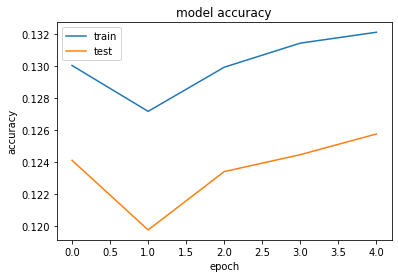

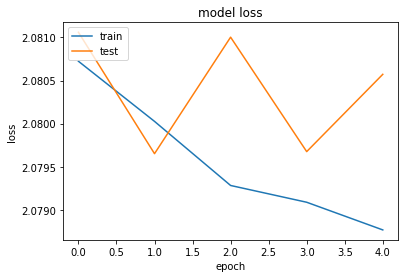

In [21]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
predictions = model.predict(test_x)

def get_card_from_encoding(encoding):
    gambels = encoding.argmax(axis=1)
    return np.vectorize(lambda x:possible_result[x])(gambels)

  1/266 [..............................] - ETA: 2:03

  2/266 [..............................] - ETA: 26s 

  3/266 [..............................] - ETA: 26s

  4/266 [..............................] - ETA: 26s

  5/266 [..............................] - ETA: 26s

  6/266 [..............................] - ETA: 26s

  7/266 [..............................] - ETA: 26s

  8/266 [..............................] - ETA: 26s

  9/266 [>.............................] - ETA: 26s

 10/266 [>.............................] - ETA: 25s

 11/266 [>.............................] - ETA: 25s

 12/266 [>.............................] - ETA: 25s

 13/266 [>.............................] - ETA: 25s

 14/266 [>.............................] - ETA: 25s

 15/266 [>.............................] - ETA: 25s

 16/266 [>.............................] - ETA: 25s

 17/266 [>.............................] - ETA: 25s

 18/266 [=>............................] - ETA: 25s

 19/266 [=>............................] - ETA: 25s

 20/266 [=>............................] - ETA: 25s

 21/266 [=>............................] - ETA: 24s

 22/266 [=>............................] - ETA: 24s

 23/266 [=>............................] - ETA: 24s

 24/266 [=>............................] - ETA: 24s

 25/266 [=>............................] - ETA: 24s

 26/266 [=>............................] - ETA: 24s

 27/266 [==>...........................] - ETA: 24s

 28/266 [==>...........................] - ETA: 24s

 29/266 [==>...........................] - ETA: 24s

 30/266 [==>...........................] - ETA: 23s

 31/266 [==>...........................] - ETA: 23s

 32/266 [==>...........................] - ETA: 23s

 33/266 [==>...........................] - ETA: 23s

 34/266 [==>...........................] - ETA: 23s

 35/266 [==>...........................] - ETA: 23s

 36/266 [===>..........................] - ETA: 23s

 37/266 [===>..........................] - ETA: 23s

 38/266 [===>..........................] - ETA: 23s

 39/266 [===>..........................] - ETA: 23s

 40/266 [===>..........................] - ETA: 22s

 41/266 [===>..........................] - ETA: 22s

 42/266 [===>..........................] - ETA: 22s

 43/266 [===>..........................] - ETA: 22s

 44/266 [===>..........................] - ETA: 22s

 45/266 [====>.........................] - ETA: 22s

 46/266 [====>.........................] - ETA: 22s

 47/266 [====>.........................] - ETA: 22s

 48/266 [====>.........................] - ETA: 22s

 49/266 [====>.........................] - ETA: 22s

 50/266 [====>.........................] - ETA: 21s

 51/266 [====>.........................] - ETA: 21s

 52/266 [====>.........................] - ETA: 21s

 53/266 [====>.........................] - ETA: 21s

 54/266 [=====>........................] - ETA: 21s

 55/266 [=====>........................] - ETA: 21s

 56/266 [=====>........................] - ETA: 21s

 57/266 [=====>........................] - ETA: 21s

 58/266 [=====>........................] - ETA: 21s

 59/266 [=====>........................] - ETA: 21s

 60/266 [=====>........................] - ETA: 20s

 61/266 [=====>........................] - ETA: 20s

 62/266 [=====>........................] - ETA: 20s

 63/266 [======>.......................] - ETA: 20s

 64/266 [======>.......................] - ETA: 20s

 65/266 [======>.......................] - ETA: 20s

 66/266 [======>.......................] - ETA: 20s

 67/266 [======>.......................] - ETA: 20s

 68/266 [======>.......................] - ETA: 20s

 69/266 [======>.......................] - ETA: 20s

 70/266 [======>.......................] - ETA: 19s

 71/266 [=======>......................] - ETA: 19s

 72/266 [=======>......................] - ETA: 19s

 73/266 [=======>......................] - ETA: 19s

 74/266 [=======>......................] - ETA: 19s

 75/266 [=======>......................] - ETA: 19s

 76/266 [=======>......................] - ETA: 19s

 77/266 [=======>......................] - ETA: 19s

 78/266 [=======>......................] - ETA: 19s

 79/266 [=======>......................] - ETA: 19s

 80/266 [========>.....................] - ETA: 18s

 81/266 [========>.....................] - ETA: 18s

 82/266 [========>.....................] - ETA: 18s

 83/266 [========>.....................] - ETA: 18s

 84/266 [========>.....................] - ETA: 18s

 85/266 [========>.....................] - ETA: 18s

 86/266 [========>.....................] - ETA: 18s

 87/266 [========>.....................] - ETA: 18s

 88/266 [========>.....................] - ETA: 18s

 89/266 [=========>....................] - ETA: 18s

 90/266 [=========>....................] - ETA: 17s

 91/266 [=========>....................] - ETA: 17s

 92/266 [=========>....................] - ETA: 17s

 93/266 [=========>....................] - ETA: 17s

 94/266 [=========>....................] - ETA: 17s

 95/266 [=========>....................] - ETA: 17s

 96/266 [=========>....................] - ETA: 17s

 97/266 [=========>....................] - ETA: 17s

 98/266 [==========>...................] - ETA: 17s

 99/266 [==========>...................] - ETA: 17s

100/266 [==========>...................] - ETA: 17s

101/266 [==========>...................] - ETA: 16s

102/266 [==========>...................] - ETA: 16s

103/266 [==========>...................] - ETA: 16s

104/266 [==========>...................] - ETA: 16s

105/266 [==========>...................] - ETA: 16s

106/266 [==========>...................] - ETA: 16s

107/266 [===========>..................] - ETA: 16s

108/266 [===========>..................] - ETA: 16s

109/266 [===========>..................] - ETA: 16s

110/266 [===========>..................] - ETA: 16s

111/266 [===========>..................] - ETA: 15s

112/266 [===========>..................] - ETA: 15s

113/266 [===========>..................] - ETA: 15s

114/266 [===========>..................] - ETA: 15s

115/266 [===========>..................] - ETA: 15s

116/266 [============>.................] - ETA: 15s

117/266 [============>.................] - ETA: 15s

118/266 [============>.................] - ETA: 15s

119/266 [============>.................] - ETA: 15s

120/266 [============>.................] - ETA: 15s

121/266 [============>.................] - ETA: 14s

122/266 [============>.................] - ETA: 14s

123/266 [============>.................] - ETA: 14s

124/266 [============>.................] - ETA: 14s

125/266 [=============>................] - ETA: 14s

126/266 [=============>................] - ETA: 14s

127/266 [=============>................] - ETA: 14s

128/266 [=============>................] - ETA: 14s

129/266 [=============>................] - ETA: 14s

130/266 [=============>................] - ETA: 14s

131/266 [=============>................] - ETA: 13s

132/266 [=============>................] - ETA: 13s

133/266 [==============>...............] - ETA: 13s

134/266 [==============>...............] - ETA: 13s

135/266 [==============>...............] - ETA: 13s

136/266 [==============>...............] - ETA: 13s

137/266 [==============>...............] - ETA: 13s

138/266 [==============>...............] - ETA: 13s

139/266 [==============>...............] - ETA: 13s

140/266 [==============>...............] - ETA: 13s

141/266 [==============>...............] - ETA: 13s

142/266 [===============>..............] - ETA: 12s

143/266 [===============>..............] - ETA: 12s

144/266 [===============>..............] - ETA: 12s

145/266 [===============>..............] - ETA: 12s

146/266 [===============>..............] - ETA: 12s

147/266 [===============>..............] - ETA: 12s

148/266 [===============>..............] - ETA: 12s

149/266 [===============>..............] - ETA: 12s

150/266 [===============>..............] - ETA: 12s

151/266 [================>.............] - ETA: 12s

152/266 [================>.............] - ETA: 11s

153/266 [================>.............] - ETA: 11s

154/266 [================>.............] - ETA: 11s

155/266 [================>.............] - ETA: 11s

156/266 [================>.............] - ETA: 11s

157/266 [================>.............] - ETA: 11s

158/266 [================>.............] - ETA: 11s

159/266 [================>.............] - ETA: 11s

160/266 [=================>............] - ETA: 11s

161/266 [=================>............] - ETA: 11s

162/266 [=================>............] - ETA: 10s

163/266 [=================>............] - ETA: 10s

164/266 [=================>............] - ETA: 10s

165/266 [=================>............] - ETA: 10s

166/266 [=================>............] - ETA: 10s

167/266 [=================>............] - ETA: 10s

168/266 [=================>............] - ETA: 10s

169/266 [==================>...........] - ETA: 10s

170/266 [==================>...........] - ETA: 10s

171/266 [==================>...........] - ETA: 9s 

172/266 [==================>...........] - ETA: 9s

173/266 [==================>...........] - ETA: 9s

174/266 [==================>...........] - ETA: 9s

175/266 [==================>...........] - ETA: 9s

176/266 [==================>...........] - ETA: 9s

177/266 [==================>...........] - ETA: 9s

178/266 [===================>..........] - ETA: 9s

179/266 [===================>..........] - ETA: 9s

180/266 [===================>..........] - ETA: 9s

181/266 [===================>..........] - ETA: 8s

182/266 [===================>..........] - ETA: 8s

183/266 [===================>..........] - ETA: 8s

184/266 [===================>..........] - ETA: 8s

185/266 [===================>..........] - ETA: 8s

186/266 [===================>..........] - ETA: 8s

187/266 [====================>.........] - ETA: 8s

188/266 [====================>.........] - ETA: 8s

189/266 [====================>.........] - ETA: 8s

190/266 [====================>.........] - ETA: 8s

191/266 [====================>.........] - ETA: 7s

192/266 [====================>.........] - ETA: 7s

193/266 [====================>.........] - ETA: 7s

194/266 [====================>.........] - ETA: 7s

195/266 [====================>.........] - ETA: 7s

196/266 [=====================>........] - ETA: 7s

197/266 [=====================>........] - ETA: 7s

198/266 [=====================>........] - ETA: 7s

199/266 [=====================>........] - ETA: 7s

200/266 [=====================>........] - ETA: 7s

201/266 [=====================>........] - ETA: 6s

202/266 [=====================>........] - ETA: 6s

203/266 [=====================>........] - ETA: 6s

204/266 [======================>.......] - ETA: 6s

205/266 [======================>.......] - ETA: 6s

206/266 [======================>.......] - ETA: 6s

207/266 [======================>.......] - ETA: 6s

208/266 [======================>.......] - ETA: 6s

209/266 [======================>.......] - ETA: 6s

210/266 [======================>.......] - ETA: 5s

211/266 [======================>.......] - ETA: 5s

212/266 [======================>.......] - ETA: 5s

213/266 [=======================>......] - ETA: 5s

214/266 [=======================>......] - ETA: 5s

215/266 [=======================>......] - ETA: 5s

216/266 [=======================>......] - ETA: 5s

217/266 [=======================>......] - ETA: 5s

218/266 [=======================>......] - ETA: 5s

219/266 [=======================>......] - ETA: 5s

220/266 [=======================>......] - ETA: 4s

221/266 [=======================>......] - ETA: 4s

222/266 [========================>.....] - ETA: 4s

223/266 [========================>.....] - ETA: 4s

224/266 [========================>.....] - ETA: 4s

225/266 [========================>.....] - ETA: 4s

226/266 [========================>.....] - ETA: 4s

227/266 [========================>.....] - ETA: 4s

228/266 [========================>.....] - ETA: 4s

229/266 [========================>.....] - ETA: 3s

230/266 [========================>.....] - ETA: 3s

231/266 [=========================>....] - ETA: 3s

232/266 [=========================>....] - ETA: 3s

233/266 [=========================>....] - ETA: 3s

234/266 [=========================>....] - ETA: 3s

235/266 [=========================>....] - ETA: 3s

236/266 [=========================>....] - ETA: 3s

237/266 [=========================>....] - ETA: 3s

238/266 [=========================>....] - ETA: 3s

239/266 [=========================>....] - ETA: 2s

240/266 [==========================>...] - ETA: 2s

241/266 [==========================>...] - ETA: 2s

242/266 [==========================>...] - ETA: 2s

243/266 [==========================>...] - ETA: 2s

244/266 [==========================>...] - ETA: 2s

245/266 [==========================>...] - ETA: 2s

246/266 [==========================>...] - ETA: 2s

247/266 [==========================>...] - ETA: 2s

248/266 [==========================>...] - ETA: 1s

249/266 [===========================>..] - ETA: 1s

250/266 [===========================>..] - ETA: 1s

251/266 [===========================>..] - ETA: 1s

252/266 [===========================>..] - ETA: 1s

253/266 [===========================>..] - ETA: 1s

254/266 [===========================>..] - ETA: 1s

255/266 [===========================>..] - ETA: 1s

256/266 [===========================>..] - ETA: 1s

257/266 [===========================>..] - ETA: 0s

258/266 [============================>.] - ETA: 0s

259/266 [============================>.] - ETA: 0s

260/266 [============================>.] - ETA: 0s

261/266 [============================>.] - ETA: 0s

262/266 [============================>.] - ETA: 0s

263/266 [============================>.] - ETA: 0s

264/266 [============================>.] - ETA: 0s

265/266 [============================>.] - ETA: 0s

266/266 [==============================] - ETA: 0s

266/266 [==============================] - 29s 109ms/step


In [23]:
predictions_cards = get_card_from_encoding(predictions)
true_cards = get_card_from_encoding(test_y)

compute_statistics(predictions_cards,true_cards)

{'name': UUID('f972b548-fe2f-44f5-9245-c631ff04b11f'),
 'invested': '£850,900.00',
 'single_bet_amount': '£100.00',
 'total_invested': '£850,900.00',
 'total_won': 1070,
 'precentage_won': 12.574920672229403,
 'expected_won': 12.5,
 'eraned': '£535,000.00',
 'revenue': '-£315,900.00'}